####  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
####  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?



In [447]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

In [483]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=24)

In [484]:
print(f'доступные GPU : {tf.config.experimental.list_physical_devices("GPU")}')

доступные GPU : []


In [485]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [451]:
count_hidden_layers = [2, 3, 5]
setting_neurons = [128, 256, 512]
activate_fn = ['relu', 'sigmoid']
optim_= ['adam', 'rmsprop', 'nadam']
loss_fn = ['mse', 'mae']
validation_split_ = 0.20
batch_size_ = 8

dict_history_model_boston_house_train = {}
dict_evaluate = {}

In [452]:
def model_boston_house(count_layers, count_neurons, activate_fn,  optim_, loss_fn_, epochs_):
    
    if loss_fn_ == 'mse':
        loss_ = tf.keras.losses.MeanSquaredError()
    elif loss_fn_ == 'mae':
        loss_ = tf.keras.losses.MeanAbsoluteError()
        

    inputs_ = Input(shape=(13,))
    x = inputs_


    for i in range(count_layers):
        x = Dense(count_neurons, activation=activate_fn, name='layer' + str(i))(x)

    outputs_ = Dense(1, activation=None, name='predictions')(x) 

    model_boston_house = Model(inputs=inputs_, outputs=outputs_) 

    model_boston_house.compile(optimizer=optimizer_, loss=loss_, metrics=['mae'])

    history_model_boston_house = model_boston_house.fit(X_train, y_train, batch_size=batch_size_, 
                                                        validation_split=validation_split_, epochs=epochs_)
    
    loss_mae = model_boston_house.evaluate(X_test, y_test)
    
    model_boston_house.save_weights( 'MODEL_BOSTON_HOUSE' + 
                                    '_' + str(count_layers) + 
                                    '_' + str(count_neurons) +  
                                    '_' + optim_ + 
                                    '_' + activate_fn + 
                                    '_' + loss_fn_+ '.h5')
    
    dict_history_model_boston_house_train['MODEL_BOSTON_HOUSE' + 
                                          '_' + str(count_layers) + 
                                          '_' + str(count_neurons) +  
                                          '_' + optim_ + 
                                          '_' + activate_fn + 
                                          '_' + loss_fn_] = history_model_boston_house.history
    dict_evaluate['MODEL_BOSTON_HOUSE' + 
                  '_' + str(count_layers) + 
                  '_' + str(count_neurons) +  
                  '_' + optim_ + 
                  '_' + activate_fn + 
                  '_' + loss_fn_] = loss_mae

    return dict_history_model_boston_house_train, dict_evaluate
# plot_model(model_boston_house,to_file='new_model-all.png')

In [453]:
epochs_ = 100

for layer in count_hidden_layers:
    for neorons in setting_neurons:
        for activate_ in activate_fn:
            for optimazer in optim_:
                for loss_ in loss_fn:
                    dict_train, dict_eval = model_boston_house(layer,
                                                               neorons,
                                                               activate_, 
                                                               optimazer, 
                                                               loss_,
                                                               epochs_)

Epoch 1/100
46/46 [==============================] - 0s 4ms/step - loss: 452.9961 - mae: 19.1770 - val_loss: 319.3002 - val_mae: 15.3364
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 200.4684 - mae: 11.7783 - val_loss: 119.2722 - val_mae: 8.6807
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 83.8914 - mae: 6.9900 - val_loss: 70.6782 - val_mae: 6.4228
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 54.7610 - mae: 5.6126 - val_loss: 53.2337 - val_mae: 5.4297
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 42.0232 - mae: 4.8724 - val_loss: 42.9935 - val_mae: 4.8017
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 34.8810 - mae: 4.3976 - val_loss: 36.4340 - val_mae: 4.3821
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 30.2547 - mae: 4.0565 - val_loss: 32.4149 - val_mae: 4.1133
Epoch 8/100
46/46 [==============================] - 0s 3ms/st

46/46 [==============================] - 0s 3ms/step - loss: 11.1749 - mae: 2.3491 - val_loss: 15.8394 - val_mae: 2.7762
Epoch 63/100
46/46 [==============================] - 0s 3ms/step - loss: 11.0990 - mae: 2.3567 - val_loss: 15.7985 - val_mae: 2.7784
Epoch 64/100
46/46 [==============================] - 0s 4ms/step - loss: 11.0112 - mae: 2.3456 - val_loss: 15.6818 - val_mae: 2.7539
Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 10.9820 - mae: 2.3333 - val_loss: 15.6774 - val_mae: 2.7514
Epoch 66/100
46/46 [==============================] - 0s 4ms/step - loss: 10.9051 - mae: 2.3406 - val_loss: 15.5922 - val_mae: 2.7436
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 10.8451 - mae: 2.3333 - val_loss: 15.5044 - val_mae: 2.7335
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 10.8178 - mae: 2.3217 - val_loss: 15.5464 - val_mae: 2.7445
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 1

Epoch 23/100
46/46 [==============================] - 0s 2ms/step - loss: 2.7296 - mae: 2.7296 - val_loss: 2.9601 - val_mae: 2.9601
Epoch 24/100
46/46 [==============================] - 0s 2ms/step - loss: 2.7054 - mae: 2.7054 - val_loss: 2.9518 - val_mae: 2.9518
Epoch 25/100
46/46 [==============================] - 0s 2ms/step - loss: 2.6832 - mae: 2.6832 - val_loss: 2.9265 - val_mae: 2.9265
Epoch 26/100
46/46 [==============================] - 0s 2ms/step - loss: 2.6632 - mae: 2.6632 - val_loss: 2.9325 - val_mae: 2.9325
Epoch 27/100
46/46 [==============================] - 0s 2ms/step - loss: 2.6384 - mae: 2.6384 - val_loss: 2.9215 - val_mae: 2.9215
Epoch 28/100
46/46 [==============================] - 0s 2ms/step - loss: 2.6011 - mae: 2.6011 - val_loss: 2.9199 - val_mae: 2.9199
Epoch 29/100
46/46 [==============================] - 0s 2ms/step - loss: 2.5767 - mae: 2.5767 - val_loss: 2.9154 - val_mae: 2.9154
Epoch 30/100
46/46 [==============================] - 0s 2ms/step - loss: 2.

46/46 [==============================] - 0s 2ms/step - loss: 2.0523 - mae: 2.0523 - val_loss: 2.4587 - val_mae: 2.4587
Epoch 86/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0454 - mae: 2.0454 - val_loss: 2.4608 - val_mae: 2.4608
Epoch 87/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0381 - mae: 2.0381 - val_loss: 2.4468 - val_mae: 2.4468
Epoch 88/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0397 - mae: 2.0397 - val_loss: 2.4589 - val_mae: 2.4589
Epoch 89/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0291 - mae: 2.0291 - val_loss: 2.4400 - val_mae: 2.4400
Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0220 - mae: 2.0220 - val_loss: 2.4408 - val_mae: 2.4408
Epoch 91/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0171 - mae: 2.0171 - val_loss: 2.4452 - val_mae: 2.4452
Epoch 92/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0172 - mae: 2

Epoch 46/100
46/46 [==============================] - 0s 2ms/step - loss: 13.0046 - mae: 2.5287 - val_loss: 16.9926 - val_mae: 2.9205
Epoch 47/100
46/46 [==============================] - 0s 2ms/step - loss: 12.8886 - mae: 2.4990 - val_loss: 16.9663 - val_mae: 2.9137
Epoch 48/100
46/46 [==============================] - 0s 2ms/step - loss: 12.7723 - mae: 2.4912 - val_loss: 16.7998 - val_mae: 2.8984
Epoch 49/100
46/46 [==============================] - 0s 2ms/step - loss: 12.6999 - mae: 2.4846 - val_loss: 16.7277 - val_mae: 2.8997
Epoch 50/100
46/46 [==============================] - 0s 2ms/step - loss: 12.5312 - mae: 2.4803 - val_loss: 16.6706 - val_mae: 2.8899
Epoch 51/100
46/46 [==============================] - 0s 2ms/step - loss: 12.4561 - mae: 2.4732 - val_loss: 16.5799 - val_mae: 2.8806
Epoch 52/100
46/46 [==============================] - 0s 2ms/step - loss: 12.4048 - mae: 2.4735 - val_loss: 16.4794 - val_mae: 2.8798
Epoch 53/100
46/46 [==============================] - 0s 2ms/s

Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 3.7356 - mae: 3.7356 - val_loss: 3.3512 - val_mae: 3.3512
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5464 - mae: 3.5464 - val_loss: 3.2685 - val_mae: 3.2685
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 3.3908 - mae: 3.3908 - val_loss: 3.2151 - val_mae: 3.2151
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 3.2950 - mae: 3.2950 - val_loss: 3.1807 - val_mae: 3.1807
Epoch 11/100
46/46 [==============================] - 0s 2ms/step - loss: 3.2159 - mae: 3.2159 - val_loss: 3.1441 - val_mae: 3.1441
Epoch 12/100
46/46 [==============================] - 0s 2ms/step - loss: 3.1344 - mae: 3.1344 - val_loss: 3.1345 - val_mae: 3.1345
Epoch 13/100
46/46 [==============================] - 0s 2ms/step - loss: 3.0651 - mae: 3.0651 - val_loss: 3.1195 - val_mae: 3.1195
Epoch 14/100
46/46 [==============================] - 0s 2ms/step - loss: 3.024

46/46 [==============================] - 0s 2ms/step - loss: 2.2365 - mae: 2.2365 - val_loss: 2.4472 - val_mae: 2.4472
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2399 - mae: 2.2399 - val_loss: 2.4329 - val_mae: 2.4329
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2312 - mae: 2.2312 - val_loss: 2.4244 - val_mae: 2.4244
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2268 - mae: 2.2268 - val_loss: 2.4263 - val_mae: 2.4263
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2133 - mae: 2.2133 - val_loss: 2.4206 - val_mae: 2.4206
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2172 - mae: 2.2172 - val_loss: 2.4037 - val_mae: 2.4037
Epoch 75/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2127 - mae: 2.2127 - val_loss: 2.4180 - val_mae: 2.4180
Epoch 76/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1991 - mae: 2

46/46 [==============================] - 0s 2ms/step - loss: 14.0178 - mae: 2.6315 - val_loss: 18.1330 - val_mae: 3.0053
Epoch 31/100
46/46 [==============================] - 0s 2ms/step - loss: 13.9593 - mae: 2.6173 - val_loss: 18.0099 - val_mae: 2.9963
Epoch 32/100
46/46 [==============================] - 0s 2ms/step - loss: 13.7468 - mae: 2.6093 - val_loss: 17.8934 - val_mae: 2.9733
Epoch 33/100
46/46 [==============================] - 0s 2ms/step - loss: 13.6631 - mae: 2.5922 - val_loss: 17.7540 - val_mae: 2.9691
Epoch 34/100
46/46 [==============================] - 0s 2ms/step - loss: 13.7433 - mae: 2.5729 - val_loss: 17.6147 - val_mae: 2.9382
Epoch 35/100
46/46 [==============================] - 0s 2ms/step - loss: 13.3419 - mae: 2.5710 - val_loss: 17.5046 - val_mae: 2.9364
Epoch 36/100
46/46 [==============================] - 0s 2ms/step - loss: 13.2711 - mae: 2.5616 - val_loss: 17.4617 - val_mae: 2.9277
Epoch 37/100
46/46 [==============================] - 0s 2ms/step - loss: 1

46/46 [==============================] - 0s 2ms/step - loss: 9.3580 - mae: 2.1651 - val_loss: 14.0915 - val_mae: 2.5806
Epoch 92/100
46/46 [==============================] - 0s 2ms/step - loss: 9.3079 - mae: 2.1710 - val_loss: 13.9809 - val_mae: 2.5887
Epoch 93/100
46/46 [==============================] - 0s 2ms/step - loss: 9.2573 - mae: 2.1659 - val_loss: 13.9547 - val_mae: 2.5759
Epoch 94/100
46/46 [==============================] - 0s 2ms/step - loss: 9.2716 - mae: 2.1620 - val_loss: 13.9248 - val_mae: 2.5745
Epoch 95/100
46/46 [==============================] - 0s 2ms/step - loss: 9.2299 - mae: 2.1570 - val_loss: 13.8453 - val_mae: 2.5765
Epoch 96/100
46/46 [==============================] - 0s 2ms/step - loss: 9.0884 - mae: 2.1480 - val_loss: 13.8965 - val_mae: 2.5626
Epoch 97/100
46/46 [==============================] - 0s 2ms/step - loss: 9.1117 - mae: 2.1314 - val_loss: 13.8735 - val_mae: 2.5621
Epoch 98/100
46/46 [==============================] - 0s 2ms/step - loss: 9.0414 -

46/46 [==============================] - 0s 2ms/step - loss: 2.2292 - mae: 2.2292 - val_loss: 2.5934 - val_mae: 2.5934
Epoch 53/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2172 - mae: 2.2172 - val_loss: 2.5924 - val_mae: 2.5924
Epoch 54/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2138 - mae: 2.2138 - val_loss: 2.5723 - val_mae: 2.5723
Epoch 55/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1968 - mae: 2.1968 - val_loss: 2.5567 - val_mae: 2.5567
Epoch 56/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1857 - mae: 2.1857 - val_loss: 2.5487 - val_mae: 2.5487
Epoch 57/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1977 - mae: 2.1977 - val_loss: 2.5631 - val_mae: 2.5631
Epoch 58/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1827 - mae: 2.1827 - val_loss: 2.5496 - val_mae: 2.5496
Epoch 59/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1693 - mae: 2

46/46 [==============================] - 0s 2ms/step - loss: 124.3224 - mae: 8.1570 - val_loss: 129.7930 - val_mae: 8.0619
Epoch 14/100
46/46 [==============================] - 0s 2ms/step - loss: 118.6989 - mae: 7.9052 - val_loss: 124.3318 - val_mae: 7.8568
Epoch 15/100
46/46 [==============================] - 0s 2ms/step - loss: 113.5394 - mae: 7.6717 - val_loss: 119.2295 - val_mae: 7.6620
Epoch 16/100
46/46 [==============================] - 0s 2ms/step - loss: 108.9103 - mae: 7.4515 - val_loss: 114.9796 - val_mae: 7.4928
Epoch 17/100
46/46 [==============================] - 0s 2ms/step - loss: 104.8922 - mae: 7.2692 - val_loss: 111.0724 - val_mae: 7.3413
Epoch 18/100
46/46 [==============================] - 0s 2ms/step - loss: 101.3281 - mae: 7.0994 - val_loss: 107.6435 - val_mae: 7.2018
Epoch 19/100
46/46 [==============================] - 0s 2ms/step - loss: 98.1296 - mae: 6.9426 - val_loss: 104.5248 - val_mae: 7.0785
Epoch 20/100
46/46 [==============================] - 0s 2ms/s

46/46 [==============================] - 0s 2ms/step - loss: 48.2683 - mae: 4.6247 - val_loss: 53.5591 - val_mae: 4.8572
Epoch 75/100
46/46 [==============================] - 0s 2ms/step - loss: 47.9585 - mae: 4.6098 - val_loss: 53.2715 - val_mae: 4.8262
Epoch 76/100
46/46 [==============================] - 0s 2ms/step - loss: 47.6383 - mae: 4.5839 - val_loss: 52.9649 - val_mae: 4.8131
Epoch 77/100
46/46 [==============================] - 0s 2ms/step - loss: 47.3147 - mae: 4.5657 - val_loss: 52.6476 - val_mae: 4.8042
Epoch 78/100
46/46 [==============================] - 0s 2ms/step - loss: 47.0007 - mae: 4.5630 - val_loss: 52.3313 - val_mae: 4.7824
Epoch 79/100
46/46 [==============================] - 0s 2ms/step - loss: 46.6854 - mae: 4.5263 - val_loss: 52.0160 - val_mae: 4.7703
Epoch 80/100
46/46 [==============================] - 0s 2ms/step - loss: 46.3678 - mae: 4.5328 - val_loss: 51.7059 - val_mae: 4.7832
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 4

46/46 [==============================] - 0s 2ms/step - loss: 4.9468 - mae: 4.9468 - val_loss: 5.0491 - val_mae: 5.0491
Epoch 36/100
46/46 [==============================] - 0s 2ms/step - loss: 4.9102 - mae: 4.9102 - val_loss: 5.0137 - val_mae: 5.0137
Epoch 37/100
46/46 [==============================] - 0s 2ms/step - loss: 4.8693 - mae: 4.8693 - val_loss: 4.9416 - val_mae: 4.9416
Epoch 38/100
46/46 [==============================] - 0s 2ms/step - loss: 4.8347 - mae: 4.8347 - val_loss: 4.9065 - val_mae: 4.9065
Epoch 39/100
46/46 [==============================] - 0s 2ms/step - loss: 4.8019 - mae: 4.8019 - val_loss: 4.8717 - val_mae: 4.8717
Epoch 40/100
46/46 [==============================] - 0s 2ms/step - loss: 4.7724 - mae: 4.7724 - val_loss: 4.8341 - val_mae: 4.8341
Epoch 41/100
46/46 [==============================] - 0s 2ms/step - loss: 4.7479 - mae: 4.7479 - val_loss: 4.8159 - val_mae: 4.8159
Epoch 42/100
46/46 [==============================] - 0s 2ms/step - loss: 4.7161 - mae: 4

46/46 [==============================] - 0s 2ms/step - loss: 3.9464 - mae: 3.9464 - val_loss: 4.1997 - val_mae: 4.1997
Epoch 98/100
46/46 [==============================] - 0s 2ms/step - loss: 3.9367 - mae: 3.9367 - val_loss: 4.1901 - val_mae: 4.1901
Epoch 99/100
46/46 [==============================] - 0s 2ms/step - loss: 3.9288 - mae: 3.9288 - val_loss: 4.1863 - val_mae: 4.1863
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 5.3898 - mae: 5.3898
Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 435.3991 - mae: 18.8218 - val_loss: 347.2845 - val_mae: 16.1160
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 298.3364 - mae: 14.8734 - val_loss: 277.2118 - val_mae: 13.8220
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 249.0509 - mae: 13.2240 - val_loss: 241.3550 - val_mae: 12.5335
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 219.9557 - mae: 12.1295 - val_loss: 216

46/46 [==============================] - 0s 2ms/step - loss: 53.9987 - mae: 4.8444 - val_loss: 59.1131 - val_mae: 5.0916
Epoch 58/100
46/46 [==============================] - 0s 2ms/step - loss: 53.5998 - mae: 4.8190 - val_loss: 58.7146 - val_mae: 5.0552
Epoch 59/100
46/46 [==============================] - 0s 2ms/step - loss: 53.2659 - mae: 4.8157 - val_loss: 58.3378 - val_mae: 5.0426
Epoch 60/100
46/46 [==============================] - 0s 2ms/step - loss: 52.8552 - mae: 4.7920 - val_loss: 57.9370 - val_mae: 5.0192
Epoch 61/100
46/46 [==============================] - 0s 2ms/step - loss: 52.5061 - mae: 4.7570 - val_loss: 57.6157 - val_mae: 4.9920
Epoch 62/100
46/46 [==============================] - 0s 2ms/step - loss: 52.1332 - mae: 4.7644 - val_loss: 57.1938 - val_mae: 4.9990
Epoch 63/100
46/46 [==============================] - 0s 2ms/step - loss: 51.7848 - mae: 4.7405 - val_loss: 56.8739 - val_mae: 4.9548
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 5

Epoch 18/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4090 - mae: 6.4090 - val_loss: 6.6248 - val_mae: 6.6248
Epoch 19/100
46/46 [==============================] - 0s 2ms/step - loss: 6.2896 - mae: 6.2896 - val_loss: 6.4946 - val_mae: 6.4946
Epoch 20/100
46/46 [==============================] - 0s 2ms/step - loss: 6.1743 - mae: 6.1743 - val_loss: 6.3678 - val_mae: 6.3678
Epoch 21/100
46/46 [==============================] - 0s 2ms/step - loss: 6.0596 - mae: 6.0596 - val_loss: 6.2471 - val_mae: 6.2471
Epoch 22/100
46/46 [==============================] - 0s 2ms/step - loss: 5.9466 - mae: 5.9466 - val_loss: 6.1295 - val_mae: 6.1295
Epoch 23/100
46/46 [==============================] - 0s 2ms/step - loss: 5.8407 - mae: 5.8407 - val_loss: 6.0229 - val_mae: 6.0229
Epoch 24/100
46/46 [==============================] - 0s 2ms/step - loss: 5.7405 - mae: 5.7405 - val_loss: 5.9135 - val_mae: 5.9135
Epoch 25/100
46/46 [==============================] - 0s 2ms/step - loss: 5.

46/46 [==============================] - 0s 2ms/step - loss: 4.1492 - mae: 4.1492 - val_loss: 4.3623 - val_mae: 4.3623
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1356 - mae: 4.1356 - val_loss: 4.3543 - val_mae: 4.3543
Epoch 82/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1208 - mae: 4.1208 - val_loss: 4.3475 - val_mae: 4.3475
Epoch 83/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1077 - mae: 4.1077 - val_loss: 4.3413 - val_mae: 4.3413
Epoch 84/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0998 - mae: 4.0998 - val_loss: 4.3340 - val_mae: 4.3340
Epoch 85/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0846 - mae: 4.0846 - val_loss: 4.3286 - val_mae: 4.3286
Epoch 86/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0796 - mae: 4.0796 - val_loss: 4.3237 - val_mae: 4.3237
Epoch 87/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0722 - mae: 4

46/46 [==============================] - 0s 2ms/step - loss: 64.7028 - mae: 5.2764 - val_loss: 69.9842 - val_mae: 5.5665
Epoch 41/100
46/46 [==============================] - 0s 2ms/step - loss: 63.8825 - mae: 5.2319 - val_loss: 69.1473 - val_mae: 5.5254
Epoch 42/100
46/46 [==============================] - 0s 2ms/step - loss: 63.0914 - mae: 5.1962 - val_loss: 68.3466 - val_mae: 5.4884
Epoch 43/100
46/46 [==============================] - 0s 2ms/step - loss: 62.3296 - mae: 5.1618 - val_loss: 67.5963 - val_mae: 5.4476
Epoch 44/100
46/46 [==============================] - 0s 2ms/step - loss: 61.6108 - mae: 5.1280 - val_loss: 66.8707 - val_mae: 5.4206
Epoch 45/100
46/46 [==============================] - 0s 2ms/step - loss: 60.9216 - mae: 5.1017 - val_loss: 66.1664 - val_mae: 5.3882
Epoch 46/100
46/46 [==============================] - 0s 2ms/step - loss: 60.2547 - mae: 5.0690 - val_loss: 65.4669 - val_mae: 5.3513
Epoch 47/100
46/46 [==============================] - 0s 2ms/step - loss: 5

2/2 [==============================] - 0s 2ms/step - loss: 64.6821 - mae: 5.1173
Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 18.7096 - mae: 18.7096 - val_loss: 15.7959 - val_mae: 15.7959
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 14.4420 - mae: 14.4420 - val_loss: 13.2708 - val_mae: 13.2708
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 12.6246 - mae: 12.6246 - val_loss: 11.9190 - val_mae: 11.9190
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 11.4661 - mae: 11.4661 - val_loss: 10.9324 - val_mae: 10.9324
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5817 - mae: 10.5817 - val_loss: 10.1345 - val_mae: 10.1345
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 9.8459 - mae: 9.8459 - val_loss: 9.4776 - val_mae: 9.4776
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 9.2389 - mae: 9.2389 - val_loss: 8.9899 

46/46 [==============================] - 0s 2ms/step - loss: 4.4263 - mae: 4.4263 - val_loss: 4.5395 - val_mae: 4.5395
Epoch 63/100
46/46 [==============================] - 0s 2ms/step - loss: 4.4118 - mae: 4.4118 - val_loss: 4.5285 - val_mae: 4.5285
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 4.3984 - mae: 4.3984 - val_loss: 4.5175 - val_mae: 4.5175
Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 4.3838 - mae: 4.3838 - val_loss: 4.5054 - val_mae: 4.5054
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 4.3699 - mae: 4.3699 - val_loss: 4.5003 - val_mae: 4.5003
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 4.3603 - mae: 4.3603 - val_loss: 4.4855 - val_mae: 4.4855
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 4.3413 - mae: 4.3413 - val_loss: 4.4799 - val_mae: 4.4799
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 4.3285 - mae: 4

46/46 [==============================] - 0s 2ms/step - loss: 13.3266 - mae: 2.5425 - val_loss: 17.7971 - val_mae: 2.9909
Epoch 24/100
46/46 [==============================] - 0s 2ms/step - loss: 13.0273 - mae: 2.5256 - val_loss: 17.6584 - val_mae: 2.9229
Epoch 25/100
46/46 [==============================] - 0s 2ms/step - loss: 12.8204 - mae: 2.5039 - val_loss: 17.3506 - val_mae: 2.9053
Epoch 26/100
46/46 [==============================] - 0s 2ms/step - loss: 12.7623 - mae: 2.5034 - val_loss: 17.2656 - val_mae: 2.8967
Epoch 27/100
46/46 [==============================] - 0s 2ms/step - loss: 12.6019 - mae: 2.4879 - val_loss: 17.1682 - val_mae: 2.8864
Epoch 28/100
46/46 [==============================] - 0s 2ms/step - loss: 12.6188 - mae: 2.4729 - val_loss: 16.9675 - val_mae: 2.8554
Epoch 29/100
46/46 [==============================] - 0s 2ms/step - loss: 12.4283 - mae: 2.4563 - val_loss: 16.9465 - val_mae: 2.8511
Epoch 30/100
46/46 [==============================] - 0s 2ms/step - loss: 1

46/46 [==============================] - 0s 2ms/step - loss: 7.9676 - mae: 2.0049 - val_loss: 13.8473 - val_mae: 2.5165
Epoch 85/100
46/46 [==============================] - 0s 2ms/step - loss: 7.9102 - mae: 1.9947 - val_loss: 13.9163 - val_mae: 2.5140
Epoch 86/100
46/46 [==============================] - 0s 5ms/step - loss: 7.8766 - mae: 2.0052 - val_loss: 13.7693 - val_mae: 2.5111
Epoch 87/100
46/46 [==============================] - 0s 2ms/step - loss: 7.8326 - mae: 1.9867 - val_loss: 13.8845 - val_mae: 2.5058
Epoch 88/100
46/46 [==============================] - 0s 2ms/step - loss: 7.8002 - mae: 1.9824 - val_loss: 13.8464 - val_mae: 2.5166
Epoch 89/100
46/46 [==============================] - 0s 2ms/step - loss: 7.7189 - mae: 1.9864 - val_loss: 13.8263 - val_mae: 2.5139
Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 7.6674 - mae: 1.9637 - val_loss: 13.9532 - val_mae: 2.5087
Epoch 91/100
46/46 [==============================] - 0s 2ms/step - loss: 7.7293 -

46/46 [==============================] - 0s 2ms/step - loss: 2.1485 - mae: 2.1485 - val_loss: 2.5088 - val_mae: 2.5088
Epoch 46/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1395 - mae: 2.1395 - val_loss: 2.5193 - val_mae: 2.5193
Epoch 47/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1326 - mae: 2.1326 - val_loss: 2.5161 - val_mae: 2.5161
Epoch 48/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1306 - mae: 2.1306 - val_loss: 2.5271 - val_mae: 2.5271
Epoch 49/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1239 - mae: 2.1239 - val_loss: 2.4617 - val_mae: 2.4617
Epoch 50/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1192 - mae: 2.1192 - val_loss: 2.5134 - val_mae: 2.5134
Epoch 51/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1287 - mae: 2.1287 - val_loss: 2.4978 - val_mae: 2.4978
Epoch 52/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1155 - mae: 2

46/46 [==============================] - 0s 3ms/step - loss: 23.5537 - mae: 3.5466 - val_loss: 26.2509 - val_mae: 3.5617
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 21.6994 - mae: 3.3688 - val_loss: 24.5612 - val_mae: 3.4535
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 20.5459 - mae: 3.2873 - val_loss: 23.3749 - val_mae: 3.3732
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 19.1989 - mae: 3.1493 - val_loss: 22.3987 - val_mae: 3.3307
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 18.4063 - mae: 3.0565 - val_loss: 21.8135 - val_mae: 3.2951
Epoch 11/100
46/46 [==============================] - 0s 3ms/step - loss: 17.7252 - mae: 2.9945 - val_loss: 21.0156 - val_mae: 3.2428
Epoch 12/100
46/46 [==============================] - 0s 2ms/step - loss: 17.1582 - mae: 2.9408 - val_loss: 20.6622 - val_mae: 3.2075
Epoch 13/100
46/46 [==============================] - 0s 2ms/step - loss: 16.5

46/46 [==============================] - 0s 4ms/step - loss: 9.0438 - mae: 2.1292 - val_loss: 14.0902 - val_mae: 2.5422
Epoch 68/100
46/46 [==============================] - 0s 4ms/step - loss: 8.9249 - mae: 2.1200 - val_loss: 13.9703 - val_mae: 2.5402
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 8.8375 - mae: 2.1104 - val_loss: 13.9345 - val_mae: 2.5426
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 8.8080 - mae: 2.1070 - val_loss: 13.7634 - val_mae: 2.5318
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 8.8583 - mae: 2.1342 - val_loss: 13.8413 - val_mae: 2.5436
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 8.7131 - mae: 2.0901 - val_loss: 13.8582 - val_mae: 2.5383
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 8.6036 - mae: 2.0806 - val_loss: 13.9108 - val_mae: 2.5173
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 8.4824 -

46/46 [==============================] - 0s 2ms/step - loss: 2.2739 - mae: 2.2739 - val_loss: 2.5402 - val_mae: 2.5402
Epoch 29/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2744 - mae: 2.2744 - val_loss: 2.5497 - val_mae: 2.5497
Epoch 30/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2559 - mae: 2.2559 - val_loss: 2.5363 - val_mae: 2.5363
Epoch 31/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2464 - mae: 2.2464 - val_loss: 2.5431 - val_mae: 2.5431
Epoch 32/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2292 - mae: 2.2292 - val_loss: 2.5195 - val_mae: 2.5195
Epoch 33/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2234 - mae: 2.2234 - val_loss: 2.5180 - val_mae: 2.5180
Epoch 34/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2160 - mae: 2.2160 - val_loss: 2.5272 - val_mae: 2.5272
Epoch 35/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2166 - mae: 2

46/46 [==============================] - 0s 3ms/step - loss: 1.9042 - mae: 1.9042 - val_loss: 2.3653 - val_mae: 2.3653
Epoch 91/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8956 - mae: 1.8956 - val_loss: 2.3589 - val_mae: 2.3589
Epoch 92/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8938 - mae: 1.8938 - val_loss: 2.3617 - val_mae: 2.3617
Epoch 93/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9015 - mae: 1.9015 - val_loss: 2.3651 - val_mae: 2.3651
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8908 - mae: 1.8908 - val_loss: 2.3467 - val_mae: 2.3467
Epoch 95/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8798 - mae: 1.8798 - val_loss: 2.3537 - val_mae: 2.3537
Epoch 96/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8794 - mae: 1.8794 - val_loss: 2.3531 - val_mae: 2.3531
Epoch 97/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8781 - mae: 1

Epoch 51/100
46/46 [==============================] - 0s 2ms/step - loss: 9.8878 - mae: 2.2238 - val_loss: 14.7237 - val_mae: 2.6583
Epoch 52/100
46/46 [==============================] - 0s 2ms/step - loss: 9.8718 - mae: 2.2124 - val_loss: 14.7627 - val_mae: 2.6538
Epoch 53/100
46/46 [==============================] - 0s 2ms/step - loss: 9.7930 - mae: 2.2079 - val_loss: 14.6858 - val_mae: 2.6505
Epoch 54/100
46/46 [==============================] - 0s 2ms/step - loss: 9.7043 - mae: 2.2011 - val_loss: 14.7217 - val_mae: 2.6535
Epoch 55/100
46/46 [==============================] - 0s 2ms/step - loss: 9.6141 - mae: 2.2117 - val_loss: 14.5163 - val_mae: 2.6404
Epoch 56/100
46/46 [==============================] - 0s 2ms/step - loss: 9.5268 - mae: 2.1935 - val_loss: 14.6315 - val_mae: 2.6347
Epoch 57/100
46/46 [==============================] - 0s 2ms/step - loss: 9.5911 - mae: 2.1919 - val_loss: 14.5432 - val_mae: 2.6356
Epoch 58/100
46/46 [==============================] - 0s 2ms/step - l

46/46 [==============================] - 0s 2ms/step - loss: 2.6526 - mae: 2.6526 - val_loss: 2.8566 - val_mae: 2.8566
Epoch 13/100
46/46 [==============================] - 0s 3ms/step - loss: 2.6248 - mae: 2.6248 - val_loss: 2.7922 - val_mae: 2.7922
Epoch 14/100
46/46 [==============================] - 0s 2ms/step - loss: 2.5781 - mae: 2.5781 - val_loss: 2.8248 - val_mae: 2.8248
Epoch 15/100
46/46 [==============================] - 0s 2ms/step - loss: 2.5596 - mae: 2.5596 - val_loss: 2.7511 - val_mae: 2.7511
Epoch 16/100
46/46 [==============================] - 0s 2ms/step - loss: 2.5517 - mae: 2.5517 - val_loss: 2.7871 - val_mae: 2.7871
Epoch 17/100
46/46 [==============================] - 0s 2ms/step - loss: 2.4904 - mae: 2.4904 - val_loss: 2.7463 - val_mae: 2.7463
Epoch 18/100
46/46 [==============================] - 0s 2ms/step - loss: 2.4664 - mae: 2.4664 - val_loss: 2.7684 - val_mae: 2.7684
Epoch 19/100
46/46 [==============================] - 0s 2ms/step - loss: 2.4517 - mae: 2

46/46 [==============================] - 0s 2ms/step - loss: 2.0267 - mae: 2.0267 - val_loss: 2.4695 - val_mae: 2.4695
Epoch 75/100
46/46 [==============================] - 0s 2ms/step - loss: 2.0095 - mae: 2.0095 - val_loss: 2.4393 - val_mae: 2.4393
Epoch 76/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9968 - mae: 1.9968 - val_loss: 2.4368 - val_mae: 2.4368
Epoch 77/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9881 - mae: 1.9881 - val_loss: 2.4459 - val_mae: 2.4459
Epoch 78/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9909 - mae: 1.9909 - val_loss: 2.4413 - val_mae: 2.4413
Epoch 79/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9873 - mae: 1.9873 - val_loss: 2.4357 - val_mae: 2.4357
Epoch 80/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9818 - mae: 1.9818 - val_loss: 2.4320 - val_mae: 2.4320
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9720 - mae: 1

46/46 [==============================] - 0s 2ms/step - loss: 46.8186 - mae: 4.6375 - val_loss: 51.0440 - val_mae: 4.7564
Epoch 36/100
46/46 [==============================] - 0s 2ms/step - loss: 46.2835 - mae: 4.5827 - val_loss: 50.5751 - val_mae: 4.6891
Epoch 37/100
46/46 [==============================] - 0s 2ms/step - loss: 45.6446 - mae: 4.5416 - val_loss: 50.0384 - val_mae: 4.7111
Epoch 38/100
46/46 [==============================] - 0s 2ms/step - loss: 45.1892 - mae: 4.4738 - val_loss: 49.5025 - val_mae: 4.6986
Epoch 39/100
46/46 [==============================] - 0s 2ms/step - loss: 44.5921 - mae: 4.4437 - val_loss: 49.0556 - val_mae: 4.6125
Epoch 40/100
46/46 [==============================] - 0s 2ms/step - loss: 44.0636 - mae: 4.4524 - val_loss: 48.5192 - val_mae: 4.6015
Epoch 41/100
46/46 [==============================] - 0s 2ms/step - loss: 43.5088 - mae: 4.4277 - val_loss: 48.0468 - val_mae: 4.5832
Epoch 42/100
46/46 [==============================] - 0s 2ms/step - loss: 4

46/46 [==============================] - 0s 2ms/step - loss: 25.7049 - mae: 3.4303 - val_loss: 31.2149 - val_mae: 3.7067
Epoch 97/100
46/46 [==============================] - 0s 2ms/step - loss: 25.5722 - mae: 3.4239 - val_loss: 31.0029 - val_mae: 3.7164
Epoch 98/100
46/46 [==============================] - 0s 2ms/step - loss: 25.3800 - mae: 3.3773 - val_loss: 30.8619 - val_mae: 3.6982
Epoch 99/100
46/46 [==============================] - 0s 2ms/step - loss: 25.2725 - mae: 3.3999 - val_loss: 30.6617 - val_mae: 3.7069
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 37.7688 - mae: 4.1786
Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 15.8939 - mae: 15.8939 - val_loss: 11.3596 - val_mae: 11.3596
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 10.0196 - mae: 10.0196 - val_loss: 8.9619 - val_mae: 8.9619
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 8.3582 - mae: 8.3582 - val_loss: 7.9336 -

46/46 [==============================] - 0s 2ms/step - loss: 3.8918 - mae: 3.8918 - val_loss: 4.2116 - val_mae: 4.2116
Epoch 58/100
46/46 [==============================] - 0s 4ms/step - loss: 3.9047 - mae: 3.9047 - val_loss: 4.2021 - val_mae: 4.2021
Epoch 59/100
46/46 [==============================] - 0s 3ms/step - loss: 3.8650 - mae: 3.8650 - val_loss: 4.1825 - val_mae: 4.1825
Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 3.8505 - mae: 3.8505 - val_loss: 4.1698 - val_mae: 4.1698
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 3.8416 - mae: 3.8416 - val_loss: 4.1562 - val_mae: 4.1562
Epoch 62/100
46/46 [==============================] - 0s 3ms/step - loss: 3.8269 - mae: 3.8269 - val_loss: 4.1516 - val_mae: 4.1516
Epoch 63/100
46/46 [==============================] - 0s 2ms/step - loss: 3.8258 - mae: 3.8258 - val_loss: 4.1623 - val_mae: 4.1623
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 3.8039 - mae: 3

46/46 [==============================] - 0s 2ms/step - loss: 62.6913 - mae: 5.3180 - val_loss: 66.9321 - val_mae: 5.6445
Epoch 19/100
46/46 [==============================] - 0s 2ms/step - loss: 61.3110 - mae: 5.2342 - val_loss: 65.6235 - val_mae: 5.5513
Epoch 20/100
46/46 [==============================] - 0s 2ms/step - loss: 60.1039 - mae: 5.1749 - val_loss: 64.3810 - val_mae: 5.4831
Epoch 21/100
46/46 [==============================] - 0s 2ms/step - loss: 59.0153 - mae: 5.1117 - val_loss: 63.2625 - val_mae: 5.4134
Epoch 22/100
46/46 [==============================] - 0s 2ms/step - loss: 57.9733 - mae: 5.0854 - val_loss: 62.1960 - val_mae: 5.3611
Epoch 23/100
46/46 [==============================] - 0s 2ms/step - loss: 57.0636 - mae: 5.0051 - val_loss: 61.2699 - val_mae: 5.2831
Epoch 24/100
46/46 [==============================] - 0s 2ms/step - loss: 56.1563 - mae: 4.9958 - val_loss: 60.3738 - val_mae: 5.2588
Epoch 25/100
46/46 [==============================] - 0s 2ms/step - loss: 5

46/46 [==============================] - 0s 3ms/step - loss: 30.2909 - mae: 3.6630 - val_loss: 36.2406 - val_mae: 3.9235
Epoch 80/100
46/46 [==============================] - 0s 3ms/step - loss: 30.1133 - mae: 3.6298 - val_loss: 35.9882 - val_mae: 4.0290
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 29.8483 - mae: 3.7290 - val_loss: 35.9092 - val_mae: 3.8975
Epoch 82/100
46/46 [==============================] - 0s 2ms/step - loss: 29.6591 - mae: 3.6309 - val_loss: 35.6114 - val_mae: 3.8971
Epoch 83/100
46/46 [==============================] - 0s 2ms/step - loss: 29.3748 - mae: 3.6341 - val_loss: 35.2989 - val_mae: 3.9229
Epoch 84/100
46/46 [==============================] - 0s 2ms/step - loss: 29.1558 - mae: 3.6154 - val_loss: 35.1464 - val_mae: 3.9230
Epoch 85/100
46/46 [==============================] - 0s 2ms/step - loss: 28.9618 - mae: 3.6299 - val_loss: 34.9806 - val_mae: 3.8936
Epoch 86/100
46/46 [==============================] - 0s 2ms/step - loss: 2

46/46 [==============================] - 0s 2ms/step - loss: 4.1765 - mae: 4.1765 - val_loss: 4.3448 - val_mae: 4.3448
Epoch 41/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1532 - mae: 4.1532 - val_loss: 4.3448 - val_mae: 4.3448
Epoch 42/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1327 - mae: 4.1327 - val_loss: 4.3316 - val_mae: 4.3316
Epoch 43/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1030 - mae: 4.1030 - val_loss: 4.3172 - val_mae: 4.3172
Epoch 44/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0850 - mae: 4.0850 - val_loss: 4.3258 - val_mae: 4.3258
Epoch 45/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0528 - mae: 4.0528 - val_loss: 4.2922 - val_mae: 4.2922
Epoch 46/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0436 - mae: 4.0436 - val_loss: 4.2833 - val_mae: 4.2833
Epoch 47/100
46/46 [==============================] - 0s 2ms/step - loss: 4.0311 - mae: 4

46/46 [==============================] - 1s 5ms/step - loss: 371.6446 - mae: 16.7340 - val_loss: 234.5535 - val_mae: 12.2810
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 192.3521 - mae: 11.0316 - val_loss: 175.9952 - val_mae: 9.9742
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 151.9110 - mae: 9.3772 - val_loss: 146.5234 - val_mae: 8.7592
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 128.9649 - mae: 8.3746 - val_loss: 128.5616 - val_mae: 8.0431
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 113.9647 - mae: 7.6986 - val_loss: 115.7974 - val_mae: 7.5626
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 103.3887 - mae: 7.2055 - val_loss: 107.3297 - val_mae: 7.2505
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 96.0309 - mae: 6.8628 - val_loss: 100.8865 - val_mae: 7.0000
Epoch 8/100
46/46 [==============================] - 0s 2ms/step 

46/46 [==============================] - 0s 3ms/step - loss: 38.5811 - mae: 4.1200 - val_loss: 44.0834 - val_mae: 4.3070
Epoch 63/100
46/46 [==============================] - 0s 2ms/step - loss: 38.1555 - mae: 4.0239 - val_loss: 43.6982 - val_mae: 4.3072
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 37.7174 - mae: 4.0944 - val_loss: 43.2421 - val_mae: 4.2983
Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 37.1525 - mae: 4.0211 - val_loss: 42.8812 - val_mae: 4.2182
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 36.7379 - mae: 3.9675 - val_loss: 42.4956 - val_mae: 4.2266
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 36.4358 - mae: 3.9915 - val_loss: 42.1565 - val_mae: 4.1448
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 35.8848 - mae: 3.9202 - val_loss: 41.7783 - val_mae: 4.1625
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 3

Epoch 23/100
46/46 [==============================] - 0s 2ms/step - loss: 4.6280 - mae: 4.6280 - val_loss: 4.6247 - val_mae: 4.6247
Epoch 24/100
46/46 [==============================] - 0s 2ms/step - loss: 4.5776 - mae: 4.5776 - val_loss: 4.6024 - val_mae: 4.6024
Epoch 25/100
46/46 [==============================] - 0s 2ms/step - loss: 4.5468 - mae: 4.5468 - val_loss: 4.5646 - val_mae: 4.5646
Epoch 26/100
46/46 [==============================] - 0s 2ms/step - loss: 4.5112 - mae: 4.5112 - val_loss: 4.5609 - val_mae: 4.5609
Epoch 27/100
46/46 [==============================] - 0s 2ms/step - loss: 4.4888 - mae: 4.4888 - val_loss: 4.5213 - val_mae: 4.5213
Epoch 28/100
46/46 [==============================] - 0s 2ms/step - loss: 4.4629 - mae: 4.4629 - val_loss: 4.5187 - val_mae: 4.5187
Epoch 29/100
46/46 [==============================] - 0s 2ms/step - loss: 4.4399 - mae: 4.4399 - val_loss: 4.4857 - val_mae: 4.4857
Epoch 30/100
46/46 [==============================] - 0s 2ms/step - loss: 4.

46/46 [==============================] - 0s 2ms/step - loss: 3.5892 - mae: 3.5892 - val_loss: 4.0392 - val_mae: 4.0392
Epoch 86/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5967 - mae: 3.5967 - val_loss: 4.0118 - val_mae: 4.0118
Epoch 87/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5763 - mae: 3.5763 - val_loss: 3.9897 - val_mae: 3.9897
Epoch 88/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5824 - mae: 3.5824 - val_loss: 3.9937 - val_mae: 3.9937
Epoch 89/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5761 - mae: 3.5761 - val_loss: 4.0352 - val_mae: 4.0352
Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5610 - mae: 3.5610 - val_loss: 3.9997 - val_mae: 3.9997
Epoch 91/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5907 - mae: 3.5907 - val_loss: 3.9683 - val_mae: 3.9683
Epoch 92/100
46/46 [==============================] - 0s 2ms/step - loss: 3.5690 - mae: 3

46/46 [==============================] - 0s 4ms/step - loss: 8.4466 - mae: 2.0868 - val_loss: 14.1950 - val_mae: 2.5947
Epoch 47/100
46/46 [==============================] - 0s 4ms/step - loss: 8.3515 - mae: 2.0708 - val_loss: 14.0715 - val_mae: 2.5954
Epoch 48/100
46/46 [==============================] - 0s 4ms/step - loss: 8.2897 - mae: 2.0632 - val_loss: 14.3000 - val_mae: 2.5686
Epoch 49/100
46/46 [==============================] - 0s 4ms/step - loss: 8.1806 - mae: 2.0481 - val_loss: 14.1715 - val_mae: 2.5893
Epoch 50/100
46/46 [==============================] - 0s 4ms/step - loss: 8.1130 - mae: 2.0448 - val_loss: 13.9524 - val_mae: 2.5568
Epoch 51/100
46/46 [==============================] - 0s 4ms/step - loss: 8.0521 - mae: 2.0318 - val_loss: 14.0898 - val_mae: 2.5781
Epoch 52/100
46/46 [==============================] - 0s 4ms/step - loss: 8.2166 - mae: 2.0746 - val_loss: 14.3071 - val_mae: 2.5429
Epoch 53/100
46/46 [==============================] - 0s 3ms/step - loss: 7.9418 -

46/46 [==============================] - 0s 4ms/step - loss: 2.6194 - mae: 2.6194 - val_loss: 2.7057 - val_mae: 2.7057
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 2.5656 - mae: 2.5656 - val_loss: 2.7364 - val_mae: 2.7364
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 2.5008 - mae: 2.5008 - val_loss: 2.7028 - val_mae: 2.7028
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 2.5118 - mae: 2.5118 - val_loss: 2.5779 - val_mae: 2.5779
Epoch 11/100
46/46 [==============================] - 0s 4ms/step - loss: 2.4198 - mae: 2.4198 - val_loss: 2.7402 - val_mae: 2.7402
Epoch 12/100
46/46 [==============================] - 0s 4ms/step - loss: 2.4230 - mae: 2.4230 - val_loss: 2.6361 - val_mae: 2.6361
Epoch 13/100
46/46 [==============================] - 0s 4ms/step - loss: 2.3629 - mae: 2.3629 - val_loss: 2.6215 - val_mae: 2.6215
Epoch 14/100
46/46 [==============================] - 0s 4ms/step - loss: 2.3370 - mae: 2.3

46/46 [==============================] - 0s 4ms/step - loss: 1.8204 - mae: 1.8204 - val_loss: 2.3701 - val_mae: 2.3701
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8094 - mae: 1.8094 - val_loss: 2.3580 - val_mae: 2.3580
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8041 - mae: 1.8041 - val_loss: 2.3743 - val_mae: 2.3743
Epoch 72/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8061 - mae: 1.8061 - val_loss: 2.3680 - val_mae: 2.3680
Epoch 73/100
46/46 [==============================] - 0s 4ms/step - loss: 1.7916 - mae: 1.7916 - val_loss: 2.3669 - val_mae: 2.3669
Epoch 74/100
46/46 [==============================] - 0s 4ms/step - loss: 1.7925 - mae: 1.7925 - val_loss: 2.3632 - val_mae: 2.3632
Epoch 75/100
46/46 [==============================] - 0s 4ms/step - loss: 1.7916 - mae: 1.7916 - val_loss: 2.3884 - val_mae: 2.3884
Epoch 76/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8137 - mae: 1

46/46 [==============================] - 0s 4ms/step - loss: 10.0944 - mae: 2.2604 - val_loss: 14.8841 - val_mae: 2.6227
Epoch 31/100
46/46 [==============================] - 0s 4ms/step - loss: 9.9741 - mae: 2.2408 - val_loss: 14.9465 - val_mae: 2.6329
Epoch 32/100
46/46 [==============================] - 0s 4ms/step - loss: 9.9470 - mae: 2.2611 - val_loss: 14.8410 - val_mae: 2.6168
Epoch 33/100
46/46 [==============================] - 0s 4ms/step - loss: 9.7865 - mae: 2.2156 - val_loss: 14.7688 - val_mae: 2.6274
Epoch 34/100
46/46 [==============================] - 0s 3ms/step - loss: 9.7392 - mae: 2.2558 - val_loss: 14.9966 - val_mae: 2.6396
Epoch 35/100
46/46 [==============================] - 0s 4ms/step - loss: 9.6104 - mae: 2.2379 - val_loss: 14.6005 - val_mae: 2.6090
Epoch 36/100
46/46 [==============================] - 0s 4ms/step - loss: 9.5238 - mae: 2.2143 - val_loss: 14.7595 - val_mae: 2.6051
Epoch 37/100
46/46 [==============================] - 0s 4ms/step - loss: 9.3842 

Epoch 92/100
46/46 [==============================] - 0s 4ms/step - loss: 5.9223 - mae: 1.7913 - val_loss: 14.0001 - val_mae: 2.5017
Epoch 93/100
46/46 [==============================] - 0s 4ms/step - loss: 5.9192 - mae: 1.7849 - val_loss: 13.8883 - val_mae: 2.4727
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 5.8830 - mae: 1.7930 - val_loss: 13.8462 - val_mae: 2.4962
Epoch 95/100
46/46 [==============================] - 0s 3ms/step - loss: 5.8101 - mae: 1.7758 - val_loss: 13.7988 - val_mae: 2.5025
Epoch 96/100
46/46 [==============================] - 0s 4ms/step - loss: 5.8213 - mae: 1.7696 - val_loss: 13.7025 - val_mae: 2.4602
Epoch 97/100
46/46 [==============================] - 0s 4ms/step - loss: 5.8037 - mae: 1.8018 - val_loss: 13.5470 - val_mae: 2.4450
Epoch 98/100
46/46 [==============================] - 0s 4ms/step - loss: 5.7620 - mae: 1.7898 - val_loss: 13.7490 - val_mae: 2.4609
Epoch 99/100
46/46 [==============================] - 0s 3ms/step - l

46/46 [==============================] - 0s 4ms/step - loss: 1.9305 - mae: 1.9305 - val_loss: 2.4453 - val_mae: 2.4453
Epoch 54/100
46/46 [==============================] - 0s 4ms/step - loss: 1.9476 - mae: 1.9476 - val_loss: 2.3757 - val_mae: 2.3757
Epoch 55/100
46/46 [==============================] - 0s 4ms/step - loss: 1.9143 - mae: 1.9143 - val_loss: 2.3868 - val_mae: 2.3868
Epoch 56/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8852 - mae: 1.8852 - val_loss: 2.3814 - val_mae: 2.3814
Epoch 57/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8925 - mae: 1.8925 - val_loss: 2.3870 - val_mae: 2.3870
Epoch 58/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8857 - mae: 1.8857 - val_loss: 2.3980 - val_mae: 2.3980
Epoch 59/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8686 - mae: 1.8686 - val_loss: 2.4078 - val_mae: 2.4078
Epoch 60/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8695 - mae: 1

46/46 [==============================] - 0s 4ms/step - loss: 13.2675 - mae: 2.5618 - val_loss: 16.7777 - val_mae: 2.8417
Epoch 15/100
46/46 [==============================] - 0s 4ms/step - loss: 12.4223 - mae: 2.4899 - val_loss: 16.4697 - val_mae: 2.8201
Epoch 16/100
46/46 [==============================] - 0s 3ms/step - loss: 12.2899 - mae: 2.4874 - val_loss: 16.2175 - val_mae: 2.8177
Epoch 17/100
46/46 [==============================] - 0s 4ms/step - loss: 12.0030 - mae: 2.4792 - val_loss: 16.2117 - val_mae: 2.7950
Epoch 18/100
46/46 [==============================] - 0s 4ms/step - loss: 11.8698 - mae: 2.4448 - val_loss: 15.8298 - val_mae: 2.7638
Epoch 19/100
46/46 [==============================] - 0s 4ms/step - loss: 11.6678 - mae: 2.4058 - val_loss: 15.6655 - val_mae: 2.7500
Epoch 20/100
46/46 [==============================] - 1s 21ms/step - loss: 11.6262 - mae: 2.4367 - val_loss: 15.4999 - val_mae: 2.7221
Epoch 21/100
46/46 [==============================] - 0s 4ms/step - loss: 

46/46 [==============================] - 0s 4ms/step - loss: 6.6791 - mae: 1.8726 - val_loss: 12.9779 - val_mae: 2.4424
Epoch 76/100
46/46 [==============================] - 0s 4ms/step - loss: 6.7007 - mae: 1.8765 - val_loss: 13.5529 - val_mae: 2.4563
Epoch 77/100
46/46 [==============================] - 0s 4ms/step - loss: 6.7258 - mae: 1.8776 - val_loss: 12.9880 - val_mae: 2.4541
Epoch 78/100
46/46 [==============================] - 0s 4ms/step - loss: 6.5753 - mae: 1.8679 - val_loss: 12.9941 - val_mae: 2.4292
Epoch 79/100
46/46 [==============================] - 0s 4ms/step - loss: 6.5395 - mae: 1.8726 - val_loss: 13.0767 - val_mae: 2.4314
Epoch 80/100
46/46 [==============================] - 0s 4ms/step - loss: 6.5442 - mae: 1.8737 - val_loss: 13.1524 - val_mae: 2.4202
Epoch 81/100
46/46 [==============================] - 0s 4ms/step - loss: 6.4949 - mae: 1.8569 - val_loss: 13.6134 - val_mae: 2.4528
Epoch 82/100
46/46 [==============================] - 0s 4ms/step - loss: 6.4080 -

46/46 [==============================] - 0s 4ms/step - loss: 2.0782 - mae: 2.0782 - val_loss: 2.3962 - val_mae: 2.3962
Epoch 37/100
46/46 [==============================] - 0s 4ms/step - loss: 2.0914 - mae: 2.0914 - val_loss: 2.4245 - val_mae: 2.4245
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0985 - mae: 2.0985 - val_loss: 2.4003 - val_mae: 2.4003
Epoch 39/100
46/46 [==============================] - 0s 4ms/step - loss: 2.0551 - mae: 2.0551 - val_loss: 2.4621 - val_mae: 2.4621
Epoch 40/100
46/46 [==============================] - 0s 4ms/step - loss: 2.0588 - mae: 2.0588 - val_loss: 2.4104 - val_mae: 2.4104
Epoch 41/100
46/46 [==============================] - 0s 4ms/step - loss: 2.0304 - mae: 2.0304 - val_loss: 2.4064 - val_mae: 2.4064
Epoch 42/100
46/46 [==============================] - 0s 4ms/step - loss: 2.0396 - mae: 2.0396 - val_loss: 2.4201 - val_mae: 2.4201
Epoch 43/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0332 - mae: 2

46/46 [==============================] - 0s 3ms/step - loss: 1.7394 - mae: 1.7394 - val_loss: 2.3518 - val_mae: 2.3518
Epoch 99/100
46/46 [==============================] - 0s 4ms/step - loss: 1.7305 - mae: 1.7305 - val_loss: 2.3808 - val_mae: 2.3808
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 3.8693 - mae: 3.8693
Epoch 1/100
46/46 [==============================] - 1s 6ms/step - loss: 198.0543 - mae: 10.4129 - val_loss: 97.7092 - val_mae: 6.9518
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 83.5208 - mae: 6.3511 - val_loss: 87.2187 - val_mae: 6.7877
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 77.6867 - mae: 6.2083 - val_loss: 84.1665 - val_mae: 6.8071
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 75.6070 - mae: 6.1704 - val_loss: 81.6736 - val_mae: 6.7431
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 73.4143 - mae: 6.0744 - val_loss: 78.9141 - val_

Epoch 59/100
46/46 [==============================] - 0s 4ms/step - loss: 25.0185 - mae: 3.3698 - val_loss: 30.6468 - val_mae: 3.7303
Epoch 60/100
46/46 [==============================] - 0s 4ms/step - loss: 24.8579 - mae: 3.3326 - val_loss: 30.4540 - val_mae: 3.7883
Epoch 61/100
46/46 [==============================] - 0s 4ms/step - loss: 24.9452 - mae: 3.3973 - val_loss: 30.2138 - val_mae: 3.7532
Epoch 62/100
46/46 [==============================] - 0s 4ms/step - loss: 24.3824 - mae: 3.3335 - val_loss: 30.0398 - val_mae: 3.6649
Epoch 63/100
46/46 [==============================] - 0s 4ms/step - loss: 24.2105 - mae: 3.3263 - val_loss: 29.8032 - val_mae: 3.6393
Epoch 64/100
46/46 [==============================] - 0s 4ms/step - loss: 24.1622 - mae: 3.3021 - val_loss: 29.5652 - val_mae: 3.6222
Epoch 65/100
46/46 [==============================] - 0s 4ms/step - loss: 24.1481 - mae: 3.3242 - val_loss: 29.3061 - val_mae: 3.6142
Epoch 66/100
46/46 [==============================] - 0s 4ms/s

Epoch 20/100
46/46 [==============================] - 0s 4ms/step - loss: 4.2702 - mae: 4.2702 - val_loss: 4.3698 - val_mae: 4.3698
Epoch 21/100
46/46 [==============================] - 0s 4ms/step - loss: 4.2463 - mae: 4.2463 - val_loss: 4.4488 - val_mae: 4.4488
Epoch 22/100
46/46 [==============================] - 0s 4ms/step - loss: 4.1887 - mae: 4.1887 - val_loss: 4.3365 - val_mae: 4.3365
Epoch 23/100
46/46 [==============================] - 0s 4ms/step - loss: 4.1705 - mae: 4.1705 - val_loss: 4.3186 - val_mae: 4.3186
Epoch 24/100
46/46 [==============================] - 0s 4ms/step - loss: 4.1331 - mae: 4.1331 - val_loss: 4.3101 - val_mae: 4.3101
Epoch 25/100
46/46 [==============================] - 0s 4ms/step - loss: 4.1228 - mae: 4.1228 - val_loss: 4.2861 - val_mae: 4.2861
Epoch 26/100
46/46 [==============================] - 0s 4ms/step - loss: 4.0545 - mae: 4.0545 - val_loss: 4.2662 - val_mae: 4.2662
Epoch 27/100
46/46 [==============================] - 0s 4ms/step - loss: 4.

46/46 [==============================] - 0s 4ms/step - loss: 3.3120 - mae: 3.3120 - val_loss: 3.7083 - val_mae: 3.7083
Epoch 83/100
46/46 [==============================] - 0s 4ms/step - loss: 3.3170 - mae: 3.3170 - val_loss: 3.6499 - val_mae: 3.6499
Epoch 84/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3222 - mae: 3.3222 - val_loss: 3.7184 - val_mae: 3.7184
Epoch 85/100
46/46 [==============================] - 0s 4ms/step - loss: 3.2948 - mae: 3.2948 - val_loss: 3.7697 - val_mae: 3.7697
Epoch 86/100
46/46 [==============================] - 0s 4ms/step - loss: 3.2892 - mae: 3.2892 - val_loss: 3.7404 - val_mae: 3.7404
Epoch 87/100
46/46 [==============================] - 0s 4ms/step - loss: 3.2759 - mae: 3.2759 - val_loss: 3.6001 - val_mae: 3.6001
Epoch 88/100
46/46 [==============================] - 0s 4ms/step - loss: 3.2629 - mae: 3.2629 - val_loss: 3.6112 - val_mae: 3.6112
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 3.2591 - mae: 3

Epoch 43/100
46/46 [==============================] - 0s 4ms/step - loss: 28.9149 - mae: 3.6123 - val_loss: 35.1643 - val_mae: 3.8243
Epoch 44/100
46/46 [==============================] - 0s 4ms/step - loss: 28.6481 - mae: 3.5736 - val_loss: 34.6225 - val_mae: 3.8369
Epoch 45/100
46/46 [==============================] - 0s 4ms/step - loss: 28.2810 - mae: 3.4901 - val_loss: 34.1668 - val_mae: 3.9262
Epoch 46/100
46/46 [==============================] - 0s 4ms/step - loss: 27.9715 - mae: 3.6174 - val_loss: 34.6605 - val_mae: 3.8079
Epoch 47/100
46/46 [==============================] - 0s 4ms/step - loss: 27.8321 - mae: 3.5372 - val_loss: 34.5092 - val_mae: 3.8079
Epoch 48/100
46/46 [==============================] - 0s 4ms/step - loss: 27.6074 - mae: 3.5175 - val_loss: 33.9694 - val_mae: 3.7961
Epoch 49/100
46/46 [==============================] - 0s 4ms/step - loss: 27.3249 - mae: 3.5006 - val_loss: 33.3152 - val_mae: 3.7983
Epoch 50/100
46/46 [==============================] - 0s 5ms/s

46/46 [==============================] - 0s 4ms/step - loss: 6.2561 - mae: 6.2561 - val_loss: 6.7269 - val_mae: 6.7269
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 6.1522 - mae: 6.1522 - val_loss: 6.5685 - val_mae: 6.5685
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 5.9754 - mae: 5.9754 - val_loss: 6.2748 - val_mae: 6.2748
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 5.7314 - mae: 5.7314 - val_loss: 6.0023 - val_mae: 6.0023
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 5.4818 - mae: 5.4818 - val_loss: 5.6408 - val_mae: 5.6408
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 5.2372 - mae: 5.2372 - val_loss: 5.3801 - val_mae: 5.3801
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 5.0553 - mae: 5.0553 - val_loss: 5.1689 - val_mae: 5.1689
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 4.9377 - mae: 4.9377 

46/46 [==============================] - 0s 4ms/step - loss: 3.4273 - mae: 3.4273 - val_loss: 3.8414 - val_mae: 3.8414
Epoch 66/100
46/46 [==============================] - 0s 4ms/step - loss: 3.4277 - mae: 3.4277 - val_loss: 3.8105 - val_mae: 3.8105
Epoch 67/100
46/46 [==============================] - 0s 4ms/step - loss: 3.3932 - mae: 3.3932 - val_loss: 4.0117 - val_mae: 4.0117
Epoch 68/100
46/46 [==============================] - 0s 4ms/step - loss: 3.4233 - mae: 3.4233 - val_loss: 3.8713 - val_mae: 3.8713
Epoch 69/100
46/46 [==============================] - 0s 4ms/step - loss: 3.4231 - mae: 3.4231 - val_loss: 3.7898 - val_mae: 3.7898
Epoch 70/100
46/46 [==============================] - 0s 4ms/step - loss: 3.4541 - mae: 3.4541 - val_loss: 3.7964 - val_mae: 3.7964
Epoch 71/100
46/46 [==============================] - 0s 4ms/step - loss: 3.3752 - mae: 3.3752 - val_loss: 3.7954 - val_mae: 3.7954
Epoch 72/100
46/46 [==============================] - 0s 4ms/step - loss: 3.3739 - mae: 3

46/46 [==============================] - 0s 4ms/step - loss: 41.3131 - mae: 4.2097 - val_loss: 45.6020 - val_mae: 4.5079
Epoch 27/100
46/46 [==============================] - 0s 4ms/step - loss: 40.4523 - mae: 4.3615 - val_loss: 44.9094 - val_mae: 4.2605
Epoch 28/100
46/46 [==============================] - 0s 4ms/step - loss: 39.6367 - mae: 4.1500 - val_loss: 43.9465 - val_mae: 4.3822
Epoch 29/100
46/46 [==============================] - 0s 3ms/step - loss: 38.8109 - mae: 4.1348 - val_loss: 43.1440 - val_mae: 4.2332
Epoch 30/100
46/46 [==============================] - 0s 4ms/step - loss: 37.6416 - mae: 4.1283 - val_loss: 42.3592 - val_mae: 4.1508
Epoch 31/100
46/46 [==============================] - 0s 4ms/step - loss: 36.7808 - mae: 4.0211 - val_loss: 41.4969 - val_mae: 4.2628
Epoch 32/100
46/46 [==============================] - 0s 4ms/step - loss: 35.7495 - mae: 3.9546 - val_loss: 41.0122 - val_mae: 4.0386
Epoch 33/100
46/46 [==============================] - 0s 4ms/step - loss: 3

46/46 [==============================] - 0s 4ms/step - loss: 20.4270 - mae: 3.0745 - val_loss: 24.6730 - val_mae: 3.3141
Epoch 88/100
46/46 [==============================] - 0s 3ms/step - loss: 20.8546 - mae: 3.1157 - val_loss: 25.2665 - val_mae: 3.2576
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 20.3240 - mae: 3.0120 - val_loss: 24.2632 - val_mae: 3.3318
Epoch 90/100
46/46 [==============================] - 0s 4ms/step - loss: 19.9556 - mae: 3.0412 - val_loss: 24.2181 - val_mae: 3.2601
Epoch 91/100
46/46 [==============================] - 0s 4ms/step - loss: 20.0040 - mae: 3.0094 - val_loss: 23.9793 - val_mae: 3.2640
Epoch 92/100
46/46 [==============================] - 0s 4ms/step - loss: 20.0259 - mae: 3.0212 - val_loss: 23.8080 - val_mae: 3.3309
Epoch 93/100
46/46 [==============================] - 0s 4ms/step - loss: 19.7717 - mae: 3.0267 - val_loss: 23.6259 - val_mae: 3.2913
Epoch 94/100
46/46 [==============================] - 0s 4ms/step - loss: 1

46/46 [==============================] - 0s 5ms/step - loss: 3.5770 - mae: 3.5770 - val_loss: 4.0118 - val_mae: 4.0118
Epoch 49/100
46/46 [==============================] - 0s 4ms/step - loss: 3.5613 - mae: 3.5613 - val_loss: 3.9693 - val_mae: 3.9693
Epoch 50/100
46/46 [==============================] - 0s 4ms/step - loss: 3.5602 - mae: 3.5602 - val_loss: 4.0650 - val_mae: 4.0650
Epoch 51/100
46/46 [==============================] - 0s 4ms/step - loss: 3.5130 - mae: 3.5130 - val_loss: 4.0100 - val_mae: 4.0100
Epoch 52/100
46/46 [==============================] - 0s 4ms/step - loss: 3.5383 - mae: 3.5383 - val_loss: 3.9959 - val_mae: 3.9959
Epoch 53/100
46/46 [==============================] - 0s 4ms/step - loss: 3.5083 - mae: 3.5083 - val_loss: 3.9948 - val_mae: 3.9948
Epoch 54/100
46/46 [==============================] - 0s 4ms/step - loss: 3.5127 - mae: 3.5127 - val_loss: 3.9568 - val_mae: 3.9568
Epoch 55/100
46/46 [==============================] - 0s 4ms/step - loss: 3.4859 - mae: 3

46/46 [==============================] - 0s 2ms/step - loss: 18.7256 - mae: 2.9887 - val_loss: 20.2503 - val_mae: 3.1509
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 17.8175 - mae: 2.8953 - val_loss: 19.8311 - val_mae: 3.1325
Epoch 11/100
46/46 [==============================] - 0s 2ms/step - loss: 17.3020 - mae: 2.8749 - val_loss: 19.3135 - val_mae: 3.1326
Epoch 12/100
46/46 [==============================] - 0s 2ms/step - loss: 16.7286 - mae: 2.7781 - val_loss: 18.8858 - val_mae: 3.1046
Epoch 13/100
46/46 [==============================] - 0s 2ms/step - loss: 15.9581 - mae: 2.7410 - val_loss: 18.4677 - val_mae: 2.9835
Epoch 14/100
46/46 [==============================] - 0s 2ms/step - loss: 15.5613 - mae: 2.7421 - val_loss: 17.9312 - val_mae: 2.9769
Epoch 15/100
46/46 [==============================] - 0s 2ms/step - loss: 14.9550 - mae: 2.6369 - val_loss: 17.7856 - val_mae: 2.9541
Epoch 16/100
46/46 [==============================] - 0s 2ms/step - loss: 1

46/46 [==============================] - 0s 2ms/step - loss: 6.5799 - mae: 1.8986 - val_loss: 13.5944 - val_mae: 2.4996
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 6.5464 - mae: 1.8673 - val_loss: 13.5012 - val_mae: 2.4732
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4258 - mae: 1.8581 - val_loss: 13.4674 - val_mae: 2.4659
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 6.3785 - mae: 1.8562 - val_loss: 13.6305 - val_mae: 2.5026
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 6.2528 - mae: 1.8382 - val_loss: 13.5142 - val_mae: 2.4812
Epoch 75/100
46/46 [==============================] - 0s 2ms/step - loss: 6.2022 - mae: 1.8282 - val_loss: 13.4654 - val_mae: 2.4811
Epoch 76/100
46/46 [==============================] - 0s 2ms/step - loss: 6.2273 - mae: 1.8399 - val_loss: 13.6262 - val_mae: 2.4798
Epoch 77/100
46/46 [==============================] - 0s 2ms/step - loss: 6.0853 -

46/46 [==============================] - 0s 2ms/step - loss: 2.1961 - mae: 2.1961 - val_loss: 2.5488 - val_mae: 2.5488
Epoch 32/100
46/46 [==============================] - 0s 2ms/step - loss: 2.2132 - mae: 2.2132 - val_loss: 2.5548 - val_mae: 2.5548
Epoch 33/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1911 - mae: 2.1911 - val_loss: 2.5838 - val_mae: 2.5838
Epoch 34/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1777 - mae: 2.1777 - val_loss: 2.5364 - val_mae: 2.5364
Epoch 35/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1643 - mae: 2.1643 - val_loss: 2.5570 - val_mae: 2.5570
Epoch 36/100
46/46 [==============================] - 0s 3ms/step - loss: 2.1405 - mae: 2.1405 - val_loss: 2.5260 - val_mae: 2.5260
Epoch 37/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1514 - mae: 2.1514 - val_loss: 2.5175 - val_mae: 2.5175
Epoch 38/100
46/46 [==============================] - 0s 2ms/step - loss: 2.1169 - mae: 2

46/46 [==============================] - 0s 2ms/step - loss: 1.7507 - mae: 1.7507 - val_loss: 2.4942 - val_mae: 2.4942
Epoch 94/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7496 - mae: 1.7496 - val_loss: 2.4555 - val_mae: 2.4555
Epoch 95/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7305 - mae: 1.7305 - val_loss: 2.4974 - val_mae: 2.4974
Epoch 96/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7265 - mae: 1.7265 - val_loss: 2.4626 - val_mae: 2.4626
Epoch 97/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7387 - mae: 1.7387 - val_loss: 2.4841 - val_mae: 2.4841
Epoch 98/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7366 - mae: 1.7366 - val_loss: 2.4582 - val_mae: 2.4582
Epoch 99/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7118 - mae: 1.7118 - val_loss: 2.4794 - val_mae: 2.4794
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 3.6174 - mae: 3.

Epoch 54/100
46/46 [==============================] - 0s 2ms/step - loss: 7.4156 - mae: 1.9432 - val_loss: 13.4765 - val_mae: 2.4672
Epoch 55/100
46/46 [==============================] - 0s 2ms/step - loss: 7.5051 - mae: 1.9628 - val_loss: 13.6730 - val_mae: 2.4837
Epoch 56/100
46/46 [==============================] - 0s 2ms/step - loss: 7.2666 - mae: 1.9394 - val_loss: 13.4434 - val_mae: 2.4608
Epoch 57/100
46/46 [==============================] - 0s 2ms/step - loss: 7.2853 - mae: 1.9339 - val_loss: 13.5168 - val_mae: 2.4707
Epoch 58/100
46/46 [==============================] - 0s 2ms/step - loss: 7.0874 - mae: 1.8997 - val_loss: 13.3186 - val_mae: 2.4474
Epoch 59/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1116 - mae: 1.8975 - val_loss: 13.1692 - val_mae: 2.4617
Epoch 60/100
46/46 [==============================] - 0s 2ms/step - loss: 6.8750 - mae: 1.8950 - val_loss: 13.4346 - val_mae: 2.4664
Epoch 61/100
46/46 [==============================] - 0s 2ms/step - l

46/46 [==============================] - 0s 2ms/step - loss: 2.5076 - mae: 2.5076 - val_loss: 2.7614 - val_mae: 2.7614
Epoch 16/100
46/46 [==============================] - 0s 2ms/step - loss: 2.4862 - mae: 2.4862 - val_loss: 2.7431 - val_mae: 2.7431
Epoch 17/100
46/46 [==============================] - 0s 2ms/step - loss: 2.4445 - mae: 2.4445 - val_loss: 2.7566 - val_mae: 2.7566
Epoch 18/100
46/46 [==============================] - 0s 2ms/step - loss: 2.4180 - mae: 2.4180 - val_loss: 2.7516 - val_mae: 2.7516
Epoch 19/100
46/46 [==============================] - 0s 2ms/step - loss: 2.3998 - mae: 2.3998 - val_loss: 2.7020 - val_mae: 2.7020
Epoch 20/100
46/46 [==============================] - 0s 2ms/step - loss: 2.3637 - mae: 2.3637 - val_loss: 2.7326 - val_mae: 2.7326
Epoch 21/100
46/46 [==============================] - 0s 2ms/step - loss: 2.3569 - mae: 2.3569 - val_loss: 2.6870 - val_mae: 2.6870
Epoch 22/100
46/46 [==============================] - 0s 2ms/step - loss: 2.3395 - mae: 2

46/46 [==============================] - 0s 2ms/step - loss: 1.8126 - mae: 1.8126 - val_loss: 2.4122 - val_mae: 2.4122
Epoch 78/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8084 - mae: 1.8084 - val_loss: 2.4169 - val_mae: 2.4169
Epoch 79/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8097 - mae: 1.8097 - val_loss: 2.4630 - val_mae: 2.4630
Epoch 80/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8203 - mae: 1.8203 - val_loss: 2.4379 - val_mae: 2.4379
Epoch 81/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7908 - mae: 1.7908 - val_loss: 2.3954 - val_mae: 2.3954
Epoch 82/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7763 - mae: 1.7763 - val_loss: 2.3871 - val_mae: 2.3871
Epoch 83/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7859 - mae: 1.7859 - val_loss: 2.4006 - val_mae: 2.4006
Epoch 84/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7669 - mae: 1

46/46 [==============================] - 0s 2ms/step - loss: 10.8926 - mae: 2.2893 - val_loss: 14.1569 - val_mae: 2.5896
Epoch 39/100
46/46 [==============================] - 0s 2ms/step - loss: 11.0066 - mae: 2.2858 - val_loss: 14.1622 - val_mae: 2.5741
Epoch 40/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5939 - mae: 2.2448 - val_loss: 14.1817 - val_mae: 2.5576
Epoch 41/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5597 - mae: 2.2370 - val_loss: 14.0937 - val_mae: 2.5519
Epoch 42/100
46/46 [==============================] - 0s 2ms/step - loss: 10.5508 - mae: 2.2684 - val_loss: 14.0851 - val_mae: 2.5776
Epoch 43/100
46/46 [==============================] - 0s 2ms/step - loss: 10.2703 - mae: 2.2313 - val_loss: 13.9719 - val_mae: 2.5248
Epoch 44/100
46/46 [==============================] - 0s 3ms/step - loss: 10.1292 - mae: 2.1876 - val_loss: 13.9449 - val_mae: 2.5456
Epoch 45/100
46/46 [==============================] - 0s 2ms/step - loss: 1

46/46 [==============================] - 0s 2ms/step - loss: 6.1253 - mae: 1.8123 - val_loss: 12.8914 - val_mae: 2.4128
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 19.9823 - mae: 3.6511
Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 18.3702 - mae: 18.3702 - val_loss: 11.2535 - val_mae: 11.2535
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 8.0367 - mae: 8.0367 - val_loss: 6.4431 - val_mae: 6.4431
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3471 - mae: 5.3471 - val_loss: 4.4576 - val_mae: 4.4576
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 4.2260 - mae: 4.2260 - val_loss: 3.6815 - val_mae: 3.6815
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 3.6661 - mae: 3.6661 - val_loss: 3.2869 - val_mae: 3.2869
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 3.4088 - mae: 3.4088 - val_loss: 3.1400 - val_mae: 3.

Epoch 60/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9139 - mae: 1.9139 - val_loss: 2.3207 - val_mae: 2.3207
Epoch 61/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9003 - mae: 1.9003 - val_loss: 2.3179 - val_mae: 2.3179
Epoch 62/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8901 - mae: 1.8901 - val_loss: 2.3270 - val_mae: 2.3270
Epoch 63/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8879 - mae: 1.8879 - val_loss: 2.3413 - val_mae: 2.3413
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8817 - mae: 1.8817 - val_loss: 2.3418 - val_mae: 2.3418
Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8673 - mae: 1.8673 - val_loss: 2.3326 - val_mae: 2.3326
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 1.8695 - mae: 1.8695 - val_loss: 2.3031 - val_mae: 2.3031
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 1.

Epoch 21/100
46/46 [==============================] - 0s 2ms/step - loss: 88.8776 - mae: 6.5646 - val_loss: 97.0925 - val_mae: 6.9616
Epoch 22/100
46/46 [==============================] - 0s 2ms/step - loss: 87.7194 - mae: 6.5174 - val_loss: 96.0008 - val_mae: 6.9403
Epoch 23/100
46/46 [==============================] - 0s 3ms/step - loss: 86.7041 - mae: 6.4803 - val_loss: 95.0384 - val_mae: 6.9253
Epoch 24/100
46/46 [==============================] - 0s 2ms/step - loss: 85.7950 - mae: 6.4479 - val_loss: 94.1997 - val_mae: 6.9111
Epoch 25/100
46/46 [==============================] - 0s 2ms/step - loss: 84.9970 - mae: 6.4199 - val_loss: 93.4185 - val_mae: 6.9013
Epoch 26/100
46/46 [==============================] - 0s 2ms/step - loss: 84.3217 - mae: 6.4048 - val_loss: 92.7108 - val_mae: 6.8983
Epoch 27/100
46/46 [==============================] - 0s 2ms/step - loss: 83.6993 - mae: 6.3944 - val_loss: 92.1489 - val_mae: 6.8999
Epoch 28/100
46/46 [==============================] - 0s 2ms/s

46/46 [==============================] - 0s 2ms/step - loss: 45.8733 - mae: 4.4673 - val_loss: 51.7420 - val_mae: 4.6786
Epoch 83/100
46/46 [==============================] - 0s 2ms/step - loss: 45.3044 - mae: 4.5077 - val_loss: 51.1462 - val_mae: 4.6998
Epoch 84/100
46/46 [==============================] - 0s 2ms/step - loss: 44.7276 - mae: 4.4356 - val_loss: 50.6840 - val_mae: 4.6191
Epoch 85/100
46/46 [==============================] - 0s 2ms/step - loss: 44.1591 - mae: 4.3627 - val_loss: 50.2306 - val_mae: 4.5834
Epoch 86/100
46/46 [==============================] - 0s 2ms/step - loss: 43.6713 - mae: 4.3549 - val_loss: 49.7071 - val_mae: 4.5863
Epoch 87/100
46/46 [==============================] - 0s 2ms/step - loss: 43.1472 - mae: 4.3014 - val_loss: 49.2178 - val_mae: 4.5768
Epoch 88/100
46/46 [==============================] - 0s 2ms/step - loss: 42.6476 - mae: 4.3136 - val_loss: 48.7937 - val_mae: 4.5569
Epoch 89/100
46/46 [==============================] - 0s 2ms/step - loss: 4

46/46 [==============================] - 0s 2ms/step - loss: 5.9609 - mae: 5.9609 - val_loss: 6.3128 - val_mae: 6.3128
Epoch 44/100
46/46 [==============================] - 0s 2ms/step - loss: 5.8919 - mae: 5.8919 - val_loss: 6.2241 - val_mae: 6.2241
Epoch 45/100
46/46 [==============================] - 0s 2ms/step - loss: 5.8318 - mae: 5.8318 - val_loss: 6.1106 - val_mae: 6.1106
Epoch 46/100
46/46 [==============================] - 0s 2ms/step - loss: 5.7405 - mae: 5.7405 - val_loss: 6.0527 - val_mae: 6.0527
Epoch 47/100
46/46 [==============================] - 0s 2ms/step - loss: 5.6623 - mae: 5.6623 - val_loss: 5.9267 - val_mae: 5.9267
Epoch 48/100
46/46 [==============================] - 0s 2ms/step - loss: 5.5857 - mae: 5.5857 - val_loss: 5.8046 - val_mae: 5.8046
Epoch 49/100
46/46 [==============================] - 0s 2ms/step - loss: 5.5009 - mae: 5.5009 - val_loss: 5.7067 - val_mae: 5.7067
Epoch 50/100
46/46 [==============================] - 0s 2ms/step - loss: 5.4088 - mae: 5

46/46 [==============================] - 0s 2ms/step - loss: 231.9373 - mae: 12.5395 - val_loss: 230.0812 - val_mae: 12.0820
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 211.7929 - mae: 11.7906 - val_loss: 212.0913 - val_mae: 11.4005
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 195.6503 - mae: 11.1699 - val_loss: 197.7061 - val_mae: 10.8300
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 182.6051 - mae: 10.6379 - val_loss: 185.5236 - val_mae: 10.3472
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 171.3375 - mae: 10.1834 - val_loss: 175.4272 - val_mae: 9.9371
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 161.6741 - mae: 9.7680 - val_loss: 166.0826 - val_mae: 9.5573
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 153.2187 - mae: 9.4129 - val_loss: 158.3125 - val_mae: 9.2441
Epoch 11/100
46/46 [==============================] - 0s 

Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 68.0722 - mae: 5.5597 - val_loss: 74.4799 - val_mae: 6.0205
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 66.9437 - mae: 5.4883 - val_loss: 73.2740 - val_mae: 5.9291
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 65.8507 - mae: 5.4188 - val_loss: 72.0719 - val_mae: 5.8259
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 64.7831 - mae: 5.3430 - val_loss: 70.8098 - val_mae: 5.7628
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 63.6620 - mae: 5.3021 - val_loss: 69.6577 - val_mae: 5.6883
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 62.5181 - mae: 5.2330 - val_loss: 68.4783 - val_mae: 5.6071
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 61.4761 - mae: 5.1728 - val_loss: 67.1934 - val_mae: 5.5019
Epoch 72/100
46/46 [==============================] - 0s 2ms/s

Epoch 26/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4749 - mae: 6.4749 - val_loss: 6.9327 - val_mae: 6.9327
Epoch 27/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4535 - mae: 6.4535 - val_loss: 6.9220 - val_mae: 6.9220
Epoch 28/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4368 - mae: 6.4368 - val_loss: 6.9142 - val_mae: 6.9142
Epoch 29/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4238 - mae: 6.4238 - val_loss: 6.9110 - val_mae: 6.9110
Epoch 30/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4152 - mae: 6.4152 - val_loss: 6.9087 - val_mae: 6.9087
Epoch 31/100
46/46 [==============================] - 0s 2ms/step - loss: 6.4064 - mae: 6.4064 - val_loss: 6.9072 - val_mae: 6.9072
Epoch 32/100
46/46 [==============================] - 0s 2ms/step - loss: 6.3994 - mae: 6.3994 - val_loss: 6.9061 - val_mae: 6.9061
Epoch 33/100
46/46 [==============================] - 0s 2ms/step - loss: 6.

46/46 [==============================] - 0s 2ms/step - loss: 4.2030 - mae: 4.2030 - val_loss: 4.4368 - val_mae: 4.4368
Epoch 89/100
46/46 [==============================] - 0s 2ms/step - loss: 4.2009 - mae: 4.2009 - val_loss: 4.4209 - val_mae: 4.4209
Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1858 - mae: 4.1858 - val_loss: 4.4078 - val_mae: 4.4078
Epoch 91/100
46/46 [==============================] - 0s 3ms/step - loss: 4.1832 - mae: 4.1832 - val_loss: 4.4044 - val_mae: 4.4044
Epoch 92/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1579 - mae: 4.1579 - val_loss: 4.3994 - val_mae: 4.3994
Epoch 93/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1437 - mae: 4.1437 - val_loss: 4.3758 - val_mae: 4.3758
Epoch 94/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1315 - mae: 4.1315 - val_loss: 4.3751 - val_mae: 4.3751
Epoch 95/100
46/46 [==============================] - 0s 2ms/step - loss: 4.1156 - mae: 4

46/46 [==============================] - 0s 2ms/step - loss: 77.1517 - mae: 6.2058 - val_loss: 84.7687 - val_mae: 6.7787
Epoch 49/100
46/46 [==============================] - 0s 2ms/step - loss: 76.3766 - mae: 6.1456 - val_loss: 83.8904 - val_mae: 6.7122
Epoch 50/100
46/46 [==============================] - 0s 2ms/step - loss: 75.5419 - mae: 6.0912 - val_loss: 82.9599 - val_mae: 6.6494
Epoch 51/100
46/46 [==============================] - 0s 2ms/step - loss: 74.7111 - mae: 6.0363 - val_loss: 82.0022 - val_mae: 6.5769
Epoch 52/100
46/46 [==============================] - 0s 2ms/step - loss: 73.8596 - mae: 5.9634 - val_loss: 81.0170 - val_mae: 6.4844
Epoch 53/100
46/46 [==============================] - 0s 2ms/step - loss: 73.0561 - mae: 5.9250 - val_loss: 80.1264 - val_mae: 6.4489
Epoch 54/100
46/46 [==============================] - 0s 2ms/step - loss: 72.1659 - mae: 5.8579 - val_loss: 79.1444 - val_mae: 6.3735
Epoch 55/100
46/46 [==============================] - 0s 2ms/step - loss: 7

46/46 [==============================] - 0s 2ms/step - loss: 9.2618 - mae: 9.2618 - val_loss: 9.0719 - val_mae: 9.0719
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 8.8878 - mae: 8.8878 - val_loss: 8.7543 - val_mae: 8.7543
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 8.5759 - mae: 8.5759 - val_loss: 8.5034 - val_mae: 8.5034
Epoch 11/100
46/46 [==============================] - 0s 2ms/step - loss: 8.3122 - mae: 8.3122 - val_loss: 8.2685 - val_mae: 8.2685
Epoch 12/100
46/46 [==============================] - 0s 2ms/step - loss: 8.0739 - mae: 8.0739 - val_loss: 8.1002 - val_mae: 8.1002
Epoch 13/100
46/46 [==============================] - 0s 2ms/step - loss: 7.8573 - mae: 7.8573 - val_loss: 7.9399 - val_mae: 7.9399
Epoch 14/100
46/46 [==============================] - 0s 2ms/step - loss: 7.6611 - mae: 7.6611 - val_loss: 7.7872 - val_mae: 7.7872
Epoch 15/100
46/46 [==============================] - 0s 2ms/step - loss: 7.4883 - mae: 7.

46/46 [==============================] - 0s 2ms/step - loss: 4.7631 - mae: 4.7631 - val_loss: 4.8118 - val_mae: 4.8118
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 4.7239 - mae: 4.7239 - val_loss: 4.7795 - val_mae: 4.7795
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 4.6859 - mae: 4.6859 - val_loss: 4.7491 - val_mae: 4.7491
Epoch 73/100
46/46 [==============================] - 0s 2ms/step - loss: 4.6532 - mae: 4.6532 - val_loss: 4.7189 - val_mae: 4.7189
Epoch 74/100
46/46 [==============================] - 0s 2ms/step - loss: 4.6266 - mae: 4.6266 - val_loss: 4.6987 - val_mae: 4.6987
Epoch 75/100
46/46 [==============================] - 0s 2ms/step - loss: 4.5877 - mae: 4.5877 - val_loss: 4.6679 - val_mae: 4.6679
Epoch 76/100
46/46 [==============================] - 0s 2ms/step - loss: 4.5631 - mae: 4.5631 - val_loss: 4.6521 - val_mae: 4.6521
Epoch 77/100
46/46 [==============================] - 0s 2ms/step - loss: 4.5343 - mae: 4

46/46 [==============================] - 0s 3ms/step - loss: 8.0257 - mae: 2.0411 - val_loss: 13.9503 - val_mae: 2.6071
Epoch 32/100
46/46 [==============================] - 0s 3ms/step - loss: 7.8508 - mae: 2.0181 - val_loss: 13.7990 - val_mae: 2.5082
Epoch 33/100
46/46 [==============================] - 0s 3ms/step - loss: 7.8288 - mae: 2.0161 - val_loss: 13.5729 - val_mae: 2.5086
Epoch 34/100
46/46 [==============================] - 0s 3ms/step - loss: 7.6254 - mae: 1.9942 - val_loss: 13.8817 - val_mae: 2.4945
Epoch 35/100
46/46 [==============================] - 0s 3ms/step - loss: 7.6558 - mae: 1.9730 - val_loss: 13.7901 - val_mae: 2.5104
Epoch 36/100
46/46 [==============================] - 0s 3ms/step - loss: 7.3349 - mae: 1.9728 - val_loss: 13.4887 - val_mae: 2.5327
Epoch 37/100
46/46 [==============================] - 0s 3ms/step - loss: 7.2510 - mae: 1.9479 - val_loss: 13.4669 - val_mae: 2.5165
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 6.9549 -

Epoch 93/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3765 - mae: 1.3587 - val_loss: 14.1308 - val_mae: 2.4056
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 3.2327 - mae: 1.3228 - val_loss: 13.6792 - val_mae: 2.3993
Epoch 95/100
46/46 [==============================] - 0s 3ms/step - loss: 3.0071 - mae: 1.2580 - val_loss: 13.9117 - val_mae: 2.3863
Epoch 96/100
46/46 [==============================] - 0s 3ms/step - loss: 2.9955 - mae: 1.2656 - val_loss: 13.6950 - val_mae: 2.4522
Epoch 97/100
46/46 [==============================] - 0s 3ms/step - loss: 2.8883 - mae: 1.2348 - val_loss: 13.6090 - val_mae: 2.3726
Epoch 98/100
46/46 [==============================] - 0s 3ms/step - loss: 2.8561 - mae: 1.2338 - val_loss: 13.7427 - val_mae: 2.4183
Epoch 99/100
46/46 [==============================] - 0s 3ms/step - loss: 2.8776 - mae: 1.2086 - val_loss: 13.6091 - val_mae: 2.4104
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - lo

46/46 [==============================] - 0s 3ms/step - loss: 1.7169 - mae: 1.7169 - val_loss: 2.4571 - val_mae: 2.4571
Epoch 55/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6321 - mae: 1.6321 - val_loss: 2.4164 - val_mae: 2.4164
Epoch 56/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6319 - mae: 1.6319 - val_loss: 2.4022 - val_mae: 2.4022
Epoch 57/100
46/46 [==============================] - 0s 3ms/step - loss: 1.5960 - mae: 1.5960 - val_loss: 2.4013 - val_mae: 2.4013
Epoch 58/100
46/46 [==============================] - 0s 3ms/step - loss: 1.5952 - mae: 1.5952 - val_loss: 2.4088 - val_mae: 2.4088
Epoch 59/100
46/46 [==============================] - 0s 3ms/step - loss: 1.5779 - mae: 1.5779 - val_loss: 2.4421 - val_mae: 2.4421
Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 1.5794 - mae: 1.5794 - val_loss: 2.4710 - val_mae: 2.4710
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 1.5621 - mae: 1

46/46 [==============================] - 0s 3ms/step - loss: 11.4939 - mae: 2.3973 - val_loss: 15.9422 - val_mae: 2.6956
Epoch 16/100
46/46 [==============================] - 0s 3ms/step - loss: 11.3079 - mae: 2.3678 - val_loss: 15.4167 - val_mae: 2.6715
Epoch 17/100
46/46 [==============================] - 0s 3ms/step - loss: 10.8869 - mae: 2.3180 - val_loss: 15.0105 - val_mae: 2.6296
Epoch 18/100
46/46 [==============================] - 0s 3ms/step - loss: 10.6844 - mae: 2.3102 - val_loss: 15.1885 - val_mae: 2.6421
Epoch 19/100
46/46 [==============================] - 0s 3ms/step - loss: 10.5117 - mae: 2.2901 - val_loss: 15.3313 - val_mae: 2.6511
Epoch 20/100
46/46 [==============================] - 0s 3ms/step - loss: 10.1493 - mae: 2.2420 - val_loss: 15.3093 - val_mae: 2.6665
Epoch 21/100
46/46 [==============================] - 0s 3ms/step - loss: 9.8510 - mae: 2.2318 - val_loss: 15.0493 - val_mae: 2.6455
Epoch 22/100
46/46 [==============================] - 0s 3ms/step - loss: 9.

46/46 [==============================] - 0s 3ms/step - loss: 3.5454 - mae: 1.3945 - val_loss: 13.1864 - val_mae: 2.4198
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 3.7412 - mae: 1.4332 - val_loss: 13.0814 - val_mae: 2.4185
Epoch 78/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4497 - mae: 1.3720 - val_loss: 13.0574 - val_mae: 2.4237
Epoch 79/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4459 - mae: 1.3646 - val_loss: 12.9980 - val_mae: 2.3788
Epoch 80/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3512 - mae: 1.3535 - val_loss: 12.9491 - val_mae: 2.3738
Epoch 81/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4243 - mae: 1.3531 - val_loss: 12.9582 - val_mae: 2.4077
Epoch 82/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3653 - mae: 1.3594 - val_loss: 13.0460 - val_mae: 2.3649
Epoch 83/100
46/46 [==============================] - 0s 3ms/step - loss: 3.2154 -

46/46 [==============================] - 0s 3ms/step - loss: 1.8204 - mae: 1.8204 - val_loss: 2.4586 - val_mae: 2.4586
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8096 - mae: 1.8096 - val_loss: 2.4367 - val_mae: 2.4367
Epoch 39/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8439 - mae: 1.8439 - val_loss: 2.4536 - val_mae: 2.4536
Epoch 40/100
46/46 [==============================] - 0s 3ms/step - loss: 1.7887 - mae: 1.7887 - val_loss: 2.5548 - val_mae: 2.5548
Epoch 41/100
46/46 [==============================] - 0s 3ms/step - loss: 1.7857 - mae: 1.7857 - val_loss: 2.4421 - val_mae: 2.4421
Epoch 42/100
46/46 [==============================] - 0s 3ms/step - loss: 1.7727 - mae: 1.7727 - val_loss: 2.4981 - val_mae: 2.4981
Epoch 43/100
46/46 [==============================] - 0s 3ms/step - loss: 1.7451 - mae: 1.7451 - val_loss: 2.4918 - val_mae: 2.4918
Epoch 44/100
46/46 [==============================] - 0s 3ms/step - loss: 1.7868 - mae: 1

46/46 [==============================] - 0s 3ms/step - loss: 1.2483 - mae: 1.2483 - val_loss: 2.4873 - val_mae: 2.4873
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 3.6001 - mae: 3.6001
Epoch 1/100
46/46 [==============================] - 1s 6ms/step - loss: 273.9631 - mae: 13.7304 - val_loss: 61.6831 - val_mae: 5.7877
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 35.4901 - mae: 4.4041 - val_loss: 29.4902 - val_mae: 3.6200
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 23.0637 - mae: 3.4066 - val_loss: 23.5770 - val_mae: 3.2825
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 19.5298 - mae: 3.0953 - val_loss: 21.1431 - val_mae: 3.2684
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 17.0574 - mae: 2.9138 - val_loss: 19.8528 - val_mae: 3.0925
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 15.7434 - mae: 2.7702 - val_loss: 18.8542 - val

Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 4.7557 - mae: 1.6165 - val_loss: 13.8554 - val_mae: 2.4371
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 4.8113 - mae: 1.6374 - val_loss: 13.7521 - val_mae: 2.4675
Epoch 62/100
46/46 [==============================] - 0s 3ms/step - loss: 4.6346 - mae: 1.5898 - val_loss: 13.6105 - val_mae: 2.5128
Epoch 63/100
46/46 [==============================] - 0s 3ms/step - loss: 4.5279 - mae: 1.5604 - val_loss: 13.7275 - val_mae: 2.4673
Epoch 64/100
46/46 [==============================] - 0s 3ms/step - loss: 4.5867 - mae: 1.5900 - val_loss: 13.5049 - val_mae: 2.4543
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 4.5348 - mae: 1.5705 - val_loss: 13.7536 - val_mae: 2.4370
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 4.6272 - mae: 1.6023 - val_loss: 13.8818 - val_mae: 2.4906
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - l

46/46 [==============================] - 0s 3ms/step - loss: 2.1083 - mae: 2.1083 - val_loss: 2.5099 - val_mae: 2.5099
Epoch 22/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0914 - mae: 2.0914 - val_loss: 2.4746 - val_mae: 2.4746
Epoch 23/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0713 - mae: 2.0713 - val_loss: 2.4801 - val_mae: 2.4801
Epoch 24/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0542 - mae: 2.0542 - val_loss: 2.4943 - val_mae: 2.4943
Epoch 25/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0531 - mae: 2.0531 - val_loss: 2.4327 - val_mae: 2.4327
Epoch 26/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0213 - mae: 2.0213 - val_loss: 2.4167 - val_mae: 2.4167
Epoch 27/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9742 - mae: 1.9742 - val_loss: 2.4370 - val_mae: 2.4370
Epoch 28/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0540 - mae: 2

46/46 [==============================] - 0s 3ms/step - loss: 1.3368 - mae: 1.3368 - val_loss: 2.3173 - val_mae: 2.3173
Epoch 84/100
46/46 [==============================] - 0s 3ms/step - loss: 1.3011 - mae: 1.3011 - val_loss: 2.3183 - val_mae: 2.3183
Epoch 85/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2557 - mae: 1.2557 - val_loss: 2.3144 - val_mae: 2.3144
Epoch 86/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2678 - mae: 1.2678 - val_loss: 2.3595 - val_mae: 2.3595
Epoch 87/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2597 - mae: 1.2597 - val_loss: 2.2757 - val_mae: 2.2757
Epoch 88/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2753 - mae: 1.2753 - val_loss: 2.3053 - val_mae: 2.3053
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3190 - mae: 1.3190 - val_loss: 2.3136 - val_mae: 2.3136
Epoch 90/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2507 - mae: 1

Epoch 44/100
46/46 [==============================] - 0s 3ms/step - loss: 46.2023 - mae: 4.4771 - val_loss: 50.8169 - val_mae: 4.5962
Epoch 45/100
46/46 [==============================] - 0s 3ms/step - loss: 45.0795 - mae: 4.3835 - val_loss: 49.9173 - val_mae: 4.5411
Epoch 46/100
46/46 [==============================] - 0s 5ms/step - loss: 43.9269 - mae: 4.3754 - val_loss: 48.8808 - val_mae: 4.5454
Epoch 47/100
46/46 [==============================] - 0s 5ms/step - loss: 42.8960 - mae: 4.3249 - val_loss: 47.9950 - val_mae: 4.3722
Epoch 48/100
46/46 [==============================] - 0s 5ms/step - loss: 42.0008 - mae: 4.2025 - val_loss: 47.2913 - val_mae: 4.3139
Epoch 49/100
46/46 [==============================] - 0s 4ms/step - loss: 40.9074 - mae: 4.1750 - val_loss: 46.1211 - val_mae: 4.3871
Epoch 50/100
46/46 [==============================] - 0s 4ms/step - loss: 39.9112 - mae: 4.1015 - val_loss: 45.3353 - val_mae: 4.3056
Epoch 51/100
46/46 [==============================] - 0s 3ms/s

46/46 [==============================] - 0s 3ms/step - loss: 7.5127 - mae: 7.5127 - val_loss: 7.5202 - val_mae: 7.5202
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 7.0206 - mae: 7.0206 - val_loss: 7.2072 - val_mae: 7.2072
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 6.7014 - mae: 6.7014 - val_loss: 7.0109 - val_mae: 7.0109
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 6.5357 - mae: 6.5357 - val_loss: 6.9406 - val_mae: 6.9406
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 6.4556 - mae: 6.4556 - val_loss: 6.9163 - val_mae: 6.9163
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 6.4192 - mae: 6.4192 - val_loss: 6.9131 - val_mae: 6.9131
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 6.4036 - mae: 6.4036 - val_loss: 6.9154 - val_mae: 6.9154
Epoch 11/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3953 - mae: 6.3953

46/46 [==============================] - 0s 3ms/step - loss: 3.8469 - mae: 3.8469 - val_loss: 4.1066 - val_mae: 4.1066
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 3.8250 - mae: 3.8250 - val_loss: 4.0904 - val_mae: 4.0904
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 3.8218 - mae: 3.8218 - val_loss: 4.0993 - val_mae: 4.0993
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 3.8140 - mae: 3.8140 - val_loss: 4.0684 - val_mae: 4.0684
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 3.7861 - mae: 3.7861 - val_loss: 4.0514 - val_mae: 4.0514
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 3.7796 - mae: 3.7796 - val_loss: 4.0394 - val_mae: 4.0394
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 3.7618 - mae: 3.7618 - val_loss: 4.0470 - val_mae: 4.0470
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 3.7291 - mae: 3

46/46 [==============================] - 0s 3ms/step - loss: 79.5198 - mae: 6.4012 - val_loss: 87.8754 - val_mae: 7.0490
Epoch 28/100
46/46 [==============================] - 0s 3ms/step - loss: 79.2444 - mae: 6.3825 - val_loss: 87.4584 - val_mae: 7.0316
Epoch 29/100
46/46 [==============================] - 0s 3ms/step - loss: 78.8681 - mae: 6.3591 - val_loss: 86.8233 - val_mae: 6.9883
Epoch 30/100
46/46 [==============================] - 0s 3ms/step - loss: 78.2795 - mae: 6.3201 - val_loss: 85.8573 - val_mae: 6.9150
Epoch 31/100
46/46 [==============================] - 0s 3ms/step - loss: 77.3623 - mae: 6.2659 - val_loss: 84.8206 - val_mae: 6.8483
Epoch 32/100
46/46 [==============================] - 0s 3ms/step - loss: 76.2695 - mae: 6.1712 - val_loss: 83.4067 - val_mae: 6.7297
Epoch 33/100
46/46 [==============================] - 0s 3ms/step - loss: 74.9751 - mae: 6.0971 - val_loss: 81.7916 - val_mae: 6.6314
Epoch 34/100
46/46 [==============================] - 0s 3ms/step - loss: 7

Epoch 88/100
46/46 [==============================] - 0s 3ms/step - loss: 27.2436 - mae: 3.4829 - val_loss: 32.0043 - val_mae: 3.6825
Epoch 89/100
46/46 [==============================] - 0s 3ms/step - loss: 26.9583 - mae: 3.4415 - val_loss: 31.6823 - val_mae: 3.6943
Epoch 90/100
46/46 [==============================] - 0s 3ms/step - loss: 27.0094 - mae: 3.5061 - val_loss: 31.4721 - val_mae: 3.6122
Epoch 91/100
46/46 [==============================] - 0s 3ms/step - loss: 26.4665 - mae: 3.4454 - val_loss: 31.8058 - val_mae: 3.5605
Epoch 92/100
46/46 [==============================] - 0s 3ms/step - loss: 26.6192 - mae: 3.4217 - val_loss: 31.4912 - val_mae: 3.5333
Epoch 93/100
46/46 [==============================] - 0s 3ms/step - loss: 26.1397 - mae: 3.4063 - val_loss: 30.5791 - val_mae: 3.5506
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 25.7703 - mae: 3.3847 - val_loss: 30.2874 - val_mae: 3.5785
Epoch 95/100
46/46 [==============================] - 0s 3ms/s

46/46 [==============================] - 0s 4ms/step - loss: 4.2154 - mae: 4.2154 - val_loss: 4.3982 - val_mae: 4.3982
Epoch 50/100
46/46 [==============================] - 0s 3ms/step - loss: 4.2093 - mae: 4.2093 - val_loss: 4.3807 - val_mae: 4.3807
Epoch 51/100
46/46 [==============================] - 0s 4ms/step - loss: 4.1553 - mae: 4.1553 - val_loss: 4.3747 - val_mae: 4.3747
Epoch 52/100
46/46 [==============================] - 0s 3ms/step - loss: 4.1497 - mae: 4.1497 - val_loss: 4.3890 - val_mae: 4.3890
Epoch 53/100
46/46 [==============================] - 0s 5ms/step - loss: 4.1281 - mae: 4.1281 - val_loss: 4.3375 - val_mae: 4.3375
Epoch 54/100
46/46 [==============================] - 0s 3ms/step - loss: 4.1092 - mae: 4.1092 - val_loss: 4.3580 - val_mae: 4.3580
Epoch 55/100
46/46 [==============================] - 0s 3ms/step - loss: 4.0843 - mae: 4.0843 - val_loss: 4.3082 - val_mae: 4.3082
Epoch 56/100
46/46 [==============================] - 0s 3ms/step - loss: 4.0693 - mae: 4

46/46 [==============================] - 0s 3ms/step - loss: 82.1395 - mae: 6.3790 - val_loss: 90.5502 - val_mae: 6.9589
Epoch 11/100
46/46 [==============================] - 0s 3ms/step - loss: 81.4792 - mae: 6.3722 - val_loss: 89.9974 - val_mae: 6.9836
Epoch 12/100
46/46 [==============================] - 0s 3ms/step - loss: 81.0845 - mae: 6.3954 - val_loss: 89.5527 - val_mae: 7.0104
Epoch 13/100
46/46 [==============================] - 0s 3ms/step - loss: 80.7204 - mae: 6.3922 - val_loss: 89.3395 - val_mae: 7.0245
Epoch 14/100
46/46 [==============================] - 0s 3ms/step - loss: 80.5245 - mae: 6.3976 - val_loss: 89.1144 - val_mae: 7.0433
Epoch 15/100
46/46 [==============================] - 0s 3ms/step - loss: 80.3576 - mae: 6.4065 - val_loss: 88.9380 - val_mae: 7.0602
Epoch 16/100
46/46 [==============================] - 0s 3ms/step - loss: 80.2179 - mae: 6.4110 - val_loss: 88.8051 - val_mae: 7.0682
Epoch 17/100
46/46 [==============================] - 0s 3ms/step - loss: 8

46/46 [==============================] - 0s 3ms/step - loss: 28.9623 - mae: 3.5700 - val_loss: 34.0433 - val_mae: 3.8425
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 28.8303 - mae: 3.5824 - val_loss: 33.6831 - val_mae: 3.8825
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 28.5718 - mae: 3.5737 - val_loss: 33.5240 - val_mae: 3.9162
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 27.9632 - mae: 3.5364 - val_loss: 33.1787 - val_mae: 3.6981
Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 27.8557 - mae: 3.5102 - val_loss: 32.6733 - val_mae: 3.7038
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 27.4442 - mae: 3.5068 - val_loss: 32.7822 - val_mae: 3.6393
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 27.1979 - mae: 3.4792 - val_loss: 32.0575 - val_mae: 3.6485
Epoch 78/100
46/46 [==============================] - 0s 3ms/step - loss: 2

46/46 [==============================] - 0s 3ms/step - loss: 4.7243 - mae: 4.7243 - val_loss: 4.7450 - val_mae: 4.7450
Epoch 33/100
46/46 [==============================] - 0s 3ms/step - loss: 4.6819 - mae: 4.6819 - val_loss: 4.7205 - val_mae: 4.7205
Epoch 34/100
46/46 [==============================] - 0s 3ms/step - loss: 4.6429 - mae: 4.6429 - val_loss: 4.6544 - val_mae: 4.6544
Epoch 35/100
46/46 [==============================] - 0s 3ms/step - loss: 4.5884 - mae: 4.5884 - val_loss: 4.6297 - val_mae: 4.6297
Epoch 36/100
46/46 [==============================] - 0s 3ms/step - loss: 4.5478 - mae: 4.5478 - val_loss: 4.6354 - val_mae: 4.6354
Epoch 37/100
46/46 [==============================] - 0s 3ms/step - loss: 4.5112 - mae: 4.5112 - val_loss: 4.5689 - val_mae: 4.5689
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 4.4667 - mae: 4.4667 - val_loss: 4.6696 - val_mae: 4.6696
Epoch 39/100
46/46 [==============================] - 0s 3ms/step - loss: 4.4281 - mae: 4

46/46 [==============================] - 0s 3ms/step - loss: 3.4938 - mae: 3.4938 - val_loss: 3.7306 - val_mae: 3.7306
Epoch 95/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4981 - mae: 3.4981 - val_loss: 3.6947 - val_mae: 3.6947
Epoch 96/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4899 - mae: 3.4899 - val_loss: 3.7358 - val_mae: 3.7358
Epoch 97/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4501 - mae: 3.4501 - val_loss: 3.6970 - val_mae: 3.6970
Epoch 98/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4801 - mae: 3.4801 - val_loss: 3.6933 - val_mae: 3.6933
Epoch 99/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4495 - mae: 3.4495 - val_loss: 3.6599 - val_mae: 3.6599
Epoch 100/100
2/2 [==============================] - 0s 4ms/step - loss: 4.9363 - mae: 4.9363
Epoch 1/100
46/46 [==============================] - 1s 8ms/step - loss: 201.1817 - mae: 10.3905 - val_loss: 38.4998 - val_mae:

46/46 [==============================] - 0s 5ms/step - loss: 3.3386 - mae: 1.3478 - val_loss: 13.0189 - val_mae: 2.4587
Epoch 56/100
46/46 [==============================] - 0s 5ms/step - loss: 3.4827 - mae: 1.4035 - val_loss: 12.6430 - val_mae: 2.4267
Epoch 57/100
46/46 [==============================] - 0s 5ms/step - loss: 3.2889 - mae: 1.3166 - val_loss: 12.8901 - val_mae: 2.3535
Epoch 58/100
46/46 [==============================] - 0s 5ms/step - loss: 3.0966 - mae: 1.3121 - val_loss: 13.0106 - val_mae: 2.3672
Epoch 59/100
46/46 [==============================] - 0s 6ms/step - loss: 3.1733 - mae: 1.2848 - val_loss: 13.0013 - val_mae: 2.4538
Epoch 60/100
46/46 [==============================] - 0s 6ms/step - loss: 2.9558 - mae: 1.2673 - val_loss: 12.9141 - val_mae: 2.4307
Epoch 61/100
46/46 [==============================] - 0s 5ms/step - loss: 2.9586 - mae: 1.2600 - val_loss: 13.0521 - val_mae: 2.4083
Epoch 62/100
46/46 [==============================] - 0s 5ms/step - loss: 2.9977 -

46/46 [==============================] - 0s 6ms/step - loss: 2.0178 - mae: 2.0178 - val_loss: 2.3164 - val_mae: 2.3164
Epoch 17/100
46/46 [==============================] - 0s 6ms/step - loss: 2.0468 - mae: 2.0468 - val_loss: 2.3886 - val_mae: 2.3886
Epoch 18/100
46/46 [==============================] - 0s 5ms/step - loss: 1.9500 - mae: 1.9500 - val_loss: 2.3682 - val_mae: 2.3682
Epoch 19/100
46/46 [==============================] - 0s 6ms/step - loss: 1.9828 - mae: 1.9828 - val_loss: 2.3239 - val_mae: 2.3239
Epoch 20/100
46/46 [==============================] - 0s 5ms/step - loss: 1.8999 - mae: 1.8999 - val_loss: 2.3760 - val_mae: 2.3760
Epoch 21/100
46/46 [==============================] - 0s 5ms/step - loss: 1.8518 - mae: 1.8518 - val_loss: 2.4005 - val_mae: 2.4005
Epoch 22/100
46/46 [==============================] - 0s 5ms/step - loss: 1.8564 - mae: 1.8564 - val_loss: 2.3400 - val_mae: 2.3400
Epoch 23/100
46/46 [==============================] - 0s 5ms/step - loss: 1.8334 - mae: 1

46/46 [==============================] - 0s 6ms/step - loss: 1.1181 - mae: 1.1181 - val_loss: 2.4357 - val_mae: 2.4357
Epoch 79/100
46/46 [==============================] - 0s 6ms/step - loss: 1.0319 - mae: 1.0319 - val_loss: 2.4438 - val_mae: 2.4438
Epoch 80/100
46/46 [==============================] - 0s 6ms/step - loss: 1.0414 - mae: 1.0414 - val_loss: 2.4216 - val_mae: 2.4216
Epoch 81/100
46/46 [==============================] - 0s 5ms/step - loss: 1.0668 - mae: 1.0668 - val_loss: 2.3963 - val_mae: 2.3963
Epoch 82/100
46/46 [==============================] - 0s 6ms/step - loss: 1.0803 - mae: 1.0803 - val_loss: 2.5117 - val_mae: 2.5117
Epoch 83/100
46/46 [==============================] - 0s 5ms/step - loss: 1.0286 - mae: 1.0286 - val_loss: 2.4441 - val_mae: 2.4441
Epoch 84/100
46/46 [==============================] - 0s 6ms/step - loss: 1.0306 - mae: 1.0306 - val_loss: 2.4475 - val_mae: 2.4475
Epoch 85/100
46/46 [==============================] - 0s 6ms/step - loss: 1.0282 - mae: 1

46/46 [==============================] - 0s 6ms/step - loss: 4.7362 - mae: 1.6276 - val_loss: 12.8256 - val_mae: 2.3527
Epoch 40/100
46/46 [==============================] - 0s 5ms/step - loss: 4.6163 - mae: 1.5773 - val_loss: 13.1330 - val_mae: 2.3847
Epoch 41/100
46/46 [==============================] - 0s 6ms/step - loss: 4.8171 - mae: 1.6543 - val_loss: 13.2513 - val_mae: 2.3740
Epoch 42/100
46/46 [==============================] - 0s 6ms/step - loss: 4.3841 - mae: 1.5745 - val_loss: 12.9011 - val_mae: 2.3571
Epoch 43/100
46/46 [==============================] - 0s 6ms/step - loss: 4.5340 - mae: 1.6135 - val_loss: 13.4882 - val_mae: 2.4026
Epoch 44/100
46/46 [==============================] - 0s 6ms/step - loss: 4.3690 - mae: 1.5739 - val_loss: 12.7518 - val_mae: 2.3408
Epoch 45/100
46/46 [==============================] - 0s 6ms/step - loss: 3.9799 - mae: 1.4790 - val_loss: 12.7015 - val_mae: 2.2813
Epoch 46/100
46/46 [==============================] - 0s 6ms/step - loss: 4.0498 -

2/2 [==============================] - 0s 3ms/step - loss: 17.1134 - mae: 3.4327
Epoch 1/100
46/46 [==============================] - 1s 8ms/step - loss: 9.9438 - mae: 9.9438 - val_loss: 3.2070 - val_mae: 3.2070
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 3.2102 - mae: 3.2102 - val_loss: 2.8885 - val_mae: 2.8885
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 2.7921 - mae: 2.7921 - val_loss: 2.5642 - val_mae: 2.5642
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 2.6810 - mae: 2.6810 - val_loss: 2.8602 - val_mae: 2.8602
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 2.5074 - mae: 2.5074 - val_loss: 2.6867 - val_mae: 2.6867
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 2.5457 - mae: 2.5457 - val_loss: 2.7929 - val_mae: 2.7929
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 2.3963 - mae: 2.3963 - val_loss: 2.6788 - val_mae: 2.6788
Ep

46/46 [==============================] - 0s 6ms/step - loss: 1.2310 - mae: 1.2310 - val_loss: 2.3877 - val_mae: 2.3877
Epoch 63/100
46/46 [==============================] - 0s 6ms/step - loss: 1.1496 - mae: 1.1496 - val_loss: 2.3509 - val_mae: 2.3509
Epoch 64/100
46/46 [==============================] - 0s 5ms/step - loss: 1.2636 - mae: 1.2636 - val_loss: 2.4012 - val_mae: 2.4012
Epoch 65/100
46/46 [==============================] - 0s 5ms/step - loss: 1.1314 - mae: 1.1314 - val_loss: 2.4461 - val_mae: 2.4461
Epoch 66/100
46/46 [==============================] - 0s 5ms/step - loss: 1.1358 - mae: 1.1358 - val_loss: 2.4496 - val_mae: 2.4496
Epoch 67/100
46/46 [==============================] - 0s 5ms/step - loss: 1.0771 - mae: 1.0771 - val_loss: 2.4443 - val_mae: 2.4443
Epoch 68/100
46/46 [==============================] - 0s 5ms/step - loss: 1.0933 - mae: 1.0933 - val_loss: 2.4646 - val_mae: 2.4646
Epoch 69/100
46/46 [==============================] - 0s 5ms/step - loss: 1.1092 - mae: 1

46/46 [==============================] - 0s 6ms/step - loss: 6.2034 - mae: 1.8451 - val_loss: 12.8777 - val_mae: 2.4319
Epoch 24/100
46/46 [==============================] - 0s 7ms/step - loss: 5.9444 - mae: 1.8168 - val_loss: 12.9956 - val_mae: 2.4404
Epoch 25/100
46/46 [==============================] - 0s 6ms/step - loss: 5.8615 - mae: 1.7895 - val_loss: 13.4460 - val_mae: 2.5130
Epoch 26/100
46/46 [==============================] - 0s 6ms/step - loss: 5.6524 - mae: 1.8063 - val_loss: 12.5138 - val_mae: 2.4370
Epoch 27/100
46/46 [==============================] - 0s 6ms/step - loss: 5.6505 - mae: 1.7875 - val_loss: 13.0297 - val_mae: 2.4059
Epoch 28/100
46/46 [==============================] - 0s 6ms/step - loss: 5.5088 - mae: 1.7760 - val_loss: 13.1096 - val_mae: 2.4574
Epoch 29/100
46/46 [==============================] - 0s 6ms/step - loss: 5.1880 - mae: 1.6895 - val_loss: 12.6842 - val_mae: 2.3581
Epoch 30/100
46/46 [==============================] - 0s 6ms/step - loss: 5.0371 -

Epoch 85/100
46/46 [==============================] - 0s 5ms/step - loss: 1.8126 - mae: 0.9642 - val_loss: 14.1071 - val_mae: 2.4487
Epoch 86/100
46/46 [==============================] - 0s 6ms/step - loss: 1.7953 - mae: 0.9643 - val_loss: 14.0709 - val_mae: 2.4452
Epoch 87/100
46/46 [==============================] - 0s 6ms/step - loss: 1.8760 - mae: 0.9847 - val_loss: 13.7631 - val_mae: 2.4390
Epoch 88/100
46/46 [==============================] - 0s 5ms/step - loss: 1.9068 - mae: 1.0002 - val_loss: 14.2142 - val_mae: 2.5013
Epoch 89/100
46/46 [==============================] - 0s 5ms/step - loss: 1.7916 - mae: 0.9592 - val_loss: 14.7267 - val_mae: 2.5939
Epoch 90/100
46/46 [==============================] - 0s 5ms/step - loss: 1.7636 - mae: 0.9631 - val_loss: 14.6981 - val_mae: 2.5555
Epoch 91/100
46/46 [==============================] - 0s 5ms/step - loss: 1.7715 - mae: 0.9613 - val_loss: 13.8031 - val_mae: 2.4131
Epoch 92/100
46/46 [==============================] - 0s 5ms/step - l

46/46 [==============================] - 0s 5ms/step - loss: 1.4748 - mae: 1.4748 - val_loss: 2.4908 - val_mae: 2.4908
Epoch 47/100
46/46 [==============================] - 0s 6ms/step - loss: 1.3994 - mae: 1.3994 - val_loss: 2.5368 - val_mae: 2.5368
Epoch 48/100
46/46 [==============================] - 0s 6ms/step - loss: 1.4112 - mae: 1.4112 - val_loss: 2.4845 - val_mae: 2.4845
Epoch 49/100
46/46 [==============================] - 0s 6ms/step - loss: 1.3560 - mae: 1.3560 - val_loss: 2.4317 - val_mae: 2.4317
Epoch 50/100
46/46 [==============================] - 0s 6ms/step - loss: 1.3786 - mae: 1.3786 - val_loss: 2.4610 - val_mae: 2.4610
Epoch 51/100
46/46 [==============================] - 0s 5ms/step - loss: 1.3949 - mae: 1.3949 - val_loss: 2.3589 - val_mae: 2.3589
Epoch 52/100
46/46 [==============================] - 0s 5ms/step - loss: 1.3481 - mae: 1.3481 - val_loss: 2.3910 - val_mae: 2.3910
Epoch 53/100
46/46 [==============================] - 0s 6ms/step - loss: 1.3612 - mae: 1

46/46 [==============================] - 0s 6ms/step - loss: 80.4624 - mae: 6.4813 - val_loss: 89.1300 - val_mae: 7.1448
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 80.4600 - mae: 6.4630 - val_loss: 89.1129 - val_mae: 7.1494
Epoch 9/100
46/46 [==============================] - 0s 6ms/step - loss: 80.4354 - mae: 6.4661 - val_loss: 89.0959 - val_mae: 7.1448
Epoch 10/100
46/46 [==============================] - 0s 6ms/step - loss: 80.4473 - mae: 6.4550 - val_loss: 89.0806 - val_mae: 7.1362
Epoch 11/100
46/46 [==============================] - 0s 6ms/step - loss: 80.3366 - mae: 6.4712 - val_loss: 89.0502 - val_mae: 7.1421
Epoch 12/100
46/46 [==============================] - 0s 6ms/step - loss: 80.3314 - mae: 6.4693 - val_loss: 89.0153 - val_mae: 7.1477
Epoch 13/100
46/46 [==============================] - 0s 6ms/step - loss: 80.2766 - mae: 6.4709 - val_loss: 88.9742 - val_mae: 7.1454
Epoch 14/100
46/46 [==============================] - 0s 6ms/step - loss: 80.

46/46 [==============================] - 0s 6ms/step - loss: 20.0886 - mae: 3.0312 - val_loss: 23.6893 - val_mae: 3.0929
Epoch 69/100
46/46 [==============================] - 0s 6ms/step - loss: 19.5899 - mae: 2.9182 - val_loss: 23.9094 - val_mae: 3.2985
Epoch 70/100
46/46 [==============================] - 0s 6ms/step - loss: 19.7996 - mae: 2.9851 - val_loss: 23.8985 - val_mae: 3.3208
Epoch 71/100
46/46 [==============================] - 0s 6ms/step - loss: 19.3476 - mae: 2.9365 - val_loss: 23.2762 - val_mae: 3.1951
Epoch 72/100
46/46 [==============================] - 0s 6ms/step - loss: 19.5558 - mae: 3.0149 - val_loss: 23.5016 - val_mae: 3.2811
Epoch 73/100
46/46 [==============================] - 0s 6ms/step - loss: 19.2059 - mae: 2.9575 - val_loss: 22.8613 - val_mae: 3.1370
Epoch 74/100
46/46 [==============================] - 0s 7ms/step - loss: 18.5216 - mae: 2.8403 - val_loss: 22.6108 - val_mae: 3.1020
Epoch 75/100
46/46 [==============================] - 0s 6ms/step - loss: 1

46/46 [==============================] - 0s 6ms/step - loss: 4.0874 - mae: 4.0874 - val_loss: 4.2443 - val_mae: 4.2443
Epoch 30/100
46/46 [==============================] - 0s 6ms/step - loss: 4.0379 - mae: 4.0379 - val_loss: 4.2849 - val_mae: 4.2849
Epoch 31/100
46/46 [==============================] - 0s 5ms/step - loss: 3.9943 - mae: 3.9943 - val_loss: 4.1448 - val_mae: 4.1448
Epoch 32/100
46/46 [==============================] - 0s 5ms/step - loss: 3.9641 - mae: 3.9641 - val_loss: 4.1597 - val_mae: 4.1597
Epoch 33/100
46/46 [==============================] - 0s 6ms/step - loss: 3.9189 - mae: 3.9189 - val_loss: 4.0818 - val_mae: 4.0818
Epoch 34/100
46/46 [==============================] - 0s 6ms/step - loss: 3.8889 - mae: 3.8889 - val_loss: 4.0499 - val_mae: 4.0499
Epoch 35/100
46/46 [==============================] - 0s 5ms/step - loss: 3.8163 - mae: 3.8163 - val_loss: 4.0168 - val_mae: 4.0168
Epoch 36/100
46/46 [==============================] - 0s 5ms/step - loss: 3.8117 - mae: 3

46/46 [==============================] - 0s 6ms/step - loss: 2.8060 - mae: 2.8060 - val_loss: 3.0233 - val_mae: 3.0233
Epoch 92/100
46/46 [==============================] - 0s 6ms/step - loss: 2.8129 - mae: 2.8129 - val_loss: 3.0083 - val_mae: 3.0083
Epoch 93/100
46/46 [==============================] - 0s 5ms/step - loss: 2.7714 - mae: 2.7714 - val_loss: 3.0449 - val_mae: 3.0449
Epoch 94/100
46/46 [==============================] - 0s 5ms/step - loss: 2.7686 - mae: 2.7686 - val_loss: 3.0006 - val_mae: 3.0006
Epoch 95/100
46/46 [==============================] - 0s 5ms/step - loss: 2.7711 - mae: 2.7711 - val_loss: 2.9924 - val_mae: 2.9924
Epoch 96/100
46/46 [==============================] - 0s 5ms/step - loss: 2.7644 - mae: 2.7644 - val_loss: 2.9720 - val_mae: 2.9720
Epoch 97/100
46/46 [==============================] - 0s 6ms/step - loss: 2.7336 - mae: 2.7336 - val_loss: 2.9727 - val_mae: 2.9727
Epoch 98/100
46/46 [==============================] - 0s 5ms/step - loss: 2.7558 - mae: 2

Epoch 52/100
46/46 [==============================] - 0s 6ms/step - loss: 23.5232 - mae: 3.2062 - val_loss: 27.6294 - val_mae: 3.5679
Epoch 53/100
46/46 [==============================] - 0s 6ms/step - loss: 23.0993 - mae: 3.2171 - val_loss: 27.0308 - val_mae: 3.3055
Epoch 54/100
46/46 [==============================] - 0s 6ms/step - loss: 22.5530 - mae: 3.1526 - val_loss: 26.6336 - val_mae: 3.3056
Epoch 55/100
46/46 [==============================] - 0s 6ms/step - loss: 22.5269 - mae: 3.1774 - val_loss: 26.1934 - val_mae: 3.3366
Epoch 56/100
46/46 [==============================] - 0s 6ms/step - loss: 22.1797 - mae: 3.1657 - val_loss: 25.9388 - val_mae: 3.2803
Epoch 57/100
46/46 [==============================] - 0s 6ms/step - loss: 21.8708 - mae: 3.1046 - val_loss: 25.7215 - val_mae: 3.2270
Epoch 58/100
46/46 [==============================] - 0s 6ms/step - loss: 21.7267 - mae: 3.1206 - val_loss: 25.3739 - val_mae: 3.3107
Epoch 59/100
46/46 [==============================] - 0s 6ms/s

Epoch 13/100
46/46 [==============================] - 0s 7ms/step - loss: 6.3673 - mae: 6.3673 - val_loss: 6.9345 - val_mae: 6.9345
Epoch 14/100
46/46 [==============================] - 0s 6ms/step - loss: 6.3542 - mae: 6.3542 - val_loss: 6.9181 - val_mae: 6.9181
Epoch 15/100
46/46 [==============================] - 0s 6ms/step - loss: 6.3210 - mae: 6.3210 - val_loss: 6.8398 - val_mae: 6.8398
Epoch 16/100
46/46 [==============================] - 0s 7ms/step - loss: 6.2496 - mae: 6.2496 - val_loss: 6.6644 - val_mae: 6.6644
Epoch 17/100
46/46 [==============================] - 0s 6ms/step - loss: 6.0062 - mae: 6.0062 - val_loss: 6.1436 - val_mae: 6.1436
Epoch 18/100
46/46 [==============================] - 0s 5ms/step - loss: 5.4743 - mae: 5.4743 - val_loss: 5.2432 - val_mae: 5.2432
Epoch 19/100
46/46 [==============================] - 0s 6ms/step - loss: 4.9810 - mae: 4.9810 - val_loss: 4.9894 - val_mae: 4.9894
Epoch 20/100
46/46 [==============================] - 0s 6ms/step - loss: 4.

46/46 [==============================] - 0s 6ms/step - loss: 2.9275 - mae: 2.9275 - val_loss: 3.1473 - val_mae: 3.1473
Epoch 76/100
46/46 [==============================] - 0s 6ms/step - loss: 2.9208 - mae: 2.9208 - val_loss: 3.1319 - val_mae: 3.1319
Epoch 77/100
46/46 [==============================] - 0s 8ms/step - loss: 2.9098 - mae: 2.9098 - val_loss: 3.1162 - val_mae: 3.1162
Epoch 78/100
46/46 [==============================] - 0s 8ms/step - loss: 2.8962 - mae: 2.8962 - val_loss: 3.1223 - val_mae: 3.1223
Epoch 79/100
46/46 [==============================] - 0s 7ms/step - loss: 2.8543 - mae: 2.8543 - val_loss: 3.0905 - val_mae: 3.0905
Epoch 80/100
46/46 [==============================] - 0s 7ms/step - loss: 2.8774 - mae: 2.8774 - val_loss: 3.0749 - val_mae: 3.0749
Epoch 81/100
46/46 [==============================] - 0s 9ms/step - loss: 2.8669 - mae: 2.8669 - val_loss: 3.0681 - val_mae: 3.0681
Epoch 82/100
46/46 [==============================] - 0s 7ms/step - loss: 2.8543 - mae: 2

46/46 [==============================] - 0s 5ms/step - loss: 31.2369 - mae: 3.6347 - val_loss: 37.7905 - val_mae: 4.2300
Epoch 37/100
46/46 [==============================] - 0s 6ms/step - loss: 30.8022 - mae: 3.7056 - val_loss: 35.4968 - val_mae: 3.8673
Epoch 38/100
46/46 [==============================] - 0s 6ms/step - loss: 29.9708 - mae: 3.6087 - val_loss: 34.6532 - val_mae: 3.7269
Epoch 39/100
46/46 [==============================] - 0s 5ms/step - loss: 29.0803 - mae: 3.5155 - val_loss: 33.9065 - val_mae: 3.8124
Epoch 40/100
46/46 [==============================] - 0s 6ms/step - loss: 28.5783 - mae: 3.4938 - val_loss: 33.3739 - val_mae: 3.8508
Epoch 41/100
46/46 [==============================] - 0s 6ms/step - loss: 27.8013 - mae: 3.4970 - val_loss: 32.5345 - val_mae: 3.6534
Epoch 42/100
46/46 [==============================] - 0s 6ms/step - loss: 27.1085 - mae: 3.3990 - val_loss: 32.0013 - val_mae: 3.7470
Epoch 43/100
46/46 [==============================] - 0s 5ms/step - loss: 2

46/46 [==============================] - 0s 7ms/step - loss: 16.2070 - mae: 2.6762 - val_loss: 20.1257 - val_mae: 2.8913
Epoch 98/100
46/46 [==============================] - 0s 7ms/step - loss: 16.1831 - mae: 2.6913 - val_loss: 20.3324 - val_mae: 2.8615
Epoch 99/100
46/46 [==============================] - 0s 7ms/step - loss: 16.4593 - mae: 2.7177 - val_loss: 20.0614 - val_mae: 2.8810
Epoch 100/100
2/2 [==============================] - 0s 5ms/step - loss: 24.2869 - mae: 3.6385
Epoch 1/100
46/46 [==============================] - 1s 10ms/step - loss: 8.9358 - mae: 8.9358 - val_loss: 6.9236 - val_mae: 6.9236
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 6.3884 - mae: 6.3884 - val_loss: 6.9595 - val_mae: 6.9595
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 6.3905 - mae: 6.3905 - val_loss: 6.9853 - val_mae: 6.9853
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 6.3952 - mae: 6.3952 - val_loss: 6.9729 - val_mae

46/46 [==============================] - 0s 7ms/step - loss: 3.2125 - mae: 3.2125 - val_loss: 3.4353 - val_mae: 3.4353
Epoch 59/100
46/46 [==============================] - 0s 8ms/step - loss: 3.1589 - mae: 3.1589 - val_loss: 3.3647 - val_mae: 3.3647
Epoch 60/100
46/46 [==============================] - 0s 6ms/step - loss: 3.1580 - mae: 3.1580 - val_loss: 3.3159 - val_mae: 3.3159
Epoch 61/100
46/46 [==============================] - 0s 6ms/step - loss: 3.1437 - mae: 3.1437 - val_loss: 3.3276 - val_mae: 3.3276
Epoch 62/100
46/46 [==============================] - 0s 8ms/step - loss: 3.1147 - mae: 3.1147 - val_loss: 3.3834 - val_mae: 3.3834
Epoch 63/100
46/46 [==============================] - 0s 6ms/step - loss: 3.1086 - mae: 3.1086 - val_loss: 3.2564 - val_mae: 3.2564
Epoch 64/100
46/46 [==============================] - 0s 6ms/step - loss: 3.1533 - mae: 3.1533 - val_loss: 3.2613 - val_mae: 3.2613
Epoch 65/100
46/46 [==============================] - 0s 6ms/step - loss: 3.0856 - mae: 3

46/46 [==============================] - 0s 3ms/step - loss: 10.1739 - mae: 2.2640 - val_loss: 16.1215 - val_mae: 2.6917
Epoch 20/100
46/46 [==============================] - 0s 3ms/step - loss: 9.3395 - mae: 2.1777 - val_loss: 17.0609 - val_mae: 2.8492
Epoch 21/100
46/46 [==============================] - 0s 3ms/step - loss: 9.9850 - mae: 2.2857 - val_loss: 15.6433 - val_mae: 2.6546
Epoch 22/100
46/46 [==============================] - 0s 3ms/step - loss: 9.3518 - mae: 2.1842 - val_loss: 16.0909 - val_mae: 2.7147
Epoch 23/100
46/46 [==============================] - 0s 3ms/step - loss: 9.1321 - mae: 2.1569 - val_loss: 15.5206 - val_mae: 2.6822
Epoch 24/100
46/46 [==============================] - 0s 3ms/step - loss: 8.7718 - mae: 2.1127 - val_loss: 15.1441 - val_mae: 2.6140
Epoch 25/100
46/46 [==============================] - 0s 3ms/step - loss: 8.5942 - mae: 2.1095 - val_loss: 15.9142 - val_mae: 2.7204
Epoch 26/100
46/46 [==============================] - 0s 3ms/step - loss: 8.7946 

Epoch 81/100
46/46 [==============================] - 0s 3ms/step - loss: 2.8707 - mae: 1.2593 - val_loss: 14.1098 - val_mae: 2.5503
Epoch 82/100
46/46 [==============================] - 0s 3ms/step - loss: 2.7990 - mae: 1.2372 - val_loss: 14.3588 - val_mae: 2.4854
Epoch 83/100
46/46 [==============================] - 0s 3ms/step - loss: 2.7011 - mae: 1.1923 - val_loss: 13.8996 - val_mae: 2.4580
Epoch 84/100
46/46 [==============================] - 0s 3ms/step - loss: 2.6116 - mae: 1.1732 - val_loss: 14.3647 - val_mae: 2.4777
Epoch 85/100
46/46 [==============================] - 0s 3ms/step - loss: 2.6873 - mae: 1.2172 - val_loss: 14.2572 - val_mae: 2.4613
Epoch 86/100
46/46 [==============================] - 0s 3ms/step - loss: 2.5771 - mae: 1.1860 - val_loss: 14.1583 - val_mae: 2.4453
Epoch 87/100
46/46 [==============================] - 0s 3ms/step - loss: 2.4124 - mae: 1.1296 - val_loss: 14.5021 - val_mae: 2.4864
Epoch 88/100
46/46 [==============================] - 0s 3ms/step - l

46/46 [==============================] - 0s 3ms/step - loss: 1.6755 - mae: 1.6755 - val_loss: 2.5127 - val_mae: 2.5127
Epoch 43/100
46/46 [==============================] - 0s 4ms/step - loss: 1.6836 - mae: 1.6836 - val_loss: 2.5088 - val_mae: 2.5088
Epoch 44/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6826 - mae: 1.6826 - val_loss: 2.5114 - val_mae: 2.5114
Epoch 45/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6430 - mae: 1.6430 - val_loss: 2.4633 - val_mae: 2.4633
Epoch 46/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6255 - mae: 1.6255 - val_loss: 2.5797 - val_mae: 2.5797
Epoch 47/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6238 - mae: 1.6238 - val_loss: 2.5230 - val_mae: 2.5230
Epoch 48/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6310 - mae: 1.6310 - val_loss: 2.5537 - val_mae: 2.5537
Epoch 49/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6128 - mae: 1

46/46 [==============================] - 0s 3ms/step - loss: 25.2718 - mae: 3.5441 - val_loss: 25.9406 - val_mae: 3.3575
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 20.4385 - mae: 3.1705 - val_loss: 23.2473 - val_mae: 3.2695
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 17.6569 - mae: 2.9398 - val_loss: 21.3935 - val_mae: 3.2348
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 16.4096 - mae: 2.8658 - val_loss: 19.8417 - val_mae: 3.0924
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 15.3675 - mae: 2.7576 - val_loss: 19.2071 - val_mae: 3.0276
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 14.7526 - mae: 2.6737 - val_loss: 18.6007 - val_mae: 3.0347
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 14.3728 - mae: 2.6865 - val_loss: 17.5947 - val_mae: 2.9333
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 13.3013

46/46 [==============================] - 0s 3ms/step - loss: 3.4892 - mae: 1.3599 - val_loss: 12.7948 - val_mae: 2.3315
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 3.4015 - mae: 1.3759 - val_loss: 13.3195 - val_mae: 2.3699
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3197 - mae: 1.3320 - val_loss: 13.8186 - val_mae: 2.4606
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3651 - mae: 1.3558 - val_loss: 13.1301 - val_mae: 2.3758
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3279 - mae: 1.3411 - val_loss: 12.7910 - val_mae: 2.3601
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 3.1264 - mae: 1.3072 - val_loss: 13.4075 - val_mae: 2.3776
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 3.3204 - mae: 1.3429 - val_loss: 12.9112 - val_mae: 2.3439
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 3.1623 -

46/46 [==============================] - 0s 3ms/step - loss: 2.0615 - mae: 2.0615 - val_loss: 2.4165 - val_mae: 2.4165
Epoch 26/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9983 - mae: 1.9983 - val_loss: 2.3838 - val_mae: 2.3838
Epoch 27/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0032 - mae: 2.0032 - val_loss: 2.4648 - val_mae: 2.4648
Epoch 28/100
46/46 [==============================] - 0s 3ms/step - loss: 2.0910 - mae: 2.0910 - val_loss: 2.4723 - val_mae: 2.4723
Epoch 29/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9522 - mae: 1.9522 - val_loss: 2.3775 - val_mae: 2.3775
Epoch 30/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9473 - mae: 1.9473 - val_loss: 2.3648 - val_mae: 2.3648
Epoch 31/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9092 - mae: 1.9092 - val_loss: 2.3919 - val_mae: 2.3919
Epoch 32/100
46/46 [==============================] - 0s 3ms/step - loss: 1.8591 - mae: 1

46/46 [==============================] - 0s 3ms/step - loss: 1.1284 - mae: 1.1284 - val_loss: 2.3357 - val_mae: 2.3357
Epoch 88/100
46/46 [==============================] - 0s 3ms/step - loss: 1.1454 - mae: 1.1454 - val_loss: 2.4255 - val_mae: 2.4255
Epoch 89/100
46/46 [==============================] - 0s 3ms/step - loss: 1.1026 - mae: 1.1026 - val_loss: 2.3946 - val_mae: 2.3946
Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 1.1146 - mae: 1.1146 - val_loss: 2.4187 - val_mae: 2.4187
Epoch 91/100
46/46 [==============================] - 0s 3ms/step - loss: 1.1088 - mae: 1.1088 - val_loss: 2.4193 - val_mae: 2.4193
Epoch 92/100
46/46 [==============================] - 0s 3ms/step - loss: 1.0934 - mae: 1.0934 - val_loss: 2.4516 - val_mae: 2.4516
Epoch 93/100
46/46 [==============================] - 0s 3ms/step - loss: 1.0840 - mae: 1.0840 - val_loss: 2.3560 - val_mae: 2.3560
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 1.0782 - mae: 1

46/46 [==============================] - 0s 4ms/step - loss: 4.3892 - mae: 1.5559 - val_loss: 13.7639 - val_mae: 2.6208
Epoch 49/100
46/46 [==============================] - 0s 4ms/step - loss: 4.3994 - mae: 1.5694 - val_loss: 13.6325 - val_mae: 2.5708
Epoch 50/100
46/46 [==============================] - 0s 4ms/step - loss: 4.2698 - mae: 1.5562 - val_loss: 14.5614 - val_mae: 2.6074
Epoch 51/100
46/46 [==============================] - 0s 3ms/step - loss: 4.4573 - mae: 1.6009 - val_loss: 13.6506 - val_mae: 2.6295
Epoch 52/100
46/46 [==============================] - 0s 4ms/step - loss: 3.9258 - mae: 1.4905 - val_loss: 13.9493 - val_mae: 2.6031
Epoch 53/100
46/46 [==============================] - 0s 3ms/step - loss: 3.7610 - mae: 1.4518 - val_loss: 13.9027 - val_mae: 2.6672
Epoch 54/100
46/46 [==============================] - 0s 3ms/step - loss: 3.7714 - mae: 1.4291 - val_loss: 13.9018 - val_mae: 2.5868
Epoch 55/100
46/46 [==============================] - 0s 4ms/step - loss: 3.8788 -

46/46 [==============================] - 0s 3ms/step - loss: 2.5374 - mae: 2.5374 - val_loss: 2.7078 - val_mae: 2.7078
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 2.5107 - mae: 2.5107 - val_loss: 2.8262 - val_mae: 2.8262
Epoch 11/100
46/46 [==============================] - 0s 3ms/step - loss: 2.4906 - mae: 2.4906 - val_loss: 2.6554 - val_mae: 2.6554
Epoch 12/100
46/46 [==============================] - 0s 3ms/step - loss: 2.3668 - mae: 2.3668 - val_loss: 2.5917 - val_mae: 2.5917
Epoch 13/100
46/46 [==============================] - 0s 3ms/step - loss: 2.3431 - mae: 2.3431 - val_loss: 2.5876 - val_mae: 2.5876
Epoch 14/100
46/46 [==============================] - 0s 3ms/step - loss: 2.3015 - mae: 2.3015 - val_loss: 2.5529 - val_mae: 2.5529
Epoch 15/100
46/46 [==============================] - 0s 3ms/step - loss: 2.2804 - mae: 2.2804 - val_loss: 2.5216 - val_mae: 2.5216
Epoch 16/100
46/46 [==============================] - 0s 3ms/step - loss: 2.2262 - mae: 2

46/46 [==============================] - 0s 3ms/step - loss: 1.3079 - mae: 1.3079 - val_loss: 2.4069 - val_mae: 2.4069
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 1.3233 - mae: 1.3233 - val_loss: 2.4693 - val_mae: 2.4693
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 1.3118 - mae: 1.3118 - val_loss: 2.4018 - val_mae: 2.4018
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2886 - mae: 1.2886 - val_loss: 2.4026 - val_mae: 2.4026
Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 1.3243 - mae: 1.3243 - val_loss: 2.3747 - val_mae: 2.3747
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2575 - mae: 1.2575 - val_loss: 2.3512 - val_mae: 2.3512
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2750 - mae: 1.2750 - val_loss: 2.3935 - val_mae: 2.3935
Epoch 78/100
46/46 [==============================] - 0s 3ms/step - loss: 1.2209 - mae: 1

46/46 [==============================] - 0s 3ms/step - loss: 87.6575 - mae: 6.5211 - val_loss: 96.1055 - val_mae: 6.9542
Epoch 32/100
46/46 [==============================] - 0s 3ms/step - loss: 86.8631 - mae: 6.4931 - val_loss: 95.3207 - val_mae: 6.9423
Epoch 33/100
46/46 [==============================] - 0s 3ms/step - loss: 86.0940 - mae: 6.4633 - val_loss: 94.6476 - val_mae: 6.9315
Epoch 34/100
46/46 [==============================] - 0s 3ms/step - loss: 85.4207 - mae: 6.4417 - val_loss: 93.9893 - val_mae: 6.9224
Epoch 35/100
46/46 [==============================] - 0s 3ms/step - loss: 84.8042 - mae: 6.4248 - val_loss: 93.4131 - val_mae: 6.9205
Epoch 36/100
46/46 [==============================] - 0s 3ms/step - loss: 84.2752 - mae: 6.4136 - val_loss: 92.8858 - val_mae: 6.9204
Epoch 37/100
46/46 [==============================] - 0s 3ms/step - loss: 83.8002 - mae: 6.4034 - val_loss: 92.4478 - val_mae: 6.9252
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 8

46/46 [==============================] - 0s 3ms/step - loss: 80.4158 - mae: 6.4741 - val_loss: 89.2163 - val_mae: 7.1536
Epoch 93/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4119 - mae: 6.4748 - val_loss: 89.2162 - val_mae: 7.1537
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4215 - mae: 6.4734 - val_loss: 89.2169 - val_mae: 7.1516
Epoch 95/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4145 - mae: 6.4733 - val_loss: 89.2168 - val_mae: 7.1516
Epoch 96/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4227 - mae: 6.4773 - val_loss: 89.2160 - val_mae: 7.1535
Epoch 97/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4126 - mae: 6.4740 - val_loss: 89.2163 - val_mae: 7.1522
Epoch 98/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4225 - mae: 6.4716 - val_loss: 89.2170 - val_mae: 7.1505
Epoch 99/100
46/46 [==============================] - 0s 3ms/step - loss: 8

46/46 [==============================] - 0s 3ms/step - loss: 6.3894 - mae: 6.3894 - val_loss: 6.9535 - val_mae: 6.9535
Epoch 54/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3887 - mae: 6.3887 - val_loss: 6.9519 - val_mae: 6.9519
Epoch 55/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3888 - mae: 6.3888 - val_loss: 6.9548 - val_mae: 6.9548
Epoch 56/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3883 - mae: 6.3883 - val_loss: 6.9552 - val_mae: 6.9552
Epoch 57/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3881 - mae: 6.3881 - val_loss: 6.9559 - val_mae: 6.9559
Epoch 58/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3879 - mae: 6.3879 - val_loss: 6.9571 - val_mae: 6.9571
Epoch 59/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3877 - mae: 6.3877 - val_loss: 6.9592 - val_mae: 6.9592
Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3883 - mae: 6

46/46 [==============================] - 0s 3ms/step - loss: 116.8025 - mae: 7.8509 - val_loss: 123.7982 - val_mae: 7.9443
Epoch 15/100
46/46 [==============================] - 0s 3ms/step - loss: 112.9551 - mae: 7.6799 - val_loss: 120.0043 - val_mae: 7.8093
Epoch 16/100
46/46 [==============================] - 0s 2ms/step - loss: 109.4153 - mae: 7.5137 - val_loss: 116.6228 - val_mae: 7.6871
Epoch 17/100
46/46 [==============================] - 0s 4ms/step - loss: 106.2694 - mae: 7.3664 - val_loss: 113.6942 - val_mae: 7.5822
Epoch 18/100
46/46 [==============================] - 0s 3ms/step - loss: 103.5300 - mae: 7.2427 - val_loss: 111.1009 - val_mae: 7.4948
Epoch 19/100
46/46 [==============================] - 0s 3ms/step - loss: 101.0710 - mae: 7.1294 - val_loss: 108.9331 - val_mae: 7.4190
Epoch 20/100
46/46 [==============================] - 0s 3ms/step - loss: 98.8852 - mae: 7.0201 - val_loss: 106.6565 - val_mae: 7.3349
Epoch 21/100
46/46 [==============================] - 0s 3ms/s

46/46 [==============================] - 0s 4ms/step - loss: 80.4374 - mae: 6.4657 - val_loss: 89.2248 - val_mae: 7.1419
Epoch 76/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4182 - mae: 6.4675 - val_loss: 89.2212 - val_mae: 7.1459
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4251 - mae: 6.4721 - val_loss: 89.2180 - val_mae: 7.1511
Epoch 78/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4378 - mae: 6.4695 - val_loss: 89.2192 - val_mae: 7.1488
Epoch 79/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4172 - mae: 6.4700 - val_loss: 89.2192 - val_mae: 7.1486
Epoch 80/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4207 - mae: 6.4739 - val_loss: 89.2170 - val_mae: 7.1530
Epoch 81/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4190 - mae: 6.4717 - val_loss: 89.2177 - val_mae: 7.1513
Epoch 82/100
46/46 [==============================] - 0s 4ms/step - loss: 8

46/46 [==============================] - 0s 3ms/step - loss: 6.3943 - mae: 6.3943 - val_loss: 6.9330 - val_mae: 6.9330
Epoch 37/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3951 - mae: 6.3951 - val_loss: 6.9365 - val_mae: 6.9365
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3936 - mae: 6.3936 - val_loss: 6.9351 - val_mae: 6.9351
Epoch 39/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3928 - mae: 6.3928 - val_loss: 6.9384 - val_mae: 6.9384
Epoch 40/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3926 - mae: 6.3926 - val_loss: 6.9405 - val_mae: 6.9405
Epoch 41/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3918 - mae: 6.3918 - val_loss: 6.9421 - val_mae: 6.9421
Epoch 42/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3909 - mae: 6.3909 - val_loss: 6.9446 - val_mae: 6.9446
Epoch 43/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3911 - mae: 6

46/46 [==============================] - 0s 3ms/step - loss: 6.3860 - mae: 6.3860 - val_loss: 6.9686 - val_mae: 6.9686
Epoch 99/100
46/46 [==============================] - 0s 2ms/step - loss: 6.3877 - mae: 6.3877 - val_loss: 6.9673 - val_mae: 6.9673
Epoch 100/100
2/2 [==============================] - 0s 3ms/step - loss: 6.8026 - mae: 6.8026
Epoch 1/100
46/46 [==============================] - 1s 5ms/step - loss: 410.2665 - mae: 18.0228 - val_loss: 302.4867 - val_mae: 14.6187
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 259.9090 - mae: 13.5160 - val_loss: 244.9251 - val_mae: 12.6189
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 221.9238 - mae: 12.1565 - val_loss: 218.6720 - val_mae: 11.6503
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 200.0098 - mae: 11.3352 - val_loss: 200.0896 - val_mae: 10.9204
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 183.9176 - mae: 10.6837 - val_loss

46/46 [==============================] - 0s 3ms/step - loss: 80.4923 - mae: 6.4395 - val_loss: 89.2988 - val_mae: 7.1061
Epoch 59/100
46/46 [==============================] - 0s 2ms/step - loss: 80.4776 - mae: 6.4441 - val_loss: 89.2773 - val_mae: 7.1134
Epoch 60/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4562 - mae: 6.4464 - val_loss: 89.2665 - val_mae: 7.1177
Epoch 61/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4505 - mae: 6.4497 - val_loss: 89.2582 - val_mae: 7.1213
Epoch 62/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4493 - mae: 6.4530 - val_loss: 89.2509 - val_mae: 7.1248
Epoch 63/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4490 - mae: 6.4513 - val_loss: 89.2473 - val_mae: 7.1266
Epoch 64/100
46/46 [==============================] - 0s 3ms/step - loss: 80.4386 - mae: 6.4578 - val_loss: 89.2360 - val_mae: 7.1333
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 8

Epoch 19/100
46/46 [==============================] - 0s 3ms/step - loss: 7.2856 - mae: 7.2856 - val_loss: 7.5298 - val_mae: 7.5298
Epoch 20/100
46/46 [==============================] - 0s 3ms/step - loss: 7.1580 - mae: 7.1580 - val_loss: 7.4348 - val_mae: 7.4348
Epoch 21/100
46/46 [==============================] - 0s 3ms/step - loss: 7.0437 - mae: 7.0437 - val_loss: 7.3480 - val_mae: 7.3480
Epoch 22/100
46/46 [==============================] - 0s 3ms/step - loss: 6.9395 - mae: 6.9395 - val_loss: 7.2720 - val_mae: 7.2720
Epoch 23/100
46/46 [==============================] - 0s 3ms/step - loss: 6.8509 - mae: 6.8509 - val_loss: 7.1942 - val_mae: 7.1942
Epoch 24/100
46/46 [==============================] - 0s 3ms/step - loss: 6.7726 - mae: 6.7726 - val_loss: 7.1423 - val_mae: 7.1423
Epoch 25/100
46/46 [==============================] - 0s 3ms/step - loss: 6.7082 - mae: 6.7082 - val_loss: 7.0867 - val_mae: 7.0867
Epoch 26/100
46/46 [==============================] - 0s 3ms/step - loss: 6.

46/46 [==============================] - 0s 3ms/step - loss: 6.3865 - mae: 6.3865 - val_loss: 6.9694 - val_mae: 6.9694
Epoch 82/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3873 - mae: 6.3873 - val_loss: 6.9709 - val_mae: 6.9709
Epoch 83/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3863 - mae: 6.3863 - val_loss: 6.9700 - val_mae: 6.9700
Epoch 84/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3875 - mae: 6.3875 - val_loss: 6.9706 - val_mae: 6.9706
Epoch 85/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3872 - mae: 6.3872 - val_loss: 6.9700 - val_mae: 6.9700
Epoch 86/100
46/46 [==============================] - 0s 2ms/step - loss: 6.3868 - mae: 6.3868 - val_loss: 6.9691 - val_mae: 6.9691
Epoch 87/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3863 - mae: 6.3863 - val_loss: 6.9694 - val_mae: 6.9694
Epoch 88/100
46/46 [==============================] - 0s 3ms/step - loss: 6.3889 - mae: 6

46/46 [==============================] - 0s 4ms/step - loss: 2.9539 - mae: 1.2452 - val_loss: 13.5936 - val_mae: 2.3728
Epoch 43/100
46/46 [==============================] - 0s 4ms/step - loss: 2.8977 - mae: 1.2437 - val_loss: 13.2072 - val_mae: 2.2336
Epoch 44/100
46/46 [==============================] - 0s 4ms/step - loss: 2.8444 - mae: 1.2251 - val_loss: 13.3083 - val_mae: 2.3352
Epoch 45/100
46/46 [==============================] - 0s 4ms/step - loss: 2.7511 - mae: 1.2186 - val_loss: 13.0654 - val_mae: 2.3594
Epoch 46/100
46/46 [==============================] - 0s 4ms/step - loss: 3.0826 - mae: 1.3029 - val_loss: 13.9687 - val_mae: 2.3933
Epoch 47/100
46/46 [==============================] - 0s 4ms/step - loss: 2.6768 - mae: 1.2160 - val_loss: 13.3240 - val_mae: 2.3626
Epoch 48/100
46/46 [==============================] - 0s 4ms/step - loss: 2.4850 - mae: 1.1435 - val_loss: 14.2948 - val_mae: 2.4270
Epoch 49/100
46/46 [==============================] - 0s 4ms/step - loss: 2.8590 -

46/46 [==============================] - 0s 4ms/step - loss: 3.0076 - mae: 3.0076 - val_loss: 2.8100 - val_mae: 2.8100
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 2.9803 - mae: 2.9803 - val_loss: 2.7116 - val_mae: 2.7116
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 2.5527 - mae: 2.5527 - val_loss: 2.5245 - val_mae: 2.5245
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 2.4289 - mae: 2.4289 - val_loss: 2.4701 - val_mae: 2.4701
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 2.4884 - mae: 2.4884 - val_loss: 2.5772 - val_mae: 2.5772
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 2.2849 - mae: 2.2849 - val_loss: 2.6579 - val_mae: 2.6579
Epoch 9/100
46/46 [==============================] - 0s 4ms/step - loss: 2.2903 - mae: 2.2903 - val_loss: 2.5768 - val_mae: 2.5768
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 2.1742 - mae: 2.1742 

46/46 [==============================] - 0s 4ms/step - loss: 0.9315 - mae: 0.9315 - val_loss: 2.4461 - val_mae: 2.4461
Epoch 66/100
46/46 [==============================] - 0s 4ms/step - loss: 1.0538 - mae: 1.0538 - val_loss: 2.5381 - val_mae: 2.5381
Epoch 67/100
46/46 [==============================] - 0s 4ms/step - loss: 0.9742 - mae: 0.9742 - val_loss: 2.2961 - val_mae: 2.2961
Epoch 68/100
46/46 [==============================] - 0s 4ms/step - loss: 0.9143 - mae: 0.9143 - val_loss: 2.5442 - val_mae: 2.5442
Epoch 69/100
46/46 [==============================] - 0s 4ms/step - loss: 1.0044 - mae: 1.0044 - val_loss: 2.5507 - val_mae: 2.5507
Epoch 70/100
46/46 [==============================] - 0s 4ms/step - loss: 1.0309 - mae: 1.0309 - val_loss: 2.6045 - val_mae: 2.6045
Epoch 71/100
46/46 [==============================] - 0s 4ms/step - loss: 0.9378 - mae: 0.9378 - val_loss: 2.4406 - val_mae: 2.4406
Epoch 72/100
46/46 [==============================] - 0s 4ms/step - loss: 0.8908 - mae: 0

46/46 [==============================] - 0s 4ms/step - loss: 4.6485 - mae: 1.6198 - val_loss: 14.1922 - val_mae: 2.4939
Epoch 27/100
46/46 [==============================] - 0s 4ms/step - loss: 4.7568 - mae: 1.6597 - val_loss: 14.8815 - val_mae: 2.5525
Epoch 28/100
46/46 [==============================] - 0s 4ms/step - loss: 4.6678 - mae: 1.6384 - val_loss: 15.3318 - val_mae: 2.6021
Epoch 29/100
46/46 [==============================] - 0s 4ms/step - loss: 4.1247 - mae: 1.5261 - val_loss: 13.4676 - val_mae: 2.4843
Epoch 30/100
46/46 [==============================] - 0s 4ms/step - loss: 4.5071 - mae: 1.6098 - val_loss: 14.4183 - val_mae: 2.5421
Epoch 31/100
46/46 [==============================] - 0s 4ms/step - loss: 3.9156 - mae: 1.4837 - val_loss: 13.6129 - val_mae: 2.4239
Epoch 32/100
46/46 [==============================] - 0s 4ms/step - loss: 3.8720 - mae: 1.4871 - val_loss: 13.4161 - val_mae: 2.4492
Epoch 33/100
46/46 [==============================] - 0s 4ms/step - loss: 3.8652 -

Epoch 88/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3184 - mae: 0.8003 - val_loss: 16.0086 - val_mae: 2.7382
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 1.2979 - mae: 0.8221 - val_loss: 15.6454 - val_mae: 2.6528
Epoch 90/100
46/46 [==============================] - 0s 4ms/step - loss: 1.2268 - mae: 0.7739 - val_loss: 16.0075 - val_mae: 2.7031
Epoch 91/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4673 - mae: 0.8889 - val_loss: 15.2440 - val_mae: 2.5869
Epoch 92/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3680 - mae: 0.8370 - val_loss: 15.0373 - val_mae: 2.6225
Epoch 93/100
46/46 [==============================] - 0s 4ms/step - loss: 1.6491 - mae: 0.9223 - val_loss: 15.7355 - val_mae: 2.6460
Epoch 94/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1764 - mae: 0.7597 - val_loss: 16.7341 - val_mae: 2.7580
Epoch 95/100
46/46 [==============================] - 0s 4ms/step - l

46/46 [==============================] - 0s 4ms/step - loss: 1.2276 - mae: 1.2276 - val_loss: 2.5036 - val_mae: 2.5036
Epoch 50/100
46/46 [==============================] - 0s 4ms/step - loss: 1.2264 - mae: 1.2264 - val_loss: 2.5864 - val_mae: 2.5864
Epoch 51/100
46/46 [==============================] - 0s 4ms/step - loss: 1.2302 - mae: 1.2302 - val_loss: 2.3972 - val_mae: 2.3972
Epoch 52/100
46/46 [==============================] - 0s 4ms/step - loss: 1.2339 - mae: 1.2339 - val_loss: 2.4677 - val_mae: 2.4677
Epoch 53/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1641 - mae: 1.1641 - val_loss: 2.4712 - val_mae: 2.4712
Epoch 54/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1515 - mae: 1.1515 - val_loss: 2.3762 - val_mae: 2.3762
Epoch 55/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1322 - mae: 1.1322 - val_loss: 2.4864 - val_mae: 2.4864
Epoch 56/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1393 - mae: 1

46/46 [==============================] - 0s 4ms/step - loss: 9.9452 - mae: 2.3027 - val_loss: 15.2364 - val_mae: 2.5395
Epoch 11/100
46/46 [==============================] - 0s 4ms/step - loss: 8.8529 - mae: 2.1961 - val_loss: 17.4360 - val_mae: 2.9110
Epoch 12/100
46/46 [==============================] - 0s 4ms/step - loss: 8.8650 - mae: 2.1987 - val_loss: 14.7592 - val_mae: 2.6166
Epoch 13/100
46/46 [==============================] - 0s 4ms/step - loss: 8.5331 - mae: 2.1856 - val_loss: 15.0364 - val_mae: 2.5553
Epoch 14/100
46/46 [==============================] - 0s 4ms/step - loss: 7.7726 - mae: 2.0253 - val_loss: 14.2070 - val_mae: 2.5638
Epoch 15/100
46/46 [==============================] - 0s 4ms/step - loss: 7.6756 - mae: 2.0609 - val_loss: 14.6984 - val_mae: 2.5439
Epoch 16/100
46/46 [==============================] - 0s 4ms/step - loss: 7.1979 - mae: 1.9867 - val_loss: 14.4520 - val_mae: 2.5160
Epoch 17/100
46/46 [==============================] - 0s 4ms/step - loss: 6.8208 -

Epoch 72/100
46/46 [==============================] - 0s 4ms/step - loss: 1.5908 - mae: 0.9037 - val_loss: 14.1931 - val_mae: 2.4937
Epoch 73/100
46/46 [==============================] - 0s 4ms/step - loss: 1.5548 - mae: 0.8931 - val_loss: 14.0854 - val_mae: 2.4271
Epoch 74/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4628 - mae: 0.8673 - val_loss: 14.9237 - val_mae: 2.5538
Epoch 75/100
46/46 [==============================] - 0s 4ms/step - loss: 1.7345 - mae: 0.9522 - val_loss: 14.2041 - val_mae: 2.4533
Epoch 76/100
46/46 [==============================] - 0s 4ms/step - loss: 1.5240 - mae: 0.8772 - val_loss: 14.7845 - val_mae: 2.5262
Epoch 77/100
46/46 [==============================] - 0s 4ms/step - loss: 1.6058 - mae: 0.9607 - val_loss: 15.0522 - val_mae: 2.5505
Epoch 78/100
46/46 [==============================] - 0s 4ms/step - loss: 1.6361 - mae: 0.9353 - val_loss: 15.1642 - val_mae: 2.5565
Epoch 79/100
46/46 [==============================] - 0s 4ms/step - l

46/46 [==============================] - 0s 4ms/step - loss: 1.5157 - mae: 1.5157 - val_loss: 2.4230 - val_mae: 2.4230
Epoch 34/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4910 - mae: 1.4910 - val_loss: 2.4742 - val_mae: 2.4742
Epoch 35/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4517 - mae: 1.4517 - val_loss: 2.3350 - val_mae: 2.3350
Epoch 36/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4676 - mae: 1.4676 - val_loss: 2.4001 - val_mae: 2.4001
Epoch 37/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4118 - mae: 1.4118 - val_loss: 2.3612 - val_mae: 2.3612
Epoch 38/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4183 - mae: 1.4183 - val_loss: 2.3996 - val_mae: 2.3996
Epoch 39/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3507 - mae: 1.3507 - val_loss: 2.4716 - val_mae: 2.4716
Epoch 40/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3988 - mae: 1

46/46 [==============================] - 0s 4ms/step - loss: 0.7775 - mae: 0.7775 - val_loss: 2.3716 - val_mae: 2.3716
Epoch 96/100
46/46 [==============================] - 0s 4ms/step - loss: 0.7929 - mae: 0.7929 - val_loss: 2.3331 - val_mae: 2.3331
Epoch 97/100
46/46 [==============================] - 0s 4ms/step - loss: 0.7661 - mae: 0.7661 - val_loss: 2.4092 - val_mae: 2.4092
Epoch 98/100
46/46 [==============================] - 0s 4ms/step - loss: 0.7695 - mae: 0.7695 - val_loss: 2.4032 - val_mae: 2.4032
Epoch 99/100
46/46 [==============================] - 0s 4ms/step - loss: 0.8697 - mae: 0.8697 - val_loss: 2.3259 - val_mae: 2.3259
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 3.6065 - mae: 3.6065
Epoch 1/100
46/46 [==============================] - 1s 6ms/step - loss: 310.9663 - mae: 14.7718 - val_loss: 196.7149 - val_mae: 10.7896
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 164.6660 - mae: 9.8670 - val_loss: 153.8801 - val

Epoch 56/100
46/46 [==============================] - 0s 5ms/step - loss: 80.4331 - mae: 6.4785 - val_loss: 89.2155 - val_mae: 7.1558
Epoch 57/100
46/46 [==============================] - 0s 5ms/step - loss: 80.4234 - mae: 6.4782 - val_loss: 89.2158 - val_mae: 7.1540
Epoch 58/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4269 - mae: 6.4776 - val_loss: 89.2150 - val_mae: 7.1573
Epoch 59/100
46/46 [==============================] - 0s 6ms/step - loss: 80.4331 - mae: 6.4793 - val_loss: 89.2160 - val_mae: 7.1527
Epoch 60/100
46/46 [==============================] - 0s 5ms/step - loss: 80.4372 - mae: 6.4806 - val_loss: 89.2147 - val_mae: 7.1576
Epoch 61/100
46/46 [==============================] - 0s 6ms/step - loss: 80.4314 - mae: 6.4823 - val_loss: 89.2152 - val_mae: 7.1540
Epoch 62/100
46/46 [==============================] - 0s 6ms/step - loss: 80.4176 - mae: 6.4761 - val_loss: 89.2151 - val_mae: 7.1538
Epoch 63/100
46/46 [==============================] - 0s 6ms/s

Epoch 17/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3866 - mae: 6.3866 - val_loss: 6.9692 - val_mae: 6.9692
Epoch 18/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3873 - mae: 6.3873 - val_loss: 6.9707 - val_mae: 6.9707
Epoch 19/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3877 - mae: 6.3877 - val_loss: 6.9712 - val_mae: 6.9712
Epoch 20/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3870 - mae: 6.3870 - val_loss: 6.9701 - val_mae: 6.9701
Epoch 21/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3871 - mae: 6.3871 - val_loss: 6.9711 - val_mae: 6.9711
Epoch 22/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3882 - mae: 6.3882 - val_loss: 6.9706 - val_mae: 6.9706
Epoch 23/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3900 - mae: 6.3900 - val_loss: 6.9729 - val_mae: 6.9729
Epoch 24/100
46/46 [==============================] - 0s 4ms/step - loss: 6.

46/46 [==============================] - 0s 4ms/step - loss: 4.5778 - mae: 4.5778 - val_loss: 4.6951 - val_mae: 4.6951
Epoch 80/100
46/46 [==============================] - 0s 4ms/step - loss: 4.5318 - mae: 4.5318 - val_loss: 4.6389 - val_mae: 4.6389
Epoch 81/100
46/46 [==============================] - 0s 4ms/step - loss: 4.4943 - mae: 4.4943 - val_loss: 4.5923 - val_mae: 4.5923
Epoch 82/100
46/46 [==============================] - 0s 4ms/step - loss: 4.4462 - mae: 4.4462 - val_loss: 4.6154 - val_mae: 4.6154
Epoch 83/100
46/46 [==============================] - 0s 4ms/step - loss: 4.4321 - mae: 4.4321 - val_loss: 4.5387 - val_mae: 4.5387
Epoch 84/100
46/46 [==============================] - 0s 4ms/step - loss: 4.3780 - mae: 4.3780 - val_loss: 4.4653 - val_mae: 4.4653
Epoch 85/100
46/46 [==============================] - 0s 4ms/step - loss: 4.3204 - mae: 4.3204 - val_loss: 4.4304 - val_mae: 4.4304
Epoch 86/100
46/46 [==============================] - 0s 4ms/step - loss: 4.3026 - mae: 4

Epoch 40/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4529 - mae: 6.4850 - val_loss: 89.2158 - val_mae: 7.1616
Epoch 41/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4350 - mae: 6.4756 - val_loss: 89.2170 - val_mae: 7.1523
Epoch 42/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4190 - mae: 6.4802 - val_loss: 89.2159 - val_mae: 7.1630
Epoch 43/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4290 - mae: 6.4816 - val_loss: 89.2155 - val_mae: 7.1616
Epoch 44/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4438 - mae: 6.4848 - val_loss: 89.2156 - val_mae: 7.1627
Epoch 45/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4163 - mae: 6.4822 - val_loss: 89.2158 - val_mae: 7.1543
Epoch 46/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4345 - mae: 6.4736 - val_loss: 89.2179 - val_mae: 7.1492
Epoch 47/100
46/46 [==============================] - 0s 4ms/s

2/2 [==============================] - 0s 4ms/step - loss: 58.4838 - mae: 4.8540
Epoch 1/100
46/46 [==============================] - 1s 7ms/step - loss: 13.7003 - mae: 13.7003 - val_loss: 9.6565 - val_mae: 9.6565
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 8.7282 - mae: 8.7282 - val_loss: 8.1271 - val_mae: 8.1271
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 7.5297 - mae: 7.5297 - val_loss: 7.4742 - val_mae: 7.4742
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 6.9169 - mae: 6.9169 - val_loss: 7.1052 - val_mae: 7.1052
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 6.6024 - mae: 6.6024 - val_loss: 6.9608 - val_mae: 6.9608
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 6.4714 - mae: 6.4714 - val_loss: 6.9219 - val_mae: 6.9219
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 6.4202 - mae: 6.4202 - val_loss: 6.9205 - val_mae: 6.9205


46/46 [==============================] - 0s 4ms/step - loss: 6.3908 - mae: 6.3908 - val_loss: 6.9615 - val_mae: 6.9615
Epoch 63/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3883 - mae: 6.3883 - val_loss: 6.9672 - val_mae: 6.9672
Epoch 64/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3855 - mae: 6.3855 - val_loss: 6.9695 - val_mae: 6.9695
Epoch 65/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3841 - mae: 6.3841 - val_loss: 6.9658 - val_mae: 6.9658
Epoch 66/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3804 - mae: 6.3804 - val_loss: 6.9550 - val_mae: 6.9550
Epoch 67/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3578 - mae: 6.3578 - val_loss: 6.8714 - val_mae: 6.8714
Epoch 68/100
46/46 [==============================] - 0s 4ms/step - loss: 6.1036 - mae: 6.1036 - val_loss: 6.0762 - val_mae: 6.0762
Epoch 69/100
46/46 [==============================] - 0s 4ms/step - loss: 5.5729 - mae: 5

46/46 [==============================] - 0s 5ms/step - loss: 80.4590 - mae: 6.4633 - val_loss: 89.2262 - val_mae: 7.1412
Epoch 24/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4370 - mae: 6.4671 - val_loss: 89.2242 - val_mae: 7.1432
Epoch 25/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4805 - mae: 6.4737 - val_loss: 89.2211 - val_mae: 7.1469
Epoch 26/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4443 - mae: 6.4630 - val_loss: 89.2318 - val_mae: 7.1363
Epoch 27/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4605 - mae: 6.4711 - val_loss: 89.2207 - val_mae: 7.1474
Epoch 28/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4302 - mae: 6.4721 - val_loss: 89.2209 - val_mae: 7.1469
Epoch 29/100
46/46 [==============================] - 0s 4ms/step - loss: 80.4301 - mae: 6.4656 - val_loss: 89.2248 - val_mae: 7.1424
Epoch 30/100
46/46 [==============================] - 0s 4ms/step - loss: 8

46/46 [==============================] - 0s 5ms/step - loss: 78.8011 - mae: 6.3505 - val_loss: 84.4961 - val_mae: 6.7697
Epoch 85/100
46/46 [==============================] - 0s 4ms/step - loss: 72.0247 - mae: 5.8204 - val_loss: 74.3531 - val_mae: 5.8825
Epoch 86/100
46/46 [==============================] - 0s 4ms/step - loss: 65.1164 - mae: 5.2930 - val_loss: 68.7430 - val_mae: 5.2929
Epoch 87/100
46/46 [==============================] - 0s 4ms/step - loss: 61.6623 - mae: 5.1572 - val_loss: 66.1265 - val_mae: 5.2484
Epoch 88/100
46/46 [==============================] - 0s 4ms/step - loss: 59.0890 - mae: 5.0557 - val_loss: 63.7103 - val_mae: 4.9683
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 57.0510 - mae: 4.9206 - val_loss: 61.8987 - val_mae: 5.0258
Epoch 90/100
46/46 [==============================] - 0s 4ms/step - loss: 55.3732 - mae: 4.9213 - val_loss: 60.1703 - val_mae: 4.9152
Epoch 91/100
46/46 [==============================] - 0s 4ms/step - loss: 5

46/46 [==============================] - 0s 4ms/step - loss: 6.3885 - mae: 6.3885 - val_loss: 6.9691 - val_mae: 6.9691
Epoch 46/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3882 - mae: 6.3882 - val_loss: 6.9735 - val_mae: 6.9735
Epoch 47/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3880 - mae: 6.3880 - val_loss: 6.9702 - val_mae: 6.9702
Epoch 48/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3869 - mae: 6.3869 - val_loss: 6.9699 - val_mae: 6.9699
Epoch 49/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3867 - mae: 6.3867 - val_loss: 6.9729 - val_mae: 6.9729
Epoch 50/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3869 - mae: 6.3869 - val_loss: 6.9713 - val_mae: 6.9713
Epoch 51/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3871 - mae: 6.3871 - val_loss: 6.9678 - val_mae: 6.9678
Epoch 52/100
46/46 [==============================] - 0s 4ms/step - loss: 6.3882 - mae: 6

46/46 [==============================] - 0s 10ms/step - loss: 11.4812 - mae: 2.4707 - val_loss: 14.2942 - val_mae: 2.6371
Epoch 7/100
46/46 [==============================] - 0s 9ms/step - loss: 9.7429 - mae: 2.2550 - val_loss: 14.4048 - val_mae: 2.5863
Epoch 8/100
46/46 [==============================] - 0s 9ms/step - loss: 10.5103 - mae: 2.4373 - val_loss: 15.7265 - val_mae: 2.6400
Epoch 9/100
46/46 [==============================] - 0s 10ms/step - loss: 8.8324 - mae: 2.2380 - val_loss: 13.9782 - val_mae: 2.6103
Epoch 10/100
46/46 [==============================] - 0s 9ms/step - loss: 7.7121 - mae: 2.0616 - val_loss: 13.2849 - val_mae: 2.4996
Epoch 11/100
46/46 [==============================] - 0s 9ms/step - loss: 7.0709 - mae: 1.9728 - val_loss: 13.4294 - val_mae: 2.4723
Epoch 12/100
46/46 [==============================] - 0s 9ms/step - loss: 6.6547 - mae: 1.9208 - val_loss: 15.5004 - val_mae: 2.8551
Epoch 13/100
46/46 [==============================] - 0s 9ms/step - loss: 6.5894 

46/46 [==============================] - 0s 9ms/step - loss: 1.3836 - mae: 0.8180 - val_loss: 14.0527 - val_mae: 2.5285
Epoch 68/100
46/46 [==============================] - 0s 9ms/step - loss: 1.3903 - mae: 0.8415 - val_loss: 14.0394 - val_mae: 2.5090
Epoch 69/100
46/46 [==============================] - 0s 9ms/step - loss: 1.3718 - mae: 0.8545 - val_loss: 13.5236 - val_mae: 2.4793
Epoch 70/100
46/46 [==============================] - 0s 10ms/step - loss: 1.1359 - mae: 0.7457 - val_loss: 13.6898 - val_mae: 2.4934
Epoch 71/100
46/46 [==============================] - 0s 9ms/step - loss: 1.1486 - mae: 0.7565 - val_loss: 13.8496 - val_mae: 2.3959
Epoch 72/100
46/46 [==============================] - 0s 10ms/step - loss: 1.1054 - mae: 0.7516 - val_loss: 12.6190 - val_mae: 2.3828
Epoch 73/100
46/46 [==============================] - 0s 10ms/step - loss: 1.2654 - mae: 0.8360 - val_loss: 13.6417 - val_mae: 2.4445
Epoch 74/100
46/46 [==============================] - 0s 9ms/step - loss: 1.222

Epoch 28/100
46/46 [==============================] - 0s 11ms/step - loss: 1.4027 - mae: 1.4027 - val_loss: 2.4749 - val_mae: 2.4749
Epoch 29/100
46/46 [==============================] - 1s 13ms/step - loss: 1.3304 - mae: 1.3304 - val_loss: 2.3752 - val_mae: 2.3752
Epoch 30/100
46/46 [==============================] - 1s 11ms/step - loss: 1.3440 - mae: 1.3440 - val_loss: 2.4595 - val_mae: 2.4595
Epoch 31/100
46/46 [==============================] - 0s 9ms/step - loss: 1.3744 - mae: 1.3744 - val_loss: 2.5282 - val_mae: 2.5282
Epoch 32/100
46/46 [==============================] - 0s 10ms/step - loss: 1.3388 - mae: 1.3388 - val_loss: 2.5287 - val_mae: 2.5287
Epoch 33/100
46/46 [==============================] - 1s 29ms/step - loss: 1.2434 - mae: 1.2434 - val_loss: 2.5443 - val_mae: 2.5443
Epoch 34/100
46/46 [==============================] - 0s 10ms/step - loss: 1.2144 - mae: 1.2144 - val_loss: 2.4641 - val_mae: 2.4641
Epoch 35/100
46/46 [==============================] - 0s 10ms/step - l

46/46 [==============================] - 0s 10ms/step - loss: 0.8838 - mae: 0.8838 - val_loss: 2.5321 - val_mae: 2.5321
Epoch 90/100
46/46 [==============================] - 0s 10ms/step - loss: 0.7382 - mae: 0.7382 - val_loss: 2.5697 - val_mae: 2.5697
Epoch 91/100
46/46 [==============================] - 0s 10ms/step - loss: 0.7213 - mae: 0.7213 - val_loss: 2.4203 - val_mae: 2.4203
Epoch 92/100
46/46 [==============================] - 0s 10ms/step - loss: 0.7249 - mae: 0.7249 - val_loss: 2.5541 - val_mae: 2.5541
Epoch 93/100
46/46 [==============================] - 1s 11ms/step - loss: 0.7570 - mae: 0.7570 - val_loss: 2.6407 - val_mae: 2.6407
Epoch 94/100
46/46 [==============================] - 0s 10ms/step - loss: 0.8112 - mae: 0.8112 - val_loss: 2.5612 - val_mae: 2.5612
Epoch 95/100
46/46 [==============================] - 0s 9ms/step - loss: 0.7322 - mae: 0.7322 - val_loss: 2.5568 - val_mae: 2.5568
Epoch 96/100
46/46 [==============================] - 0s 11ms/step - loss: 0.8736 -

Epoch 50/100
46/46 [==============================] - 0s 10ms/step - loss: 2.0265 - mae: 1.0605 - val_loss: 13.1998 - val_mae: 2.3023
Epoch 51/100
46/46 [==============================] - 0s 10ms/step - loss: 1.8723 - mae: 1.0197 - val_loss: 14.1458 - val_mae: 2.5719
Epoch 52/100
46/46 [==============================] - 0s 10ms/step - loss: 1.8581 - mae: 0.9851 - val_loss: 12.8098 - val_mae: 2.3593
Epoch 53/100
46/46 [==============================] - 1s 12ms/step - loss: 1.8467 - mae: 0.9781 - val_loss: 12.3920 - val_mae: 2.2534
Epoch 54/100
46/46 [==============================] - 0s 10ms/step - loss: 2.2039 - mae: 1.0834 - val_loss: 12.7775 - val_mae: 2.3923
Epoch 55/100
46/46 [==============================] - 1s 11ms/step - loss: 2.1088 - mae: 1.1043 - val_loss: 12.9081 - val_mae: 2.3632
Epoch 56/100
46/46 [==============================] - 0s 10ms/step - loss: 1.8856 - mae: 1.0171 - val_loss: 13.0195 - val_mae: 2.2853
Epoch 57/100
46/46 [==============================] - 0s 10ms/

Epoch 11/100
46/46 [==============================] - 0s 10ms/step - loss: 2.0928 - mae: 2.0928 - val_loss: 2.5072 - val_mae: 2.5072
Epoch 12/100
46/46 [==============================] - 0s 10ms/step - loss: 2.1796 - mae: 2.1796 - val_loss: 2.7182 - val_mae: 2.7182
Epoch 13/100
46/46 [==============================] - 0s 9ms/step - loss: 2.0741 - mae: 2.0741 - val_loss: 2.6171 - val_mae: 2.6171
Epoch 14/100
46/46 [==============================] - 0s 10ms/step - loss: 1.9399 - mae: 1.9399 - val_loss: 2.4972 - val_mae: 2.4972
Epoch 15/100
46/46 [==============================] - 0s 10ms/step - loss: 1.8360 - mae: 1.8360 - val_loss: 2.4207 - val_mae: 2.4207
Epoch 16/100
46/46 [==============================] - 0s 10ms/step - loss: 1.8948 - mae: 1.8948 - val_loss: 2.5693 - val_mae: 2.5693
Epoch 17/100
46/46 [==============================] - 0s 10ms/step - loss: 1.8693 - mae: 1.8693 - val_loss: 2.4730 - val_mae: 2.4730
Epoch 18/100
46/46 [==============================] - 0s 10ms/step - l

46/46 [==============================] - 0s 10ms/step - loss: 0.9375 - mae: 0.9375 - val_loss: 2.4383 - val_mae: 2.4383
Epoch 73/100
46/46 [==============================] - 0s 10ms/step - loss: 0.8508 - mae: 0.8508 - val_loss: 2.5842 - val_mae: 2.5842
Epoch 74/100
46/46 [==============================] - 0s 10ms/step - loss: 0.9194 - mae: 0.9194 - val_loss: 2.4949 - val_mae: 2.4949
Epoch 75/100
46/46 [==============================] - 0s 10ms/step - loss: 0.8136 - mae: 0.8136 - val_loss: 2.4626 - val_mae: 2.4626
Epoch 76/100
46/46 [==============================] - 0s 10ms/step - loss: 1.0371 - mae: 1.0371 - val_loss: 2.3805 - val_mae: 2.3805
Epoch 77/100
46/46 [==============================] - 0s 11ms/step - loss: 0.8720 - mae: 0.8720 - val_loss: 2.4549 - val_mae: 2.4549
Epoch 78/100
46/46 [==============================] - 0s 10ms/step - loss: 0.7693 - mae: 0.7693 - val_loss: 2.3592 - val_mae: 2.3592
Epoch 79/100
46/46 [==============================] - 1s 13ms/step - loss: 0.8746 

Epoch 33/100
46/46 [==============================] - 0s 10ms/step - loss: 3.3426 - mae: 1.3733 - val_loss: 14.2476 - val_mae: 2.4539
Epoch 34/100
46/46 [==============================] - 0s 9ms/step - loss: 3.1480 - mae: 1.3230 - val_loss: 12.8451 - val_mae: 2.3364
Epoch 35/100
46/46 [==============================] - 0s 9ms/step - loss: 2.5795 - mae: 1.1987 - val_loss: 13.9139 - val_mae: 2.4092
Epoch 36/100
46/46 [==============================] - 1s 11ms/step - loss: 2.4873 - mae: 1.1831 - val_loss: 13.6174 - val_mae: 2.3594
Epoch 37/100
46/46 [==============================] - 0s 9ms/step - loss: 2.5045 - mae: 1.1619 - val_loss: 14.2657 - val_mae: 2.4262
Epoch 38/100
46/46 [==============================] - 0s 11ms/step - loss: 2.3337 - mae: 1.1048 - val_loss: 12.9874 - val_mae: 2.3352
Epoch 39/100
46/46 [==============================] - 0s 9ms/step - loss: 2.4429 - mae: 1.1779 - val_loss: 13.9584 - val_mae: 2.5403
Epoch 40/100
46/46 [==============================] - 0s 10ms/step

46/46 [==============================] - 0s 9ms/step - loss: 1.1098 - mae: 0.7278 - val_loss: 14.7515 - val_mae: 2.5184
Epoch 95/100
46/46 [==============================] - 0s 9ms/step - loss: 1.0214 - mae: 0.6916 - val_loss: 15.1531 - val_mae: 2.5762
Epoch 96/100
46/46 [==============================] - 0s 9ms/step - loss: 1.1018 - mae: 0.7438 - val_loss: 13.6932 - val_mae: 2.4223
Epoch 97/100
46/46 [==============================] - 0s 9ms/step - loss: 0.9071 - mae: 0.6878 - val_loss: 14.4503 - val_mae: 2.5573
Epoch 98/100
46/46 [==============================] - 0s 10ms/step - loss: 0.8469 - mae: 0.6448 - val_loss: 16.5616 - val_mae: 2.6350
Epoch 99/100
46/46 [==============================] - 0s 9ms/step - loss: 1.2289 - mae: 0.8172 - val_loss: 14.6912 - val_mae: 2.4941
Epoch 100/100
2/2 [==============================] - 0s 4ms/step - loss: 16.0689 - mae: 3.2131
Epoch 1/100
46/46 [==============================] - 1s 12ms/step - loss: 9.1060 - mae: 9.1060 - val_loss: 5.3803 - val

46/46 [==============================] - 0s 11ms/step - loss: 1.0222 - mae: 1.0222 - val_loss: 2.7369 - val_mae: 2.7369
Epoch 56/100
46/46 [==============================] - 1s 12ms/step - loss: 1.1170 - mae: 1.1170 - val_loss: 2.4889 - val_mae: 2.4889
Epoch 57/100
46/46 [==============================] - 0s 10ms/step - loss: 1.0803 - mae: 1.0803 - val_loss: 2.5441 - val_mae: 2.5441
Epoch 58/100
46/46 [==============================] - 0s 9ms/step - loss: 1.0423 - mae: 1.0423 - val_loss: 2.4038 - val_mae: 2.4038
Epoch 59/100
46/46 [==============================] - 0s 11ms/step - loss: 1.0252 - mae: 1.0252 - val_loss: 2.6251 - val_mae: 2.6251
Epoch 60/100
46/46 [==============================] - 0s 10ms/step - loss: 1.0328 - mae: 1.0328 - val_loss: 2.4304 - val_mae: 2.4304
Epoch 61/100
46/46 [==============================] - 1s 11ms/step - loss: 1.1696 - mae: 1.1696 - val_loss: 2.4372 - val_mae: 2.4372
Epoch 62/100
46/46 [==============================] - 0s 11ms/step - loss: 0.9453 -

46/46 [==============================] - 0s 9ms/step - loss: 80.4782 - mae: 6.5006 - val_loss: 89.2289 - val_mae: 7.1796
Epoch 17/100
46/46 [==============================] - 0s 9ms/step - loss: 80.4233 - mae: 6.4903 - val_loss: 89.2173 - val_mae: 7.1579
Epoch 18/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4643 - mae: 6.4814 - val_loss: 89.2194 - val_mae: 7.1508
Epoch 19/100
46/46 [==============================] - 0s 9ms/step - loss: 80.5129 - mae: 6.4831 - val_loss: 89.2173 - val_mae: 7.1606
Epoch 20/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4253 - mae: 6.4778 - val_loss: 89.2215 - val_mae: 7.1471
Epoch 21/100
46/46 [==============================] - 0s 9ms/step - loss: 80.4345 - mae: 6.4755 - val_loss: 89.2195 - val_mae: 7.1505
Epoch 22/100
46/46 [==============================] - 0s 9ms/step - loss: 80.4199 - mae: 6.4809 - val_loss: 89.2172 - val_mae: 7.1607
Epoch 23/100
46/46 [==============================] - 0s 10ms/step - loss

Epoch 77/100
46/46 [==============================] - 0s 10ms/step - loss: 49.1780 - mae: 4.6847 - val_loss: 52.7198 - val_mae: 4.6933
Epoch 78/100
46/46 [==============================] - 1s 12ms/step - loss: 47.0252 - mae: 4.6140 - val_loss: 50.3561 - val_mae: 4.5877
Epoch 79/100
46/46 [==============================] - 1s 12ms/step - loss: 44.9740 - mae: 4.4735 - val_loss: 48.1315 - val_mae: 4.2983
Epoch 80/100
46/46 [==============================] - 1s 13ms/step - loss: 41.6700 - mae: 4.1888 - val_loss: 46.3417 - val_mae: 4.3856
Epoch 81/100
46/46 [==============================] - 0s 11ms/step - loss: 39.4509 - mae: 4.0738 - val_loss: 44.1135 - val_mae: 4.2850
Epoch 82/100
46/46 [==============================] - 0s 11ms/step - loss: 37.1855 - mae: 3.9083 - val_loss: 41.4190 - val_mae: 3.8640
Epoch 83/100
46/46 [==============================] - 0s 11ms/step - loss: 35.1264 - mae: 3.7851 - val_loss: 39.9836 - val_mae: 3.6658
Epoch 84/100
46/46 [==============================] - 0

Epoch 38/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3872 - mae: 6.3872 - val_loss: 6.9721 - val_mae: 6.9721
Epoch 39/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3876 - mae: 6.3876 - val_loss: 6.9772 - val_mae: 6.9772
Epoch 40/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3882 - mae: 6.3882 - val_loss: 6.9785 - val_mae: 6.9785
Epoch 41/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3878 - mae: 6.3878 - val_loss: 6.9775 - val_mae: 6.9775
Epoch 42/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3912 - mae: 6.3912 - val_loss: 6.9764 - val_mae: 6.9764
Epoch 43/100
46/46 [==============================] - 0s 9ms/step - loss: 6.4029 - mae: 6.4029 - val_loss: 6.9721 - val_mae: 6.9721
Epoch 44/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3881 - mae: 6.3881 - val_loss: 6.9802 - val_mae: 6.9802
Epoch 45/100
46/46 [==============================] - 0s 11ms/step - lo

46/46 [==============================] - 0s 10ms/step - loss: 3.5991 - mae: 3.5991 - val_loss: 3.7075 - val_mae: 3.7075
Epoch 100/100
2/2 [==============================] - 0s 4ms/step - loss: 5.0116 - mae: 5.0116
Epoch 1/100
46/46 [==============================] - 1s 13ms/step - loss: 164.7477 - mae: 9.6575 - val_loss: 96.2302 - val_mae: 6.9560
Epoch 2/100
46/46 [==============================] - 0s 9ms/step - loss: 82.6781 - mae: 6.3804 - val_loss: 90.0460 - val_mae: 7.0113
Epoch 3/100
46/46 [==============================] - 0s 10ms/step - loss: 80.6411 - mae: 6.4276 - val_loss: 89.3044 - val_mae: 7.1047
Epoch 4/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4840 - mae: 6.4679 - val_loss: 89.2236 - val_mae: 7.1448
Epoch 5/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4404 - mae: 6.4817 - val_loss: 89.2190 - val_mae: 7.1669
Epoch 6/100
46/46 [==============================] - 1s 12ms/step - loss: 80.5547 - mae: 6.4732 - val_loss: 89.2174 

46/46 [==============================] - 0s 10ms/step - loss: 80.5157 - mae: 6.4814 - val_loss: 89.2120 - val_mae: 7.1524
Epoch 60/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4758 - mae: 6.4618 - val_loss: 89.2178 - val_mae: 7.1414
Epoch 61/100
46/46 [==============================] - 0s 10ms/step - loss: 80.5649 - mae: 6.4969 - val_loss: 89.2085 - val_mae: 7.1512
Epoch 62/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4864 - mae: 6.4706 - val_loss: 89.2043 - val_mae: 7.1536
Epoch 63/100
46/46 [==============================] - 0s 9ms/step - loss: 80.4246 - mae: 6.4802 - val_loss: 89.1985 - val_mae: 7.1594
Epoch 64/100
46/46 [==============================] - 0s 10ms/step - loss: 80.5779 - mae: 6.4687 - val_loss: 89.2076 - val_mae: 7.1315
Epoch 65/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4520 - mae: 6.4876 - val_loss: 89.1764 - val_mae: 7.1607
Epoch 66/100
46/46 [==============================] - 0s 10ms/step - 

46/46 [==============================] - 0s 10ms/step - loss: 6.3945 - mae: 6.3945 - val_loss: 6.9745 - val_mae: 6.9745
Epoch 20/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3882 - mae: 6.3882 - val_loss: 6.9707 - val_mae: 6.9707
Epoch 21/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3888 - mae: 6.3888 - val_loss: 6.9670 - val_mae: 6.9670
Epoch 22/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3876 - mae: 6.3876 - val_loss: 6.9759 - val_mae: 6.9759
Epoch 23/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3874 - mae: 6.3874 - val_loss: 6.9756 - val_mae: 6.9756
Epoch 24/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3881 - mae: 6.3881 - val_loss: 6.9696 - val_mae: 6.9696
Epoch 25/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3886 - mae: 6.3886 - val_loss: 6.9742 - val_mae: 6.9742
Epoch 26/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3907 - mae

Epoch 81/100
46/46 [==============================] - 0s 10ms/step - loss: 6.1824 - mae: 6.1824 - val_loss: 6.2343 - val_mae: 6.2343
Epoch 82/100
46/46 [==============================] - 0s 9ms/step - loss: 5.5414 - mae: 5.5414 - val_loss: 5.3501 - val_mae: 5.3501
Epoch 83/100
46/46 [==============================] - 0s 9ms/step - loss: 5.1023 - mae: 5.1023 - val_loss: 5.1525 - val_mae: 5.1525
Epoch 84/100
46/46 [==============================] - 0s 10ms/step - loss: 5.1270 - mae: 5.1270 - val_loss: 5.2610 - val_mae: 5.2610
Epoch 85/100
46/46 [==============================] - 0s 9ms/step - loss: 4.9348 - mae: 4.9348 - val_loss: 5.0823 - val_mae: 5.0823
Epoch 86/100
46/46 [==============================] - 0s 9ms/step - loss: 4.8766 - mae: 4.8766 - val_loss: 5.0743 - val_mae: 5.0743
Epoch 87/100
46/46 [==============================] - 0s 10ms/step - loss: 4.8398 - mae: 4.8398 - val_loss: 4.9808 - val_mae: 4.9808
Epoch 88/100
46/46 [==============================] - 0s 10ms/step - loss

46/46 [==============================] - 0s 10ms/step - loss: 80.4202 - mae: 6.4898 - val_loss: 89.2209 - val_mae: 7.1715
Epoch 42/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4627 - mae: 6.4811 - val_loss: 89.2182 - val_mae: 7.1520
Epoch 43/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4781 - mae: 6.4876 - val_loss: 89.2190 - val_mae: 7.1685
Epoch 44/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4889 - mae: 6.4878 - val_loss: 89.2184 - val_mae: 7.1675
Epoch 45/100
46/46 [==============================] - 0s 10ms/step - loss: 80.4443 - mae: 6.4836 - val_loss: 89.2165 - val_mae: 7.1597
Epoch 46/100
46/46 [==============================] - 1s 11ms/step - loss: 80.4421 - mae: 6.4779 - val_loss: 89.2175 - val_mae: 7.1531
Epoch 47/100
46/46 [==============================] - 0s 11ms/step - loss: 80.4619 - mae: 6.4838 - val_loss: 89.2167 - val_mae: 7.1631
Epoch 48/100
46/46 [==============================] - 0s 10ms/step -

46/46 [==============================] - 1s 13ms/step - loss: 8.7531 - mae: 8.7531 - val_loss: 6.9505 - val_mae: 6.9505
Epoch 2/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3938 - mae: 6.3938 - val_loss: 6.9748 - val_mae: 6.9748
Epoch 3/100
46/46 [==============================] - 0s 9ms/step - loss: 6.3895 - mae: 6.3895 - val_loss: 6.9786 - val_mae: 6.9786
Epoch 4/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3903 - mae: 6.3903 - val_loss: 6.9757 - val_mae: 6.9757
Epoch 5/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3926 - mae: 6.3926 - val_loss: 6.9614 - val_mae: 6.9614
Epoch 6/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3959 - mae: 6.3959 - val_loss: 6.9784 - val_mae: 6.9784
Epoch 7/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3870 - mae: 6.3870 - val_loss: 6.9689 - val_mae: 6.9689
Epoch 8/100
46/46 [==============================] - 0s 10ms/step - loss: 6.3892 - mae: 6.

Epoch 63/100
46/46 [==============================] - 0s 10ms/step - loss: 4.8829 - mae: 4.8829 - val_loss: 5.1011 - val_mae: 5.1011
Epoch 64/100
46/46 [==============================] - 0s 10ms/step - loss: 4.8421 - mae: 4.8421 - val_loss: 5.1213 - val_mae: 5.1213
Epoch 65/100
46/46 [==============================] - 0s 9ms/step - loss: 4.8265 - mae: 4.8265 - val_loss: 5.0026 - val_mae: 5.0026
Epoch 66/100
46/46 [==============================] - 0s 9ms/step - loss: 4.7681 - mae: 4.7681 - val_loss: 5.0381 - val_mae: 5.0381
Epoch 67/100
46/46 [==============================] - 0s 10ms/step - loss: 4.7473 - mae: 4.7473 - val_loss: 4.8857 - val_mae: 4.8857
Epoch 68/100
46/46 [==============================] - 0s 10ms/step - loss: 4.6671 - mae: 4.6671 - val_loss: 4.8249 - val_mae: 4.8249
Epoch 69/100
46/46 [==============================] - 0s 10ms/step - loss: 4.6196 - mae: 4.6196 - val_loss: 4.8914 - val_mae: 4.8914
Epoch 70/100
46/46 [==============================] - 0s 10ms/step - lo

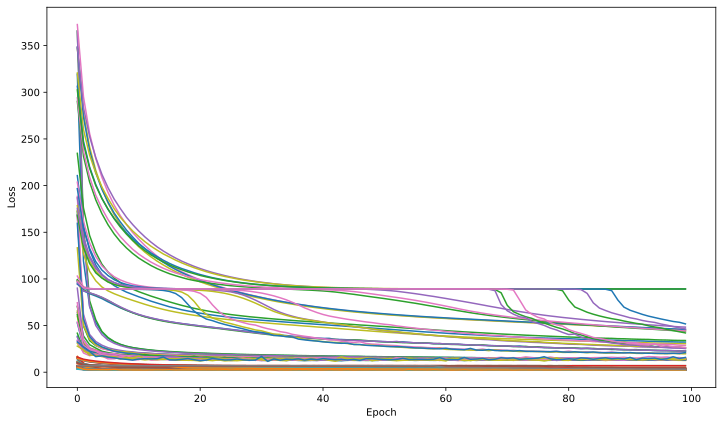

In [455]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=[12, 7])

for key, item in dict_history_model_boston_house_train.items():
    plt.plot(item['val_loss'], label=key)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [456]:
# best model

list_metrics = []
list_name_model = []
for key, item in dict_eval.items():
    list_metrics.append(item[1])
    list_name_model.append(key)

best_name_model = list_name_model[np.argmin(np.array(list_metrics))]
best_metrics = np.min(np.array(list_metrics))
print('BEST_MODEL:' + str(best_name_model) + ": " + str(best_metrics))

BEST_MODEL:MODEL_BOSTON_HOUSE_5_512_nadam_relu_mae: 3.016777276992798


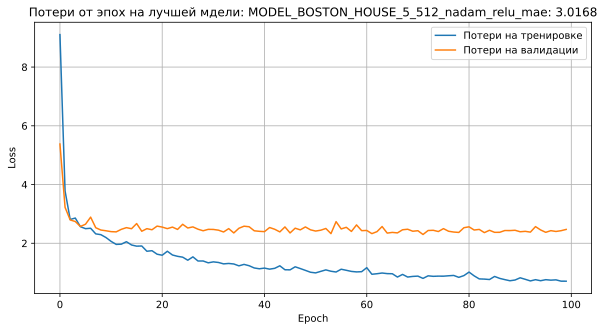

In [457]:
plt.figure(figsize=[10, 5])
plt.plot(dict_history_model_boston_house_train[best_name_model]['loss'], label='Потери на тренировке')
plt.plot(dict_history_model_boston_house_train[best_name_model]['val_loss'], label='Потери на валидации')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох на лучшей мдели: ' + str(best_name_model) + ": " + str(round(best_metrics, 4)))
plt.show()

In [458]:
inputs_ = Input(shape=(13,))
x = inputs_

for i in range(int(best_name_model.split('_')[3])):
    x = Dense(int(best_name_model.split('_')[4]), activation=best_name_model.split('_')[6],
              name='layer' + str(i))(x)

outputs_ = Dense(1, activation=None, name='predictions')(x) 

model_boston_house = Model(inputs=inputs_, outputs=outputs_) 

model_boston_house.load_weights(best_name_model + '.h5')

model_boston_house.compile(optimizer=best_name_model.split('_')[5], 
                           loss=best_name_model.split('_')[7], metrics=['mae'])

history_model_boston_house = model_boston_house.fit(X_train, y_train, batch_size=batch_size_, 
                                                    validation_split=validation_split_, epochs=epochs_)


loss_mae = model_boston_house.evaluate(X_test, y_test)

Epoch 1/100
46/46 [==============================] - 2s 23ms/step - loss: 3.6718 - mae: 3.6718 - val_loss: 7.2381 - val_mae: 7.2381
Epoch 2/100
46/46 [==============================] - 1s 20ms/step - loss: 3.2603 - mae: 3.2603 - val_loss: 3.6444 - val_mae: 3.6444
Epoch 3/100
46/46 [==============================] - 1s 19ms/step - loss: 2.9223 - mae: 2.9223 - val_loss: 4.0873 - val_mae: 4.0873
Epoch 4/100
46/46 [==============================] - 1s 20ms/step - loss: 2.7234 - mae: 2.7234 - val_loss: 3.7798 - val_mae: 3.7798
Epoch 5/100
46/46 [==============================] - 1s 19ms/step - loss: 2.9393 - mae: 2.9393 - val_loss: 4.6942 - val_mae: 4.6942
Epoch 6/100
46/46 [==============================] - 1s 20ms/step - loss: 2.9084 - mae: 2.9084 - val_loss: 2.9971 - val_mae: 2.9971
Epoch 7/100
46/46 [==============================] - 1s 20ms/step - loss: 2.8827 - mae: 2.8827 - val_loss: 3.2343 - val_mae: 3.2343
Epoch 8/100
46/46 [==============================] - 1s 20ms/step - loss: 2.

46/46 [==============================] - 1s 18ms/step - loss: 1.2150 - mae: 1.2150 - val_loss: 2.7070 - val_mae: 2.7070
Epoch 63/100
46/46 [==============================] - 1s 17ms/step - loss: 1.2050 - mae: 1.2050 - val_loss: 2.5250 - val_mae: 2.5250
Epoch 64/100
46/46 [==============================] - 1s 19ms/step - loss: 1.3143 - mae: 1.3143 - val_loss: 3.2542 - val_mae: 3.2542
Epoch 65/100
46/46 [==============================] - 1s 19ms/step - loss: 1.2557 - mae: 1.2557 - val_loss: 2.4669 - val_mae: 2.4669
Epoch 66/100
46/46 [==============================] - 1s 18ms/step - loss: 1.1598 - mae: 1.1598 - val_loss: 2.8532 - val_mae: 2.8532
Epoch 67/100
46/46 [==============================] - 1s 18ms/step - loss: 1.3226 - mae: 1.3226 - val_loss: 2.4816 - val_mae: 2.4816
Epoch 68/100
46/46 [==============================] - 1s 19ms/step - loss: 1.2244 - mae: 1.2244 - val_loss: 2.8413 - val_mae: 2.8413
Epoch 69/100
46/46 [==============================] - 1s 18ms/step - loss: 1.2442 

In [459]:
import pandas as pd

models = pd.DataFrame.from_dict(dict_eval, orient='index', columns=['loss', 'metrics'])

models

,loss,metrics
MODEL_BOSTON_HOUSE_2_128_adam_relu_mse,20.729889,3.769304
MODEL_BOSTON_HOUSE_2_128_adam_relu_mae,3.754302,3.754302
MODEL_BOSTON_HOUSE_2_128_rmsprop_relu_mse,23.560982,4.070885
MODEL_BOSTON_HOUSE_2_128_rmsprop_relu_mae,3.854431,3.854431
MODEL_BOSTON_HOUSE_2_128_nadam_relu_mse,21.523045,3.853274
...,...,...
MODEL_BOSTON_HOUSE_5_512_adam_sigmoid_mae,5.011573,5.011573
MODEL_BOSTON_HOUSE_5_512_rmsprop_sigmoid_mse,31.046057,3.734796
MODEL_BOSTON_HOUSE_5_512_rmsprop_sigmoid_mae,5.367845,5.367845
MODEL_BOSTON_HOUSE_5_512_nadam_sigmoid_mse,32.969383,3.730303


In [460]:
model_boston_house.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [486]:
y_pred = model_boston_house.predict(X_test)
y_test
y_pred = y_pred.reshape(1, 51)[0]

In [487]:
pred_test = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
pred_test['Error'] = np.abs(y_pred - y_test)
pred_test

,y_pred,y_test,Error
0,58.829849,50.0,8.829849
1,17.737297,19.5,1.762703
2,27.370014,20.7,6.670014
3,17.803146,19.3,1.496854
4,24.393314,24.1,0.293314
5,36.638802,34.9,1.738802
6,22.917850,23.1,0.182150
7,15.063522,17.4,2.336478
8,11.920290,13.2,1.279710
9,34.121502,33.4,0.721502


In [488]:
from sklearn.metrics import mean_absolute_error, r2_score

print('mae', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

mae 1.820841848149019
R2 0.8665278057559501


####  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

 - Разработка для нескольких графических процессоров позволит масштабировать модель с дополнительными ресурсами. При разработке в системе с одним графическим процессором мы можем моделировать несколько графических процессоров с помощью виртуальных устройств. Это позволяет легко тестировать конфигурации с несколькими графическими процессорами, не требуя дополнительных ресурсов.

In [491]:
 gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),
         tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

- Когда у нас есть несколько логических графических процессоров, доступных для среды выполнения, мы можем использовать несколько графических процессоров с tf.distribute.Strategy или с ручным размещением. Лучшая практика для использования нескольких графических процессоров - использовать tf.distribute.Strategy 

In [490]:
tf.debugging.set_log_device_placement(True)

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
  inputs = tf.keras.layers.Input(shape=(1,))
  predictions = tf.keras.layers.Dense(1)(inputs)
  model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.2))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


 - Ручное размещение
tf.distribute.Strategy работает под капотом, реплицируя вычисления между устройствами. Вы можете вручную реализовать репликацию, построив свою модель на каждом графическом процессоре. Например:

In [492]:
tf.debugging.set_log_device_placement(True)

gpus = tf.config.experimental.list_logical_devices('GPU')
if gpus:
  # Replicate your computation on multiple GPUs
  c = []
  for gpu in gpus:
    with tf.device(gpu.name):
      a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
      b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
      c.append(tf.matmul(a, b))

  with tf.device('/CPU:0'):
    matmul_sum = tf.add_n(c)

  print(matmul_sum)